# 4 Data Preprocessing<a id='4_Data_Preprocessing'></a>

## 4.1 Contents<a id='4.1_Contents'></a>
* [4 Data Preprocessing](#4_Data_Preprocessing)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Introduction](#4.2_Introduction)
  * [4.3 Imports](#4.3_Imports)
  * [4.4 Load The Data](#4.4_Load_The_Data)
  * [4.5 Explore The Data](#4.5_Explore_The_Data)
    * [4.5.1 Store Sales Trend for Dept 92](#4.5.1_Store_Sales_Trend_for_Dept_92)
    * [4.5.2 Typical Sales Trend](#4.5.2_Typical_Sales_Trend)
    * [4.5.3 Decomposition for Single Time Series](#4.5.3_Decomposition_for_Single_Time_Series)
    * [4.5.4 Stationarity of Time Series](#4.5.4_Stationarity_of_Time_Series)
    * [4.5.5 Transformation of Time Series](#4.5.5_Transformation_of_Time_Series)
    * [4.5.6 ARIMA Model](#4.5.6_ARIMA_Model)
      * [4.5.6.1 Simple ARIMA Model](#4.5.6.1_Simple_ARIMA_Model)
      * [4.5.6.2 ARIMA Model with selected parameters](#4.5.6.2_ARIMA_Model_with_selected_parameters)
      * [4.5.6.3 Auto ARIMA Model](#4.5.6.3_Auto_ARIMA_Model)
  * [4.6 Regression Model](#4.6_Regression_Model)
    * [4.6.1 Regression model based on previous weekly_sales](#4.6.1_Regression_model_based_on_previous_weekly_sales)
    * [4.6.2 Regression with multiple lagged values](#4.6.2_Regression_with_multiple_lagged_values)
      * [4.6.2.1 Regression with continuous lag values](#4.6.2.1_Regression_with_continuous_lag_values)
      * [4.6.2.2 GridSearch to find optimal continuous lag values](#4.6.2.2_GridSearch_to_find_optimal_continuous_lag_values)
      * [4.6.2.3 GridSearch to find optimal combination lag values](#4.6.2.3_GridSearch_to_find_optimal_combination_lag_values)
      * [4.6.2.4 Predictions with updated lagged values](#4.6.2.4_Regression_with_updated_lagged_values)
    * [4.6.3 Regression Model with  Exogenous Variables](#4.6.3_Regression_Model_with_Exogenous_Variables) 
      * [4.6.3.1 Dummy Features](#4.6.3.1_Dummy_Features)
      * [4.6.3.2 Regression Model with current  Exogenous Values](#4.6.3.2_Regression_Model_with_current_Exogenous_Values)
        * [ 4.6.3.2.1 Regression with All Numeric Features](#4.6.3.2.1_Regression_with_All_Numeric_Features)
        * [4.6.3.2.2 k_fold Cross Validation](#4.6.3.2.2_k_fold_Cross_Validation)
        * [4.6.3.2.3 One-step Cross Validation](#4.6.3.2.3_One-step_Cross_Validation)
        * [4.6.3.2.4 Hyperparameter search using GridSearchCV](#4.6.3.2.4_Hyperparameter_search_using_GridSearchCV)
      * [4.6.3.3 Regression Model with lagged  Exogenous Values](#4.6.3.3_Regression_Model_with_lagged_Exogenous_Values)
    * [4.6.4 Random Forest Model with Exogenous Features](#4.6.4_Random_Forest_Model_with_Exogenous_Features)
      * [4.6.4.1 Simple Random Forest](#4.6.4.1_Simple_Random_Forest)
      * [4.6.4.2 Random Forest Regression with one-step validation](#4.6.4.2_Random_Forest_Regression_with_one-step_validation)
      * [4.6.4.3 Random Forest Regression with Lagged Exogenour Value](#4.6.4.3_Random_Forest_Regression_with_Lagged_Exogenour_Values)
      * [4.6.4.4 Random Forest Regression with exogenous lag with one-step validation](#4.6.4.4_Random_Forest_Regression_with_exogenous_lag_with_one-step_validation)     
  * [4.7 Prophet Model](4.7_Prophet_Model)
    * [4.7.1 Simple Prophet Model](#4.7.1_Simple_Prophet_Model)
    * [4.7.2 Adding Holidays](#4.7.2_Adding_Holidays) 
    * [4.7.3 Grid_Search](#4.7.3_Grid_Search)
    * [4.7.4 Prophet Model with Exgeneous Features](#4.7.4_Prophet_Model_with_Exgeneous_Features)
    * [4.7.5 Prophet Model with Lagged Value and Exgeneous Features](#4.7.5_Prophet_Model_with_Lagged_Value_and_Exgeneous_Features)
   
  * [4.8 XG_Boost](#4.8_XG_Boost)
    * [4.8.1 Simple XG_Boost](#4.8.1_Simple_XG_Boost)
    * [4.8.2 XG_Boost Grid Search](#4.8.2_XG_Boost_Grid_Search)
    * [4.8.2 XG_Boost with Selected Features](#4.8.2_XG_Boost_with_Selected_Features)


## 4.2 Introduction<a id='4.2_Introduction'></a>

The purpose of this data science project is to predict sales next three months for different Walmart stores and departments based on two past year sales history. This project aims to build predictive models for multiple time series for each store/dept. Such models will be used to provide guidance for the management team at Walmart to properly manage the inventory and allocate their resources, react to a market change, this may help prevent unnecessary money loss. The model can also be used to set sales target for sales department
For this section, it can be devided into several steps:

first, build *one* TSF model using the manual approach presented by Hyndman-Athanasopoulos in their book [1], by following relevant information presented in chapters 1-9; 

second, to transform the time series problem into a time-implicit regression problem so regression algorithms can be used.

third: use ARIMA to build TSF model without Exogenous Variables. 

Fourth, use the Exogenous Variables and the target to derive
a time-implicit regression model by introducing new features (a.k.a. feature engineering), which will be the target, and the Exogenous Variables, lagged with respect to a lagging window. Now you can use any regression algorithm (e.g., Random
Forest, XGBOOST, LGBM) using a train/test split that preserves the time ordering, and the test set plays the role of the forecasting horizon. You should also use hyper-parameter tuning and cross-validation.

Fifth, evaluate the performance of the model by using the following:
1)Absolute Percent Error
2)Mean Absolute Percent Error
3)Show a predicted-vs-actual scatterplot with the x = y line as a reference
4)Show a distribution of the residuals, where Residual = actual - predicted.
5)back testing,apply it to the TSF models built, and show MAPE for each back test, and compare it against the MAPE for the test set.



## 4.3 Imports<a id='4.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os

import math

from datetime import datetime, timedelta

import itertools
from itertools import chain, combinations

import random


from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from statsmodels.tsa.arima.model import ARIMA

import pmdarima as pm

from pmdarima.arima import auto_arima

import holidays
from prophet import Prophet
#from prophet.plot import add_changepoints_to_plot


from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

import statsmodels.api as sm

import scipy.stats as stats


from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

from matplotlib import pyplot

import xgboost as xgb

#from sktime.forecasting.model_selection import TimeSeriesGridSearchCV

## 4.4 Load The Data <a id='4.4_Load_The_Data'></a>

In [2]:
#load data
folder_path=os.path.join(os.getcwd(), 'Data')


df_ts = pd.read_pickle(folder_path+'\\'+'df_ts_clean.pkl')  
df_ts.head()

Date  Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0 2010-02-05      1        42.31       2.572        0.0        0.0        0.0   
1 2010-02-12      1        38.51       2.548        0.0        0.0        0.0   
2 2010-02-19      1        39.93       2.514        0.0        0.0        0.0   
3 2010-02-26      1        46.63       2.561        0.0        0.0        0.0   
4 2010-03-05      1        46.50       2.625        0.0        0.0        0.0   

   MarkDown4  MarkDown5         CPI  ...  Weekly_Sales Type    Size  Year  \
0        0.0        0.0  211.096358  ...      24924.50    A  151315  2010   
1        0.0        0.0  211.242170  ...      46039.49    A  151315  2010   
2        0.0        0.0  211.289143  ...      41595.55    A  151315  2010   
3        0.0        0.0  211.319643  ...      19403.54    A  151315  2010   
4        0.0        0.0  211.350143  ...      21827.90    A  151315  2010   

  Month  Week  Weekday  Season           Holiday_name  MarkDown_Tot  
0     2     5        4       1            non-Holiday           0.0  
1     2     6        4       1              Superbowl           0.0  
2     2     7        4       1  Washington’s Birthday           0.0  
3     2     8        4       1            non-Holiday           0.0  
4     3     9        4       1            non-Holiday           0.0  

[5 rows x 23 columns]

In [3]:
#df_ts.drop(['index'], axis=1,inplace=True)
df_ts.set_index("Date",inplace=True)
df_ts.head()

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-02-05      1        42.31       2.572        0.0        0.0        0.0   
2010-02-12      1        38.51       2.548        0.0        0.0        0.0   
2010-02-19      1        39.93       2.514        0.0        0.0        0.0   
2010-02-26      1        46.63       2.561        0.0        0.0        0.0   
2010-03-05      1        46.50       2.625        0.0        0.0        0.0   

            MarkDown4  MarkDown5         CPI  Unemployment  ... Weekly_Sales  \
Date                                                        ...                
2010-02-05        0.0        0.0  211.096358         8.106  ...     24924.50   
2010-02-12        0.0        0.0  211.242170         8.106  ...     46039.49   
2010-02-19        0.0        0.0  211.289143         8.106  ...     41595.55   
2010-02-26        0.0        0.0  211.319643         8.106  ...     19403.54   
2010-03-05        0.0        0.0  211.350143         8.106  ...     21827.90   

            Type    Size  Year  Month  Week  Weekday  Season  \
Date                                                           
2010-02-05     A  151315  2010      2     5        4       1   
2010-02-12     A  151315  2010      2     6        4       1   
2010-02-19     A  151315  2010      2     7        4       1   
2010-02-26     A  151315  2010      2     8        4       1   
2010-03-05     A  151315  2010      3     9        4       1   

                     Holiday_name  MarkDown_Tot  
Date                                             
2010-02-05            non-Holiday           0.0  
2010-02-12              Superbowl           0.0  
2010-02-19  Washington’s Birthday           0.0  
2010-02-26            non-Holiday           0.0  
2010-03-05            non-Holiday           0.0  

[5 rows x 22 columns]

Reload the data frame where all the features are included: features, weekly sales, holidays, store size and type, etc

## 4.5. Explore The Data<a id='4.5_Explore_The_Data'></a>

### 4.5.1 Store Sales Trend for Dept 92<a id='4.5.1_Store_Sales_Trend_for_Dept_92'></a>

Since dept 92 has highest sales rate based on EAD analysis, I will check the sales trend for all the store in dept 92

In [4]:
dept_92_group=df_ts[df_ts['Dept']==92].groupby('Store')

In [5]:
#make 5 groups of stores 
store_list=list(range(1,46))
group_size = 5
store_group_dict={}
#(*[iter(store_list)]*group)
for i in range(len(store_list)):
    group_num = i//group_size+1
    if group_num in store_group_dict:
        store_group_dict[group_num].append(store_list[i])
    else:
        store_group_dict[group_num] = [store_list[i]]

print(store_group_dict)
#store_group_dict = {i//group+1: chunk for i,chunk  in enumerate(zip(*([iter(store_list)]*group)))}

{1: [1, 2, 3, 4, 5], 2: [6, 7, 8, 9, 10], 3: [11, 12, 13, 14, 15], 4: [16, 17, 18, 19, 20], 5: [21, 22, 23, 24, 25], 6: [26, 27, 28, 29, 30], 7: [31, 32, 33, 34, 35], 8: [36, 37, 38, 39, 40], 9: [41, 42, 43, 44, 45]}


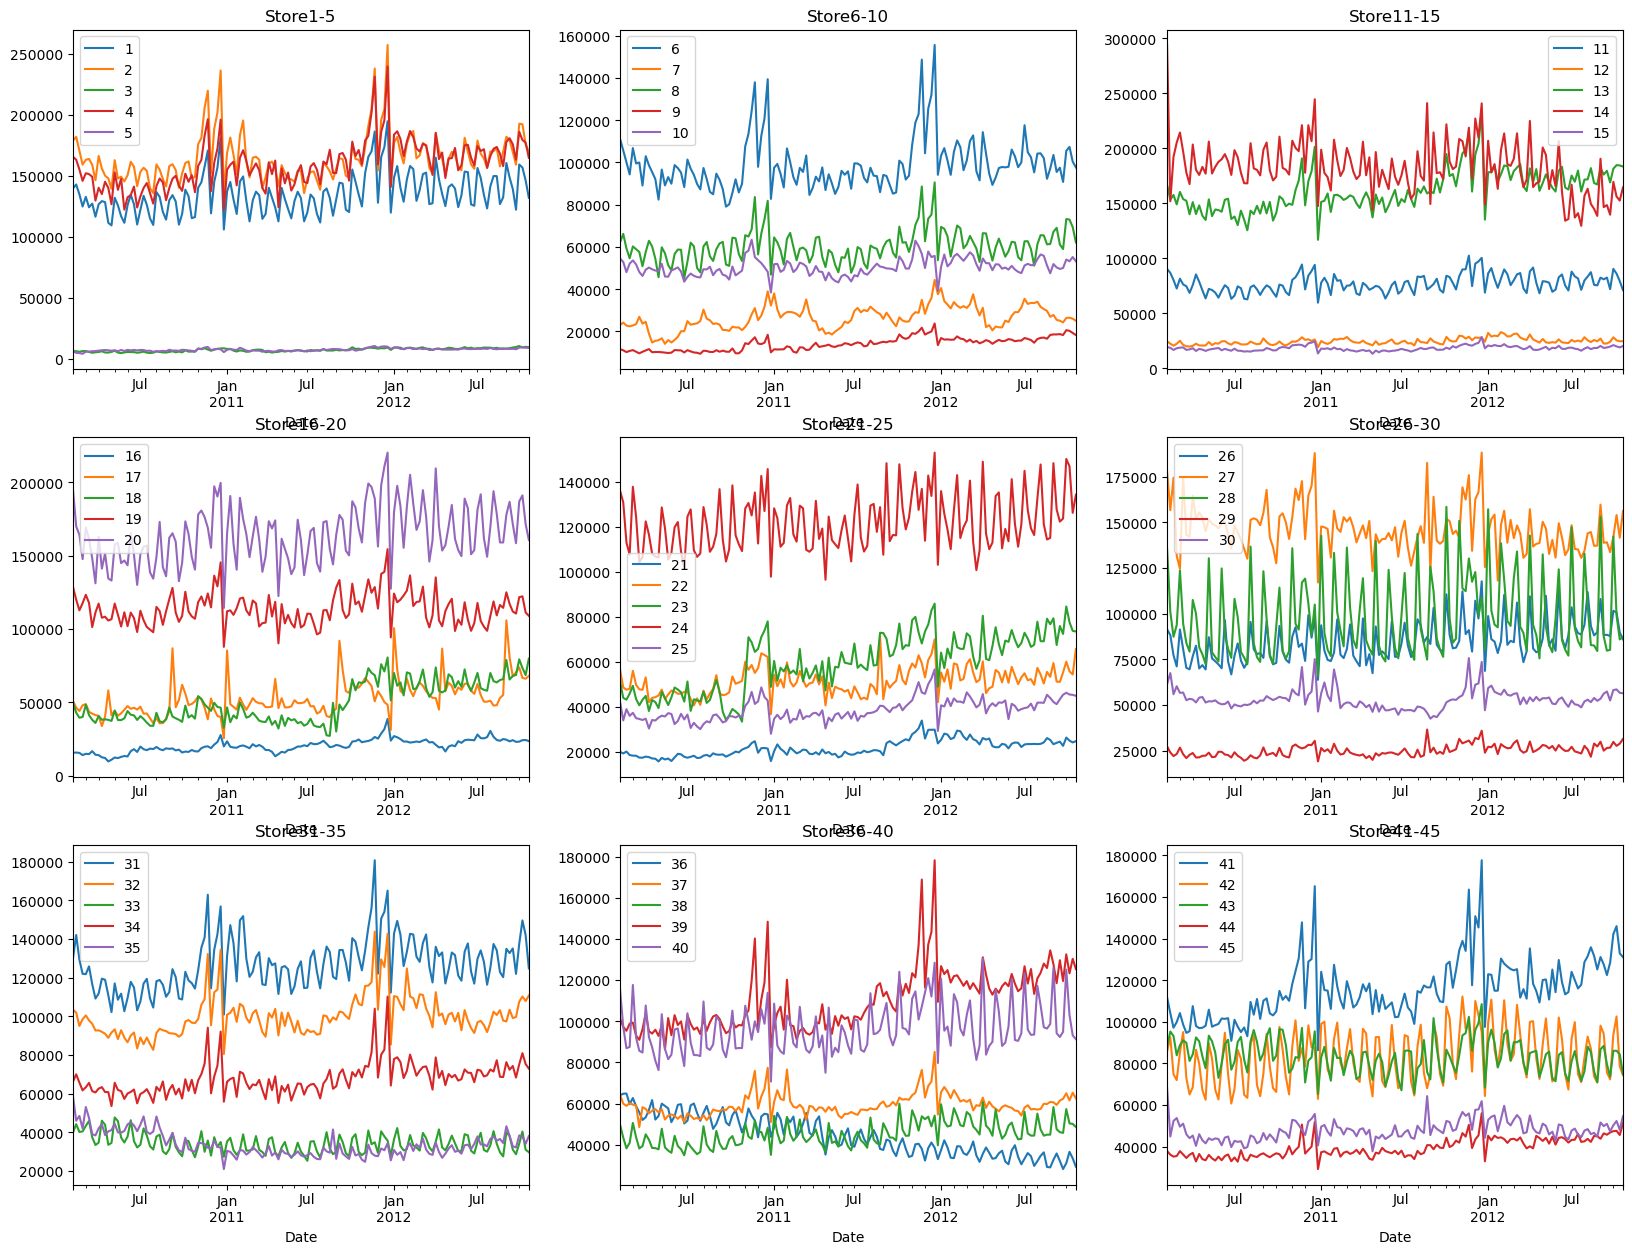

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=3,figsize=(20,15))
#with sns.plotting_context("notebook", font_scale=1.5):
for i in store_group_dict.keys():
    for j in store_group_dict[i]: 
        
        dept_92_group.get_group(j).plot(y='Weekly_Sales',use_index=True, ax=axes.flat[i-1],label = j, title='Store'+str(j-4)+'-'+str(j))
#        else:
#            dept_group.get_group(key).plot(y='Weekly_Sales',use_index=True, ax=axes.flat[index],label=key, title='Dept'+str(index+1))
            
#alternative way of plotting it


as shown, not all the stores follow the same trending or seansonal pattern. since store14/dept92 has highest weekly sales, I use it as a starting point for baseline model

### 4.5.2 Typical Sales Trend <a id='4.5.2Typical_Sales_Trend'></a>

S_14_D_92 is selected due to highest tatol sales 

In [7]:
ts_s14_d92=df_ts[(df_ts.Store==14)&(df_ts.Dept==92)]

In [8]:
ts_s14_d92.head()

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-02-05     14        27.31       2.784        0.0        0.0        0.0   
2010-02-12     14        27.73       2.773        0.0        0.0        0.0   
2010-02-19     14        31.27       2.745        0.0        0.0        0.0   
2010-02-26     14        34.89       2.754        0.0        0.0        0.0   
2010-03-05     14        37.13       2.777        0.0        0.0        0.0   

            MarkDown4  MarkDown5         CPI  Unemployment  ... Weekly_Sales  \
Date                                                        ...                
2010-02-05        0.0        0.0  181.871190         8.992  ...    293966.05   
2010-02-12        0.0        0.0  181.982317         8.992  ...    151901.21   
2010-02-19        0.0        0.0  182.034782         8.992  ...    192282.19   
2010-02-26        0.0        0.0  182.077469         8.992  ...    205250.96   
2010-03-05        0.0        0.0  182.120157         8.992  ...    214383.07   

            Type    Size  Year  Month  Week  Weekday  Season  \
Date                                                           
2010-02-05     A  200898  2010      2     5        4       1   
2010-02-12     A  200898  2010      2     6        4       1   
2010-02-19     A  200898  2010      2     7        4       1   
2010-02-26     A  200898  2010      2     8        4       1   
2010-03-05     A  200898  2010      3     9        4       1   

                     Holiday_name  MarkDown_Tot  
Date                                             
2010-02-05            non-Holiday           0.0  
2010-02-12              Superbowl           0.0  
2010-02-19  Washington’s Birthday           0.0  
2010-02-26            non-Holiday           0.0  
2010-03-05            non-Holiday           0.0  

[5 rows x 22 columns]

<AxesSubplot:title={'center':'Weekly Sales for S_14/D_92'}, xlabel='Date'>

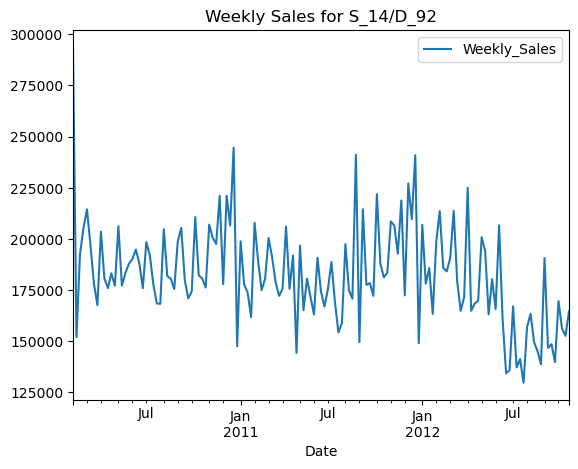

In [9]:
ts_s14_d92.plot(y='Weekly_Sales',use_index=True,title='Weekly Sales for S_14/D_92')

also check other stores which either has no trend/seasonality or strong trend/seasonality

In [10]:
ts_s33_d92=df_ts[(df_ts.Store==33)&(df_ts.Dept==92)]

<AxesSubplot:title={'center':'Weekly Sales for S_33/D_92'}, xlabel='Date'>

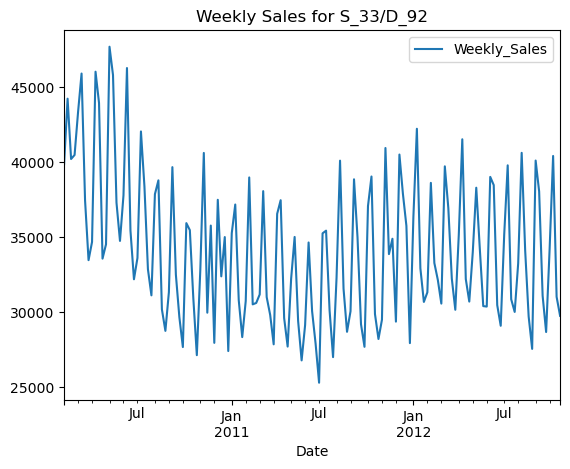

In [11]:
ts_s33_d92.plot(y='Weekly_Sales',use_index=True,title='Weekly Sales for S_33/D_92')

In [12]:
ts_s6_d92=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

<AxesSubplot:title={'center':'Weekly Sales for S_6/D_92'}, xlabel='Date'>

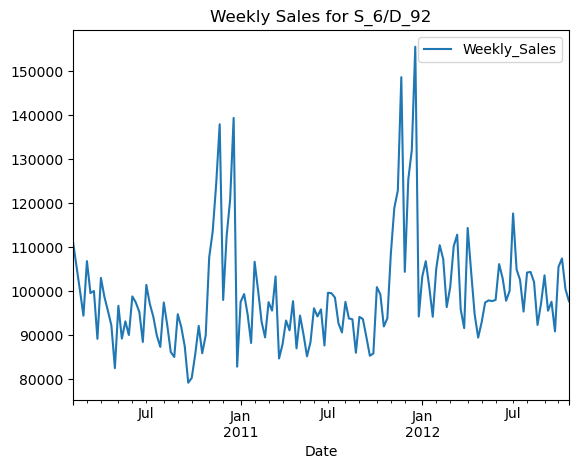

In [13]:
ts_s6_d92.plot(y='Weekly_Sales',use_index=True,title='Weekly Sales for S_6/D_92')

### 4.5.3 Decomposition for Single Time Series <a id='4.5.3_Decomposition_for_Single_Time_Series'></a>

1. Trend: The overall direction that the data is travelling in (like upwards or downwards)
2. Seasonality: Cyclical patterns in the data
3. Noise: The random variation in the data

In [14]:
#define y 
y=ts_s6_d92['Weekly_Sales']

Text(0, 0.5, 'Weekly Sales')

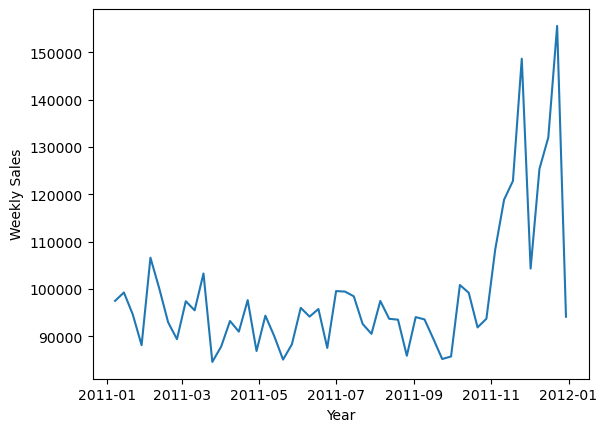

In [15]:
plt.plot(y['2011'])
plt.xlabel('Year')
plt.ylabel('Weekly Sales')

In [16]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y, model='additive')


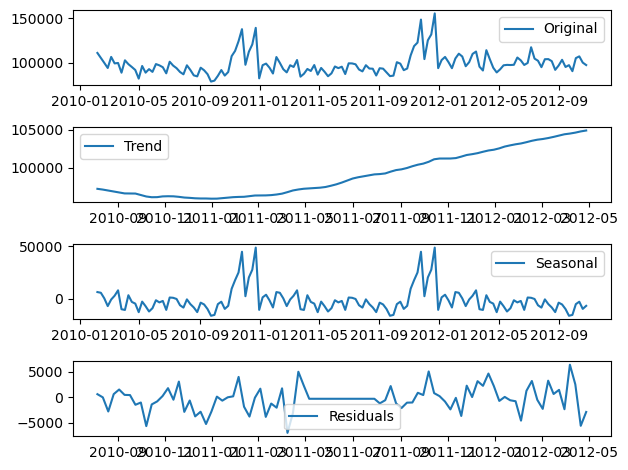

In [17]:
# Plot the original data, the trend, the seasonality, and the residuals 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

plt.show()

ts_s6_d92 has strong seasonality on yearly basis, not as much of trending

In [18]:
y1=ts_s14_d92['Weekly_Sales']

In [19]:
decomposition = sm.tsa.seasonal_decompose(y1, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

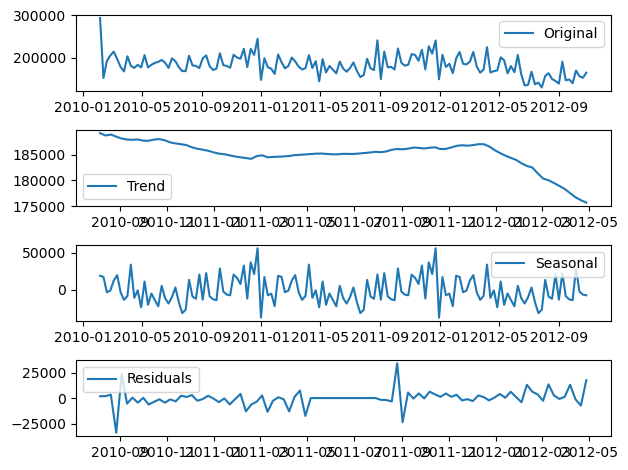

In [20]:
# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y1, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

plt.show()

In [21]:
y2=ts_s33_d92['Weekly_Sales']

In [22]:
decomposition = sm.tsa.seasonal_decompose(y2, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

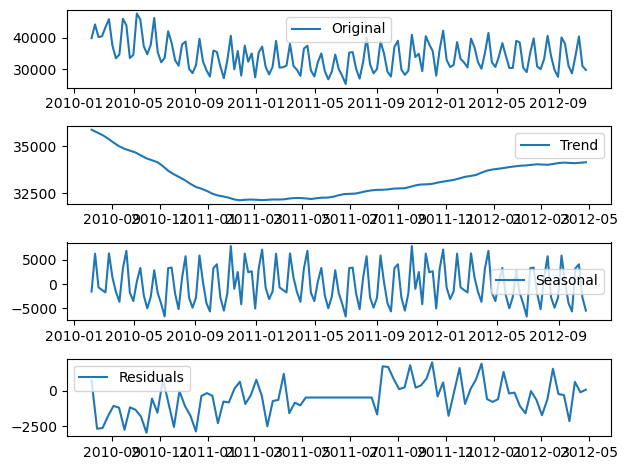

In [23]:
# Plot the original data, the trend, the seasonality, and the residuals 
plt.subplot(411)
plt.plot(y2, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

plt.show()

### 4.5.4 Stationarity of Time Series<a id='4.5.4_Stationarity_of_Time_Series'></a>

KPSS test: The Null hypothesis of this test is that the time series data in question is stationary; hence, if the p-value is less than the significance level (typically 0.05, but we decide) then we reject the Null and infer that the data is not stationary.

In [24]:
from statsmodels.tsa.stattools import kpss
kpss(y)

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.2443040227298327,
 0.1,
 7,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

based on the analysis, the data is surprisingly considered as stationary even though I see strong seasonality

In [25]:
kpss(y1)

(0.7188973036552107,
 0.011827517849526303,
 6,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [26]:
kpss(y2)

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(1.0434972876646609,
 0.01,
 2,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

for dept 92, store 6 is stationary, store 14 and 33 is not stationary

### 4.5.5 Transformation of Time Series<a id='4.5.5_Transformation_of_Time_Series'></a>

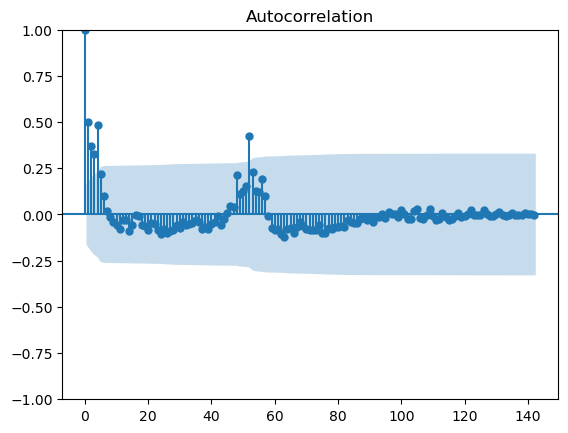

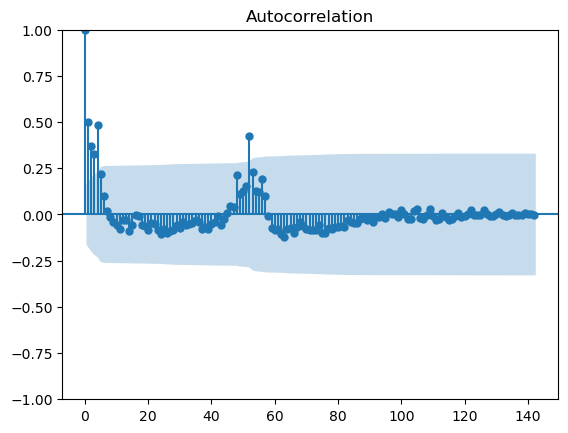

In [27]:
#plot autocorrelation plot
plot_acf(y, lags= 142, alpha=0.05) 

In [28]:
autocorr_data = []
for lag in range(1, 140):
    autocorr = y.autocorr(lag=lag)
    autocorr_data.append((lag, autocorr))

df = pd.DataFrame(autocorr_data, columns=['Lag', 'Autocorrelation'])
df.iloc[40:55]

Lag  Autocorrelation
40   41        -0.039569
41   42        -0.004579
42   43        -0.065813
43   44        -0.024095
44   45         0.021896
45   46         0.077107
46   47         0.071816
47   48         0.351440
48   49         0.212519
49   50         0.247677
50   51         0.314880
51   52         0.837773
52   53         0.465143
53   54         0.269998
54   55         0.256816

In [29]:
print(y)

Date
2010-02-05    111241.81
2010-02-12    105728.28
2010-02-19    100089.54
2010-02-26     94350.12
2010-03-05    106781.92
                ...    
2012-09-28     90778.91
2012-10-05    105457.17
2012-10-12    107386.22
2012-10-19    100390.24
2012-10-26     97646.76
Name: Weekly_Sales, Length: 143, dtype: float64


based on the autocorrelation curve, the data is correlated with lag1, lag 4 and highly correlated with lag 52 

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


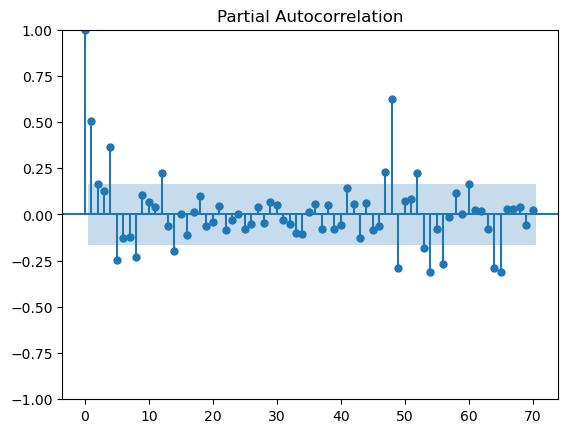

In [30]:
plot_pacf(y,lags= 70)
plt.show()

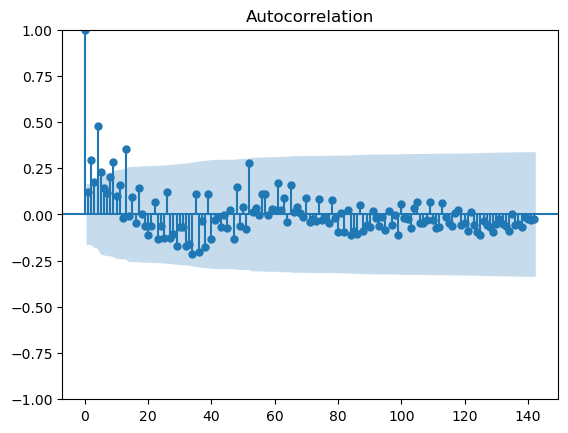

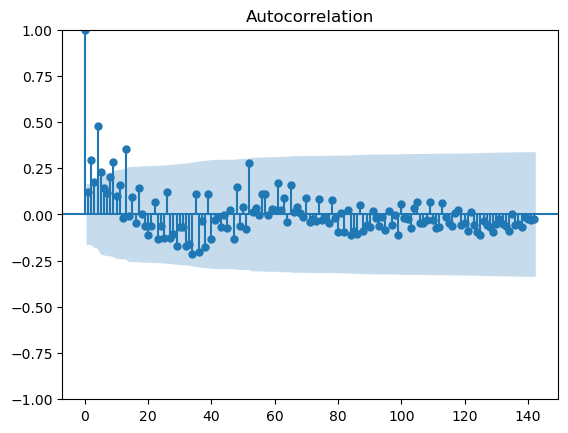

In [31]:
#plot autocorrelation plot
plot_acf(y1, lags= 142, alpha=0.05) 

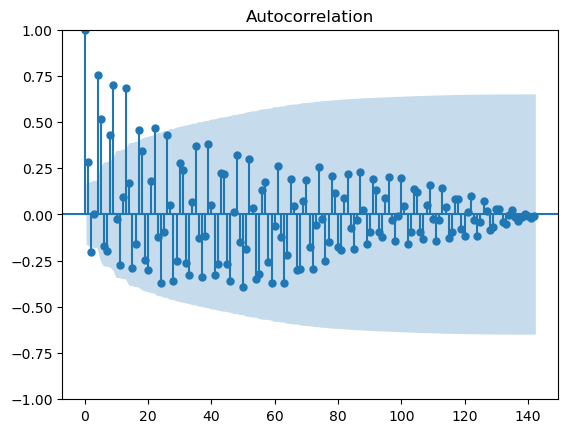

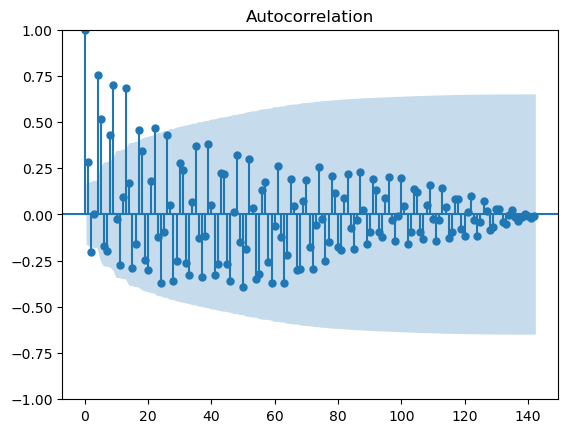

In [32]:
#plot autocorrelation plot
plot_acf(y2, lags= 142, alpha=0.05) 

due to the seasonality of y, I used 1 lag differencing to improve data quality

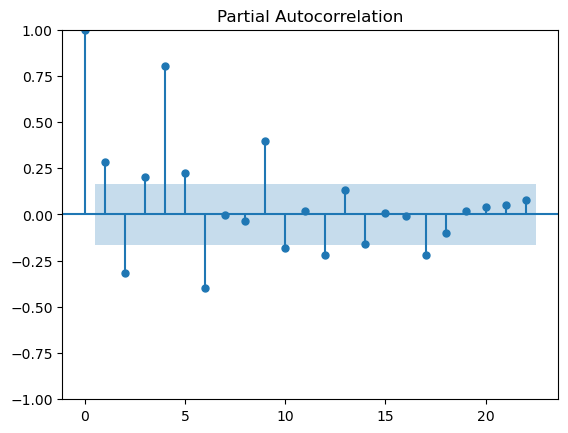

In [33]:
plot_pacf(y2)
plt.show()

In [34]:
y_diff=y.diff()
y_diff = y_diff.dropna()
kpss(y_diff)

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.09679414308663777,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [35]:
y1_diff=y1.diff(3)
y1_diff = y1_diff.dropna()
kpss(y1_diff)

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.03155476150184896,
 0.1,
 2,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

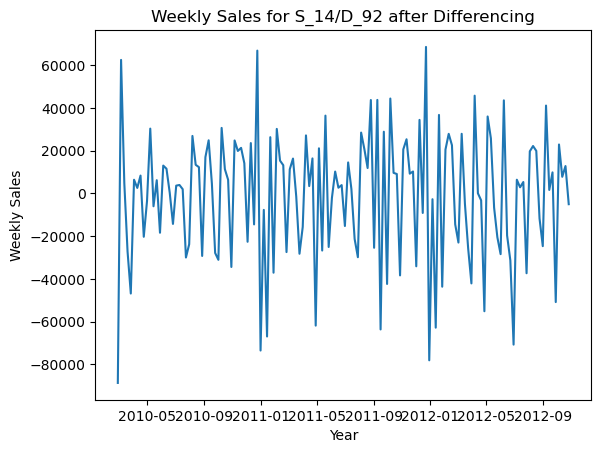

In [36]:
plt.plot(y1_diff)
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for S_14/D_92 after Differencing')
plt.show()

<AxesSubplot:title={'center':'Weekly Sales for S_14/D_92'}, xlabel='Date'>

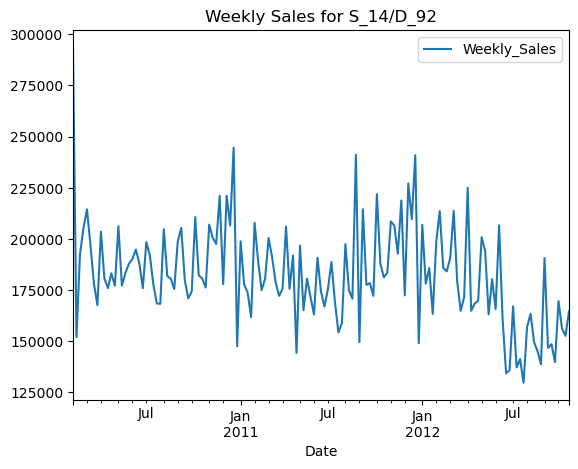

In [37]:
ts_s14_d92.plot(y='Weekly_Sales',use_index=True,title='Weekly Sales for S_14/D_92')

In [38]:
y2_diff=y2.diff(2)
y2_diff = y2_diff.dropna()
kpss(y2_diff)

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.09035458296423252,
 0.1,
 15,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

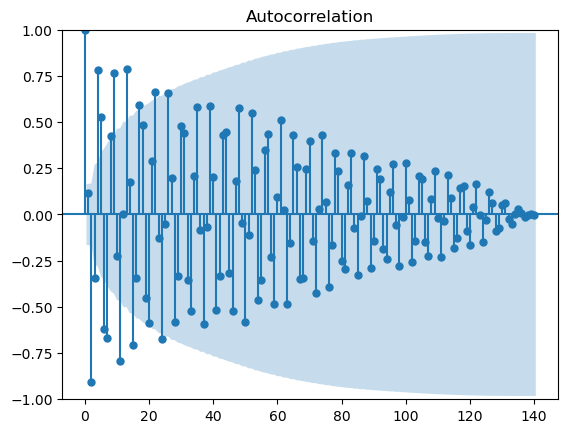

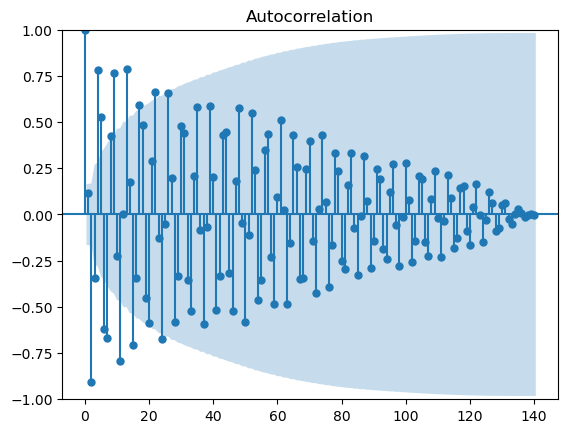

In [39]:
plot_acf(y2_diff, lags= 140, alpha=0.05) 

In [40]:
y2_diff_2=y2_diff.diff(2)
y2_diff_2 = y2_diff_2.dropna()
kpss(y2_diff_2)

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.0721695532850941,
 0.1,
 18,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

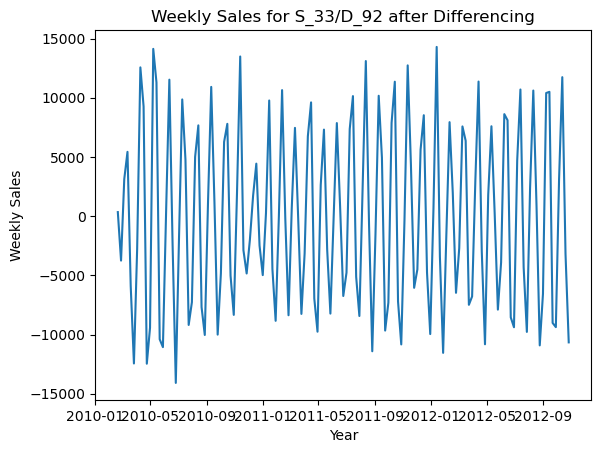

In [41]:
plt.plot(y2_diff)
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales for S_33/D_92 after Differencing')
plt.show()

<AxesSubplot:title={'center':'Weekly Sales for S_33/D_92'}, xlabel='Date'>

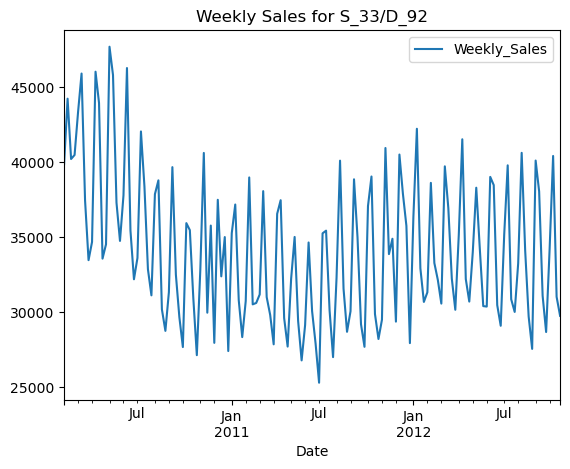

In [42]:
ts_s33_d92.plot(y='Weekly_Sales',use_index=True,title='Weekly Sales for S_33/D_92')

### 4.5.6 ARIMA Model<a id='4.5.6_ARIMA_Model'></a>

s6_d92 was selected for ARIMA modeling


#### 4.5.6.1 Simple ARIMA Model <a id='4.5.6.1_Simple_ARIMA_Model'></a>

In [43]:
def ARIMA_model_fit(data,train_size,arima_order):
    #split training/test data based on length of the time series, data has to maintain the time series order, so train_test_split can not be used
    split=int(len(data) * train_size) 
    train, test = data[0:split], data[split:len(data)]
    
    model=ARIMA(train, order=arima_order)
    #fit model
    model_fit=model.fit()
    return train,test,model_fit
    
    
    

In [44]:
def ARIMA_model_evaluate(train,test,model_fit):
    train_pred=model_fit.predict(start=0, end=len(train)-1)
    #predict test set
    test_pred = model_fit.predict(start=len(train), end=len(train)+len(test)-1)    
    
    #put predicted and original data in dataframe
    tr_results= pd.DataFrame({
        'original_value': train,
        'predicted_value': train_pred})
    
    te_results= pd.DataFrame({
        'original_value': test,
        'predicted_value': test_pred})
    
    #combine training and test dataset
    
    results=pd.concat([tr_results,te_results])
    
    #find metrics for both training and test dataset
    
    r2_list=[r2_score(train, train_pred), r2_score(test, test_pred)]
    MAE_list=[mean_absolute_error(train, train_pred), mean_absolute_error(test, test_pred)]
    MAPE_list=[mean_absolute_percentage_error(train, train_pred), mean_absolute_percentage_error(test, test_pred)]
    return r2_list,MAE_list,MAPE_list,results,te_results

In [45]:
train,test,model_fit=ARIMA_model_fit(y,0.75,(1,1,1))

C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\ygao10\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [46]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1146.684
Date:                Fri, 08 Sep 2023   AIC                           2299.367
Time:                        17:19:55   BIC                           2307.358
Sample:                    02-05-2010   HQIC                          2302.606
                         - 02-17-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2247      0.124      1.817      0.069      -0.018       0.467
ma.L1         -0.6144      0.106     -5.774      0.000      -0.823      -0.406
sigma2      1.283e+08   5.67e-10   2.26e+17      0.000    1.28e+08    1.28e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.65   Jarque-Bera (JB):               111.29
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               3.12   Skew:                            -1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.22e+32. Standard errors may be unstable.
"""

In [47]:
#start with arima order (1,1,1)
r2_list,MAE_list,MAPE_list,results,te_results=ARIMA_model_evaluate(train,test,model_fit)

In [48]:
r2_list,MAE_list,MAPE_list

([-0.4209777441622615, -0.8743538335175205],
 [9138.301163942035, 7723.446257099684],
 [0.08929222095054075, 0.07920569168078259])

In [49]:
def origin_predition_comparison(results,model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(results.index, results['original_value'], label='Original Value', color='blue', linewidth=2)
    plt.plot(results.index, results['predicted_value'], label='Predicted Value', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Weekly_Sales')
    plt.title(f'Original vs. Predicted Values-{model_name}')
    plt.legend()
    plt.show()

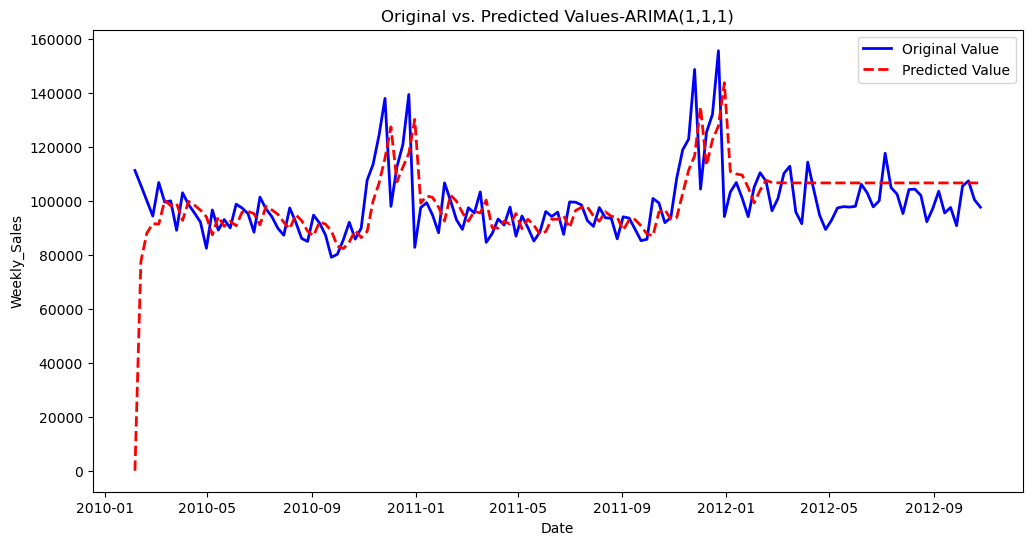

In [50]:
origin_predition_comparison(results,'ARIMA(1,1,1)')

In [51]:
def pred_vs_orig(te_results,model_name):
    sns.scatterplot(data=te_results,x='original_value',y='predicted_value')
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes,color='r',linestyle='--')
    plt.title(f'Original vs. predicted values for test dataset-{model_name}')



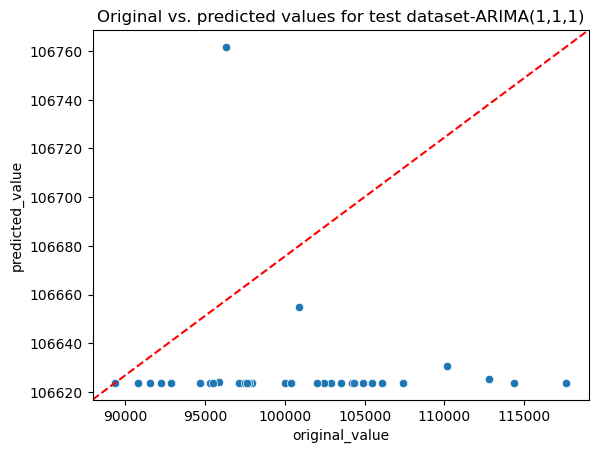

In [52]:
pred_vs_orig(te_results,'ARIMA(1,1,1)')

first ARIMA model with parameter set at (1,1,1) does not fit well for test dataset, R2 is low at 0.12 for training dataset, 0.018 for test dataset, MAPE is 153%, 96% respectively

#### 4.5.6.2 ARIMA Model with selected parameters <a id='4.5.6.2_ARIMA_Model_with_selected_parameters'></a>

In [53]:
#self define p,q,d values and find optimal values with lowest AICC number
def evaluate_model_params(data,train_size, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    # Iterate through p_values
    for p in p_values:
        # Iterate through d_values
        for d in d_values:
            # Iterate through q_values
            for q in q_values:
                # p, d, q iterator variables in that order
                order = (p, d, q)
                try:
                    # Make a variable called mse for the Mean squared error
                    #print(p,d,q)
                    train,test,model_fit=ARIMA_model_fit(data,train_size,order)
                    AIC=model_fit.aic
                    
                    if AIC < best_score:
                        best_score, best_cfg = AIC, order
                    print('ARIMA%s AIC=%.3f' % (order,AIC))
                except:
                    continue
    return print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))

In [54]:
# Now, we choose a couple of values to try for each parameter.
p_values = [x for x in range(0, 6)]
d_values = [x for x in range(0, 2)]
q_values = [x for x in range(0, 6)]

In [55]:
# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
evaluate_model_params(y,0.75, p_values, d_values, q_values)

ARIMA(0, 0, 0) AIC=2737.014
ARIMA(0, 0, 1) AIC=2324.527
ARIMA(0, 0, 2) AIC=2315.862
ARIMA(0, 0, 3) AIC=2316.754
ARIMA(0, 0, 4) AIC=2288.577
ARIMA(0, 0, 5) AIC=2278.967
ARIMA(0, 1, 0) AIC=2314.073
ARIMA(0, 1, 1) AIC=2298.746
ARIMA(0, 1, 2) AIC=2298.695
ARIMA(0, 1, 3) AIC=2300.494
ARIMA(0, 1, 4) AIC=2291.096
ARIMA(0, 1, 5) AIC=2291.401
ARIMA(1, 0, 0) AIC=2310.839
ARIMA(1, 0, 1) AIC=2305.731
ARIMA(1, 0, 2) AIC=2308.175
ARIMA(1, 0, 3) AIC=2307.551
ARIMA(1, 0, 4) AIC=2276.609
ARIMA(1, 0, 5) AIC=2278.645
ARIMA(1, 1, 0) AIC=2303.701
ARIMA(1, 1, 1) AIC=2299.367
ARIMA(1, 1, 2) AIC=2300.515
ARIMA(1, 1, 3) AIC=2295.254
ARIMA(1, 1, 4) AIC=2291.719
ARIMA(1, 1, 5) AIC=2287.576
ARIMA(2, 0, 0) AIC=2308.173
ARIMA(2, 0, 1) AIC=2307.729
ARIMA(2, 0, 2) AIC=2308.424
ARIMA(2, 0, 3) AIC=2306.482
ARIMA(2, 0, 4) AIC=2278.516
ARIMA(2, 0, 5) AIC=2280.566
ARIMA(2, 1, 0) AIC=2302.006
ARIMA(2, 1, 1) AIC=2301.889
ARIMA(2, 1, 2) AIC=2299.195
ARIMA(2, 1, 3) AIC=2291.826
ARIMA(2, 1, 4) AIC=2292.177
ARIMA(2, 1, 5) AIC=2

In [56]:
train,test,model_fit=ARIMA_model_fit(y,0.75,(1,0,4))

In [57]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                 ARIMA(1, 0, 4)   Log Likelihood               -1131.304
Date:                Fri, 08 Sep 2023   AIC                           2276.609
Time:                        17:20:02   BIC                           2295.319
Sample:                    02-05-2010   HQIC                          2284.194
                         - 02-17-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.852e+04   4835.090     20.376      0.000     8.9e+04    1.08e+05
ar.L1          0.4841      0.088      5.480      0.000       0.311       0.657
ma.L1         -0.1011      0.106     -0.952      0.341      -0.309       0.107
ma.L2          0.1273      0.115      1.106      0.269      -0.098       0.353
ma.L3          0.0400      0.095      0.420      0.675      -0.147       0.227
ma.L4          0.7094      0.085      8.359      0.000       0.543       0.876
sigma2      1.015e+08      0.085   1.19e+09      0.000    1.01e+08    1.01e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.34
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               3.16   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.31e+26. Standard errors may be unstable.
"""

In [58]:
r2_list,MAE_list,MAPE_list,results,te_results=ARIMA_model_evaluate(train,test,model_fit)

In [59]:
r2_list,MAE_list,MAPE_list

([0.5245609014700506, -0.10259441726701923],
 [6672.840975234943, 5336.80604497114],
 [0.06585928531151636, 0.05268003838172659])

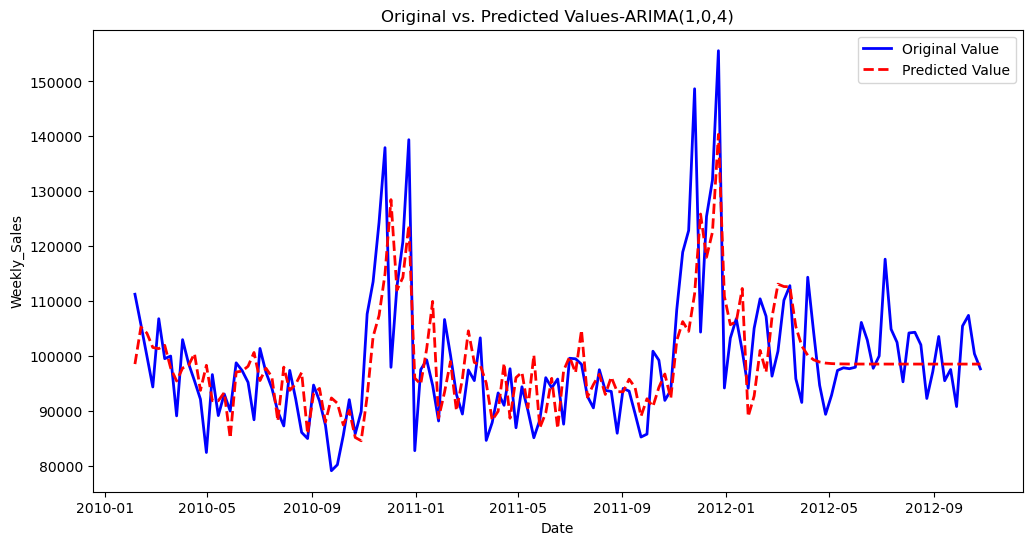

In [60]:
origin_predition_comparison(results,'ARIMA(1,0,4)')

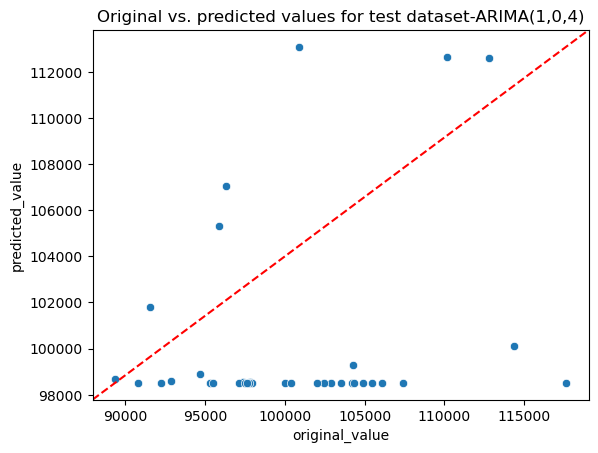

In [61]:
pred_vs_orig(te_results,'ARIMA(1,0,4)')

In [62]:
#Calculate residue for test dataset
residuals=te_results['predicted_value']-te_results['original_value']

no lag value found significant

In [63]:
# Residuals plot
def residual_plot(residuals,model_name):
    #autocorrelation plot of residuals for test dataset
    plot_acf(residuals,lags=25)
    plt.title(f'ACF plot of residuals for {model_name}')

    plt.figure(figsize=(8, 4))
    plt.plot(residuals, marker='o')
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Residuals')
    plt.title('Residuals Plot')
    plt.show()

# Histogram of residuals
    plt.figure(figsize=(8, 4))
    plt.hist(residuals, bins=10)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title('Histogram of Residuals')
    plt.show()

# QQ plot of residuals
    from statsmodels.graphics.gofplots import qqplot
    plt.figure(figsize=(8, 4))
    qqplot(residuals, line='s')
    plt.title('QQ Plot of Residuals')
    plt.show()

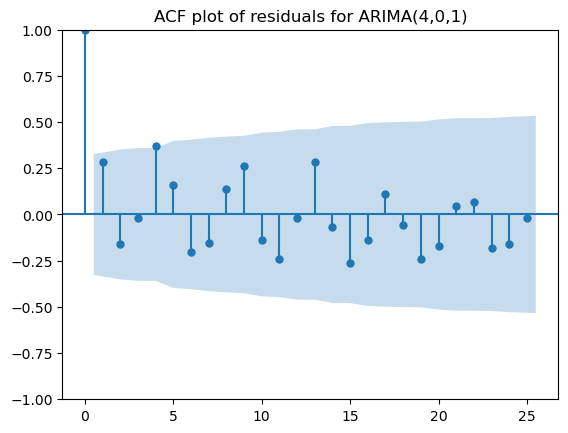

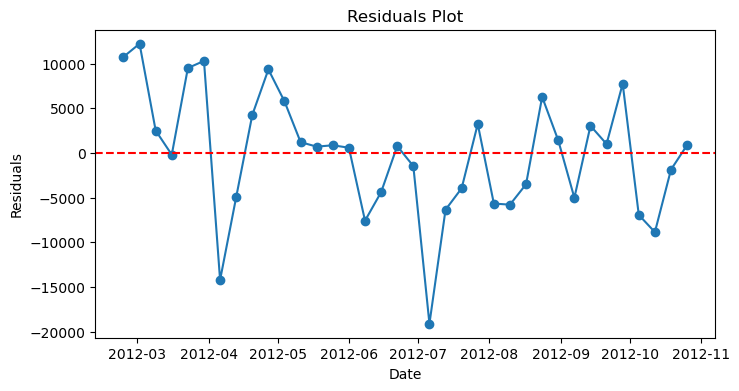

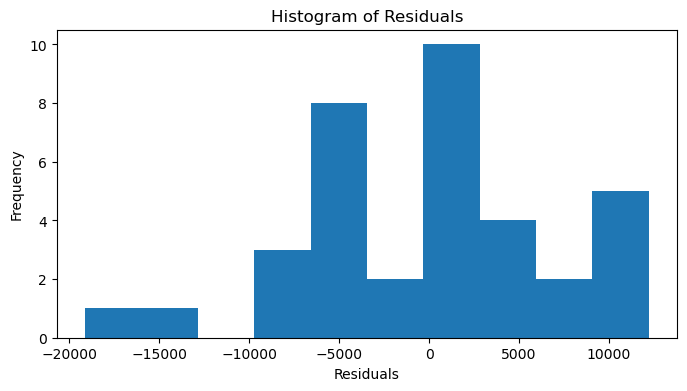

<Figure size 800x400 with 0 Axes>

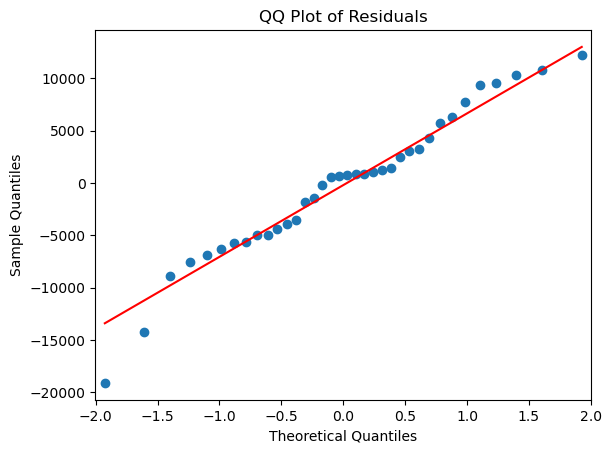

In [64]:
residual_plot(residuals,'ARIMA(4,0,1)')

#### 4.5.6.3 Auto ARIMA Model <a id='4.5.6.3_Auto_ARIMA_Model'></a>

Pre-modeling analysis can be performed as in the following reference:
http://alkaline-ml.com/pmdarima/usecases/stocks.html

In [65]:
#https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
def AUTO_ARIMA_model_fit(data,train_size):
    #split training/test data based on length of the time series, data has to maintain the time series order, so train_test_split can not be used
    split=int(len(data) * train_size) 
    train, test = data[0:split], data[split:len(data)]
#https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html   
    model=pm.auto_arima(train, start_p=0, start_q=0, #default value is 2
                      test='kpss',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q,defaul value is 5 (based on the autocorrelation curve of the data)
                      m=52,              #  number of observations per seasonal cycle
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality is considiered
                      start_P=0, 
                      D=0, 
                      max_order=None,
                      information_criterion='aic',
                      trace=True,
                      stepwise=True,
                      )
    #fit model
    model_fit=model.fit(train)
    return train,test,model_fit

In [66]:
data=ts_s6_d92['Weekly_Sales']

In [67]:
data

Date
2010-02-05    111241.81
2010-02-12    105728.28
2010-02-19    100089.54
2010-02-26     94350.12
2010-03-05    106781.92
                ...    
2012-09-28     90778.91
2012-10-05    105457.17
2012-10-12    107386.22
2012-10-19    100390.24
2012-10-26     97646.76
Name: Weekly_Sales, Length: 143, dtype: float64

In [68]:
train,test,model_fit=AUTO_ARIMA_model_fit(data,0.75)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[52] intercept   : AIC=2318.868, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2343.022, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2292.860, Time=1.12 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2308.657, Time=0.52 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2768.220, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=2310.831, Time=0.02 sec
 ARIMA(1,0,0)(2,0,0)[52] intercept   : AIC=2290.403, Time=4.24 sec
 ARIMA(1,0,0)(2,0,1)[52] intercept   : AIC=inf, Time=16.64 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=2285.415, Time=1.17 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=2285.285, Time=0.52 sec
 ARIMA(1,0,0)(0,0,2)[52] intercept   : AIC=2282.383, Time=2.95 sec
 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=2284.232, Time=5.47 sec
 ARIMA(0,0,0)(0,0,2)[52] intercept   : AIC=2316.196, Time=2.55 sec
 ARIMA(2,0,0)(0,0,2)[52] intercept   : AIC=2280.024, Time=3.94 sec
 ARIMA(2,0,0)(0,0,1)[52

In [69]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  107
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 52)   Log Likelihood               -1134.012
Date:                                 Fri, 08 Sep 2023   AIC                           2280.024
Time:                                         17:21:27   BIC                           2296.061
Sample:                                     02-05-2010   HQIC                          2286.525
                                          - 02-17-2012                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.709e+04    1.6e+04      2.322      0.020    5782.527    6.84e+04
ar.L1          0.4212      0.200      2.104      0.035       0.029       0.814
ar.L2          0.2045      0.276      0.740      0.459      -0.337       0.746
ma.S.L52       0.5840      2.341      0.250      0.803      -4.004       5.172
ma.S.L104      0.2692      5.035      0.053      0.957      -9.599      10.137
sigma2      1.278e+08      1.138   1.12e+08      0.000    1.28e+08    1.28e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                32.04
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.94   Skew:                             0.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         5.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.82e+24. Standard errors may be unstable.
"""

In [70]:
def AUTO_ARIMA_model_evaluate(train,test,model_fit):
  
    test_pred = model_fit.predict(n_periods=len(test))    
    
    
    #put predicted and original data in dataframe for test dataset
    
    
    te_results= pd.DataFrame({
        'original_value': test,
        'predicted_value': test_pred})
    
    # Create a 'no prediction' array for the train set
    #no_prediction = np.empty(len(train))
    #no_prediction[:] = np.nan   
    
    #Get in-sample predictions (i.e., predictions on the training data)
    train_pred = model_fit.predict_in_sample()
    
    #put predicted and original data in dataframe for training dataset
    tr_results= pd.DataFrame({
        'original_value': train,
        'predicted_value': train_pred})
    
    results=pd.concat([tr_results,te_results])
    
    #find metrics for both training and test dataset
    
    r2_list=[r2_score(train, train_pred), r2_score(test, test_pred)]
    MAE_list=[mean_absolute_error(train, train_pred), mean_absolute_error(test, test_pred)]
    MAPE_list=[mean_absolute_percentage_error(train, train_pred), mean_absolute_percentage_error(test, test_pred)]
    return r2_list,MAE_list,MAPE_list,results,te_results

In [71]:
r2_list,MAE_list,MAPE_list,results,te_results=AUTO_ARIMA_model_evaluate(train,test,model_fit)

In [72]:
r2_list,MAE_list,MAPE_list

([0.5461345200704016, 0.014782079873481235],
 [6380.714857843714, 5027.433812989209],
 [0.06305882063235688, 0.04824524234818077])

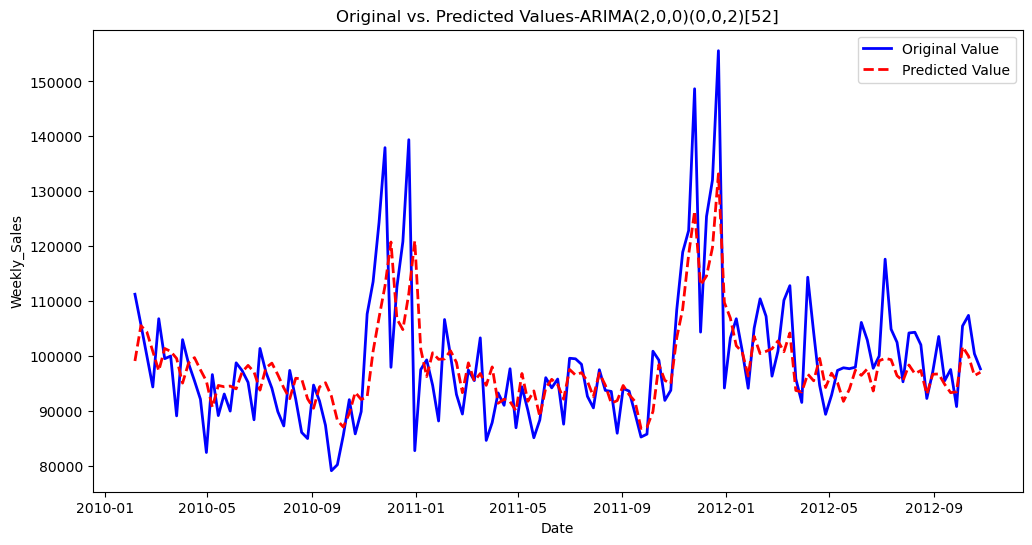

In [73]:
origin_predition_comparison(results,'ARIMA(2,0,0)(0,0,2)[52]')

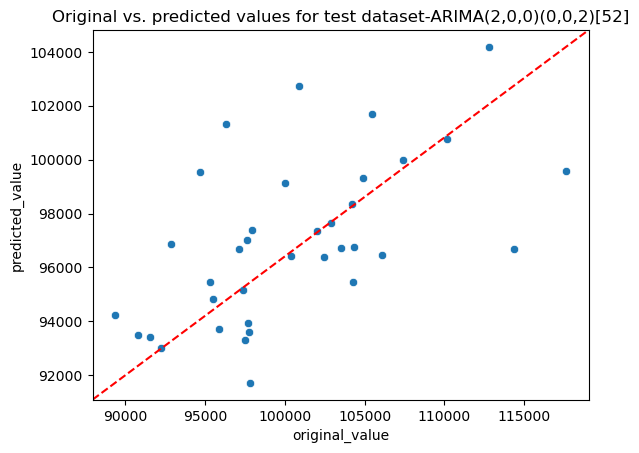

In [74]:
pred_vs_orig(te_results,'ARIMA(2,0,0)(0,0,2)[52]')

In [75]:
residuals = te_results['predicted_value']-te_results['original_value']

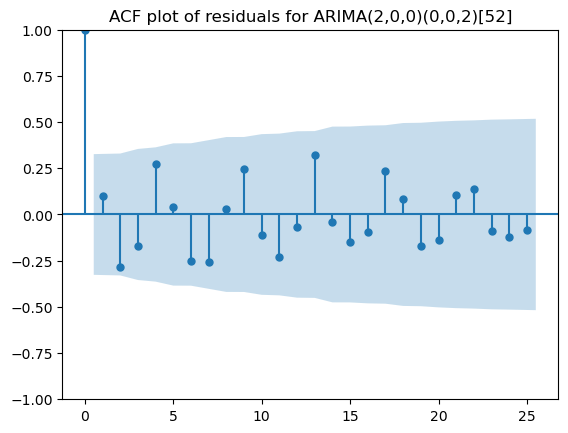

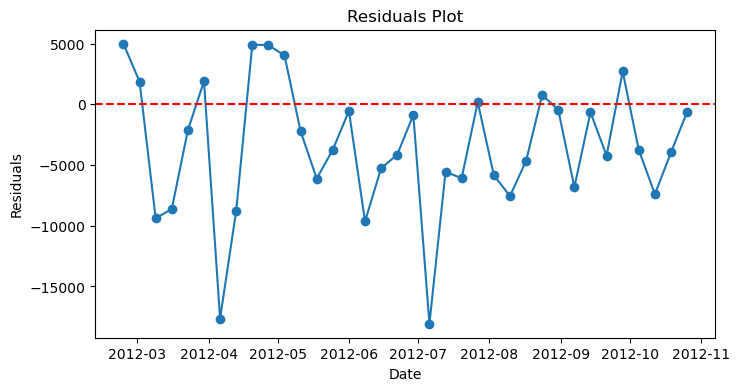

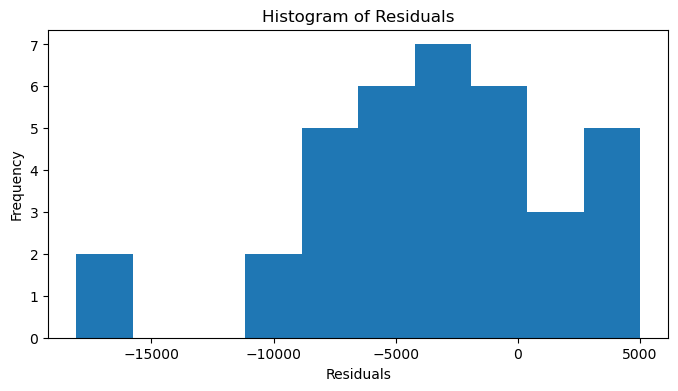

<Figure size 800x400 with 0 Axes>

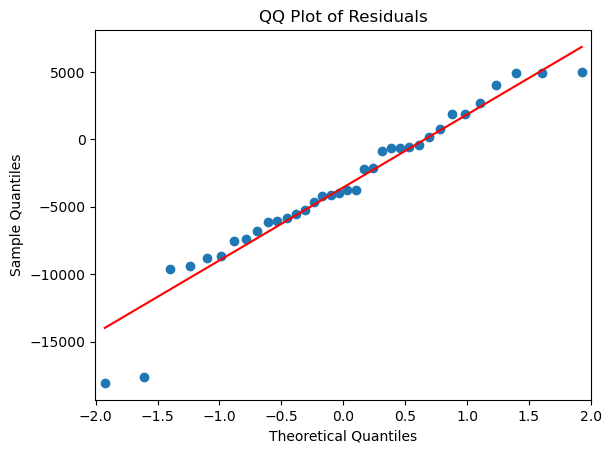

In [76]:
residual_plot(residuals, 'ARIMA(2,0,0)(0,0,2)[52]')

In [77]:
def stat_residual(residuals):
    skewness=stats.skew(residuals)
    kurtosis=stats.kurtosis(residuals)

# conduct a normality test
    jb_test = stats.jarque_bera(residuals)
    J_B=jb_test[0]
    JB_p_value=jb_test[1]
    return skewness, kurtosis,J_B,JB_p_value

In [78]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)
print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.6351713894755452
kurtosis of residuals: 0.6117060120905937
J_B of residuals: 2.9819325318914327
JB_p_value: 0.2251549907952458


When call model.predict(n_periods=n_future_forecast, return_conf_int=True), the n_periods parameter determines how many steps ahead of the end of the training data the model should forecast.need to specify a larger number for the n_periods parameter in the predict method. This will forecast additional points into the future, beyond the end of your dataset

In [79]:
def forecast_auto_arima(pred_period, test,result,model_fit):
    # Assume you want to predict the next 44 points, 36 in the test dataset and 8 points beyond that
    n_future_forecast = len(test)+pred_period
    #create index for future predictions (assume future 8 weeks, the starting point is the date of last row in results+1 week)
    #by default, 'W' frequency stands for 'calendar week end' and the week starts on Monday and ends on Sunday. If a different starting/ending day of the week, use 'W-MON', 'W-TUE', ..., ETC.
    add_future_date_index = pd.date_range(start=results.index[-1]+pd.Timedelta(weeks=1), periods=pred_period, freq='W-FRI')
    # Make your predictions,pmdarima's predict method has a "return_conf_int" parameter that allows to calculate prediction intervals.
    #here the future_forcast contains both test data and future 8 weeks predictions
    future_forecast, conf_int = model_fit.predict(n_periods=n_future_forecast, return_conf_int=True)
    #combine index of test dataset and future predictions(8weeks)
    future_date_index = test.index.append(add_future_date_index)
    # Convert future_forecast and conf_int to pandas Series with the combined_future_index
    future_forecast = pd.Series(future_forecast, index=future_date_index)
    conf_int_lower = pd.Series(conf_int[:, 0], index=future_date_index)
    conf_int_upper = pd.Series(conf_int[:, 1], index=future_date_index)
    return future_forecast,conf_int_lower,conf_int_upper 

In [80]:
# Assume you want to predict the next 44 points, 36 in the test dataset and 8 points beyond that
future_forecast,conf_int_lower,conf_int_upper=forecast_auto_arima(8, test,results,model_fit)


In [81]:
def plot_auto_arima_pred_interval(train, test,future_forecast,conf_int_lower, conf_int_upper):
# Plot the training data
    plt.plot(train.index, train, label='Train')

# Plot the testing data
    plt.plot(test.index, test, label='Test')

# Plot the forecasts
    plt.plot(future_forecast.index, future_forecast, label='Forecast')

# Plot the confidence intervals
    plt.fill_between(conf_int_lower.index, conf_int_lower, conf_int_upper, color='k', alpha=.15)

    
    plt.xticks(rotation='vertical')
# Show the legend and plot everything
    plt.legend()
    plt.show()


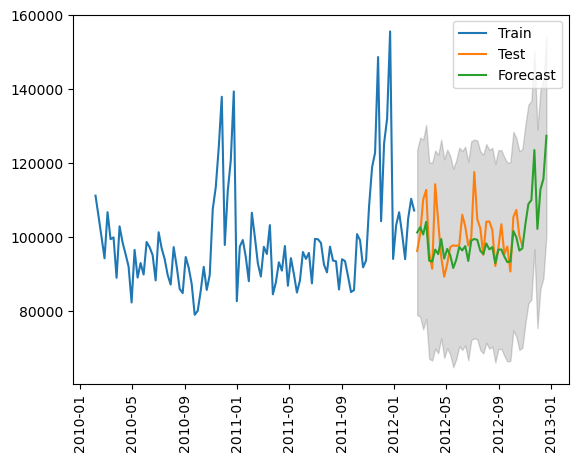

In [82]:
plot_auto_arima_pred_interval(train, test,future_forecast,conf_int_lower, conf_int_upper)

with Arima model, the optimal order is selected at ARIMA(2,0,1)(1,0,0)[52] , as shown in the plot, R2 for test dataset is 0.4, MAPE for test dataset is 0.06 , and the predicted values of weekly_sales for the next 8 weeks does capture the expected trend. 

## 4.6 Regression Model<a id='4.6_Regression_Model'></a>

### 4.6.1 Regression model based on previous weekly_sales <a id='4.6.1_Regression_model_based_on_previous_weekly_sales'></a>

s6_d92 with strong seasonality and trending is selected for the regression model

#### 4.6.1.1 Model fit with one lag value <a id='4.6.1.1_Model_fit_with_one_lag_value'></a>

In [83]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [84]:
df_model

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-02-05      6        40.43       2.572       0.00       0.00       0.00   
2010-02-12      6        40.57       2.548       0.00       0.00       0.00   
2010-02-19      6        43.58       2.514       0.00       0.00       0.00   
2010-02-26      6        47.10       2.561       0.00       0.00       0.00   
2010-03-05      6        49.63       2.625       0.00       0.00       0.00   
...           ...          ...         ...        ...        ...        ...   
2012-09-28      6        77.82       3.666    4181.54       7.64       1.65   
2012-10-05      6        70.84       3.617    9663.09       0.00      40.93   
2012-10-12      6        65.43       3.601    1905.34       0.00      13.83   
2012-10-19      6        69.68       3.594    1476.45       0.00       3.10   
2012-10-26      6        72.34       3.506    6827.59      53.07       0.00   

            MarkDown4  MarkDown5         CPI  Unemployment  ... Weekly_Sales  \
Date                                                        ...                
2010-02-05       0.00       0.00  212.622352         7.259  ...    111241.81   
2010-02-12       0.00       0.00  212.770042         7.259  ...    105728.28   
2010-02-19       0.00       0.00  212.816155         7.259  ...    100089.54   
2010-02-26       0.00       0.00  212.845337         7.259  ...     94350.12   
2010-03-05       0.00       0.00  212.874519         7.259  ...    106781.92   
...               ...        ...         ...           ...  ...          ...   
2012-09-28    1952.69    2447.92  224.602971         5.668  ...     90778.91   
2012-10-05    3720.00    5941.24  224.804222         5.329  ...    105457.17   
2012-10-12     559.50    8706.87  225.005473         5.329  ...    107386.22   
2012-10-19      31.32    4080.57  225.050101         5.329  ...    100390.24   
2012-10-26     319.25    1881.27  225.068625         5.329  ...     97646.76   

            Type    Size  Year  Month  Week  Weekday  Season  \
Date                                                           
2010-02-05     A  202505  2010      2     5        4       1   
2010-02-12     A  202505  2010      2     6        4       1   
2010-02-19     A  202505  2010      2     7        4       1   
2010-02-26     A  202505  2010      2     8        4       1   
2010-03-05     A  202505  2010      3     9        4       1   
...          ...     ...   ...    ...   ...      ...     ...   
2012-09-28     A  202505  2012      9    39        4       3   
2012-10-05     A  202505  2012     10    40        4       4   
2012-10-12     A  202505  2012     10    41        4       4   
2012-10-19     A  202505  2012     10    42        4       4   
2012-10-26     A  202505  2012     10    43        4       4   

                     Holiday_name  MarkDown_Tot  
Date                                             
2010-02-05            non-Holiday          0.00  
2010-02-12              Superbowl          0.00  
2010-02-19  Washington’s Birthday          0.00  
2010-02-26            non-Holiday          0.00  
2010-03-05            non-Holiday          0.00  
...                           ...           ...  
2012-09-28            non-Holiday       8591.44  
2012-10-05            non-Holiday      19365.26  
2012-10-12           Columbus Day      11185.54  
2012-10-19            non-Holiday       5591.44  
2012-10-26            non-Holiday       9081.18  

[143 rows x 22 columns]

In [85]:
# pipeline in sklearn module does not provide statistics of the coefficients for regression
def one_feature_regression_model_alternative(shift_week, df,train_size):
    df_copy=df
    #shift the data by 'shift_week' rows
    df_copy['lag']=df_copy.shift(shift_week)['Weekly_Sales']
    #remove rows with NAs in target col
    df_copy=df.iloc[shift_week:,:]
    X=df_copy['lag']
    y=df_copy['Weekly_Sales']
    # standardize the features
    X = X.to_numpy().reshape(-1, 1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # add a constant (intercept term) to the features
    X_scaled = sm.add_constant(X_scaled)
    #select training dataset
    split=int(len(df_copy) * train_size) 
    X_train, X_test = X_scaled[0:split], X_scaled[split:len(df_copy)]
    y_train, y_test = y[0:split], y[split:len(df_copy)]
    
    # fit the OLS model (Ordinary Least Squares)
    model = sm.OLS(y_train, X_train)
    model_fit= model.fit()
    return X_train,y_train,X_test, y_test, model_fit

In [86]:
 X_train,y_train,X_test, y_test, model_fit=one_feature_regression_model_alternative(1, df_model,0.75)

In [87]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     39.57
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           7.59e-09
Time:                        17:21:28   Log-Likelihood:                -1141.5
No. Observations:                 106   AIC:                             2287.
Df Residuals:                     104   BIC:                             2292.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.871e+04   1129.035     87.431      0.000    9.65e+04    1.01e+05
x1          6395.3062   1016.653      6.291      0.000    4379.245    8411.367
==============================================================================
Omnibus:                       15.500   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.673
Skew:                           0.498   Prob(JB):                     2.96e-08
Kurtosis:                       5.619   Cond. No.                         1.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 the skewness/statistics is the residuals of the dataset that was used to fit the model,which are the training dataset, in order to get test dataset statistics, I need to do manual calculation

In [88]:
def regression_eval(X_train,y_train, X_test,y_test,model_fit):    
    y_tr_pred = model_fit.predict(X_train)
    y_te_pred = model_fit.predict(X_test)
    
    
    train_results= pd.DataFrame({
    'original_value': y_train,
    'predicted_value': y_tr_pred})
    
    test_results= pd.DataFrame({
    'original_value': y_test,
    'predicted_value': y_te_pred})
    
    results=pd.concat([train_results,test_results])
    
    r2_list=[r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)]
    MAE_list=[mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)]
    MAPE_list=[mean_absolute_percentage_error(y_train, y_tr_pred), mean_absolute_percentage_error(y_test, y_te_pred)]
    return r2_list,MAE_list,MAPE_list,test_results, results
     
    
    
    

In [89]:
 r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)

In [90]:
results.head()

original_value  predicted_value
Date                                       
2010-02-12       105728.28    105106.855617
2010-02-19       100089.54    102218.735576
2010-02-26        94350.12     99265.027515
2010-03-05       106781.92     96258.580842
2010-03-12        99505.06    102770.657629

In [91]:
r2_list,MAPE_list,MAE_list

([0.27561983756415864, -0.12288369558432355],
 [0.08024892892046867, 0.05030929937002746],
 [8198.54135653028, 5164.959699777794])

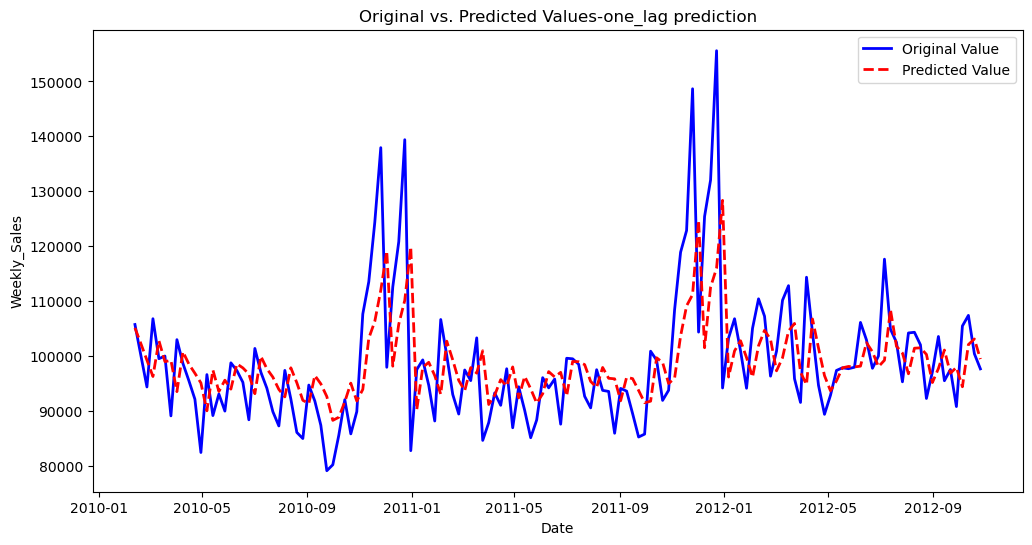

In [92]:
origin_predition_comparison(results,'one_lag prediction')

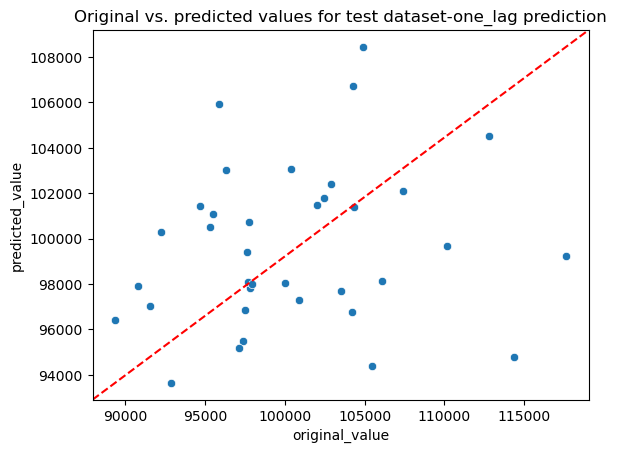

In [93]:
pred_vs_orig(test_results,'one_lag prediction')

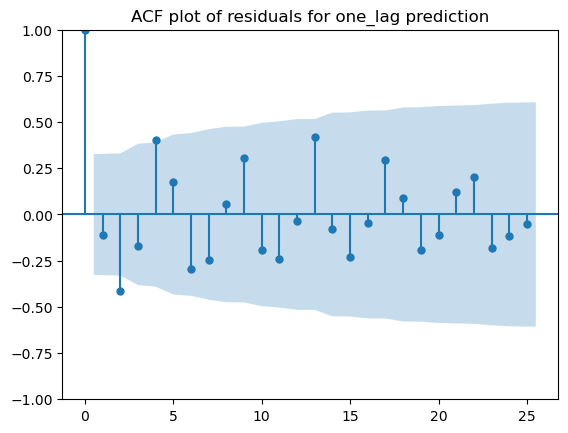

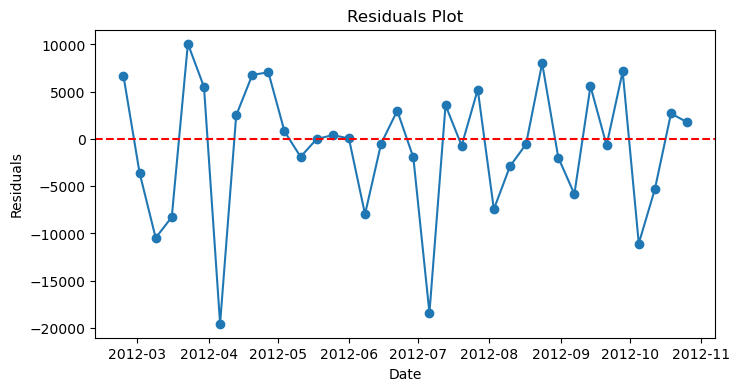

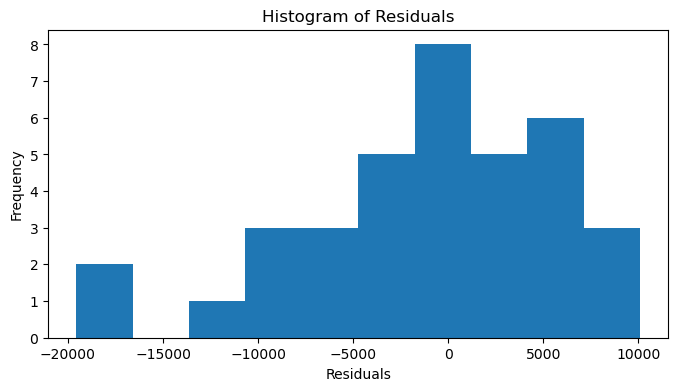

<Figure size 800x400 with 0 Axes>

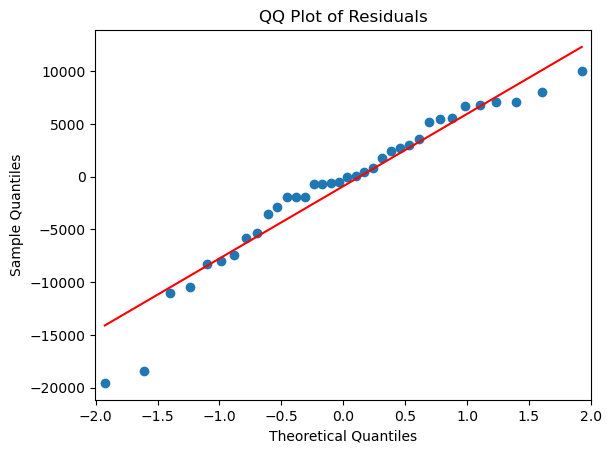

In [94]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'one_lag prediction')

In [95]:
def stat_residual(residuals):
    skewness=stats.skew(residuals)
    kurtosis=stats.kurtosis(residuals)

# conduct a normality test
    jb_test = stats.jarque_bera(residuals)
    J_B=jb_test[0]
    JB_p_value=jb_test[1]
    return skewness, kurtosis,J_B,JB_p_value

In [96]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

In [97]:
print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.8712301395916193
kurtosis of residuals: 0.5718486047731504
J_B of residuals: 5.044767976968494
JB_p_value: 0.08026802043411785


### 4.6.2 Regression with multiple lagged values <a id='4.6.2_Regression_with_multiple_lagged_values'></a>

#### 4.6.2.1 Regression with continuous lag values <a id='4.6.2.1_Regression_with_continuous_lag_values'></a>

In [98]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [99]:
features=['Weekly_Sales']

In [100]:
#create a function to prepare the dataset with lagged features:
def create_lagged_features(df,features,num_lags):
    
    transformed_df=df
    
    for col in features:
        for i in range(1, num_lags + 1):
            transformed_df[f"{col}_lag_{i}"] = transformed_df[col].shift(i)
    transformed_df.dropna(inplace=True)
    return transformed_df

In [101]:
df_lagged=create_lagged_features(df_model,features,5)

In [102]:
df_model.Weekly_Sales

Date
2010-03-12     99505.06
2010-03-19     99977.96
2010-03-26     89084.14
2010-04-02    102967.83
2010-04-09     98645.97
                ...    
2012-09-28     90778.91
2012-10-05    105457.17
2012-10-12    107386.22
2012-10-19    100390.24
2012-10-26     97646.76
Name: Weekly_Sales, Length: 138, dtype: float64

In [103]:
df_model

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-03-12      6        58.82       2.667       0.00       0.00       0.00   
2010-03-19      6        56.55       2.720       0.00       0.00       0.00   
2010-03-26      6        53.74       2.732       0.00       0.00       0.00   
2010-04-02      6        64.94       2.719       0.00       0.00       0.00   
2010-04-09      6        66.15       2.770       0.00       0.00       0.00   
...           ...          ...         ...        ...        ...        ...   
2012-09-28      6        77.82       3.666    4181.54       7.64       1.65   
2012-10-05      6        70.84       3.617    9663.09       0.00      40.93   
2012-10-12      6        65.43       3.601    1905.34       0.00      13.83   
2012-10-19      6        69.68       3.594    1476.45       0.00       3.10   
2012-10-26      6        72.34       3.506    6827.59      53.07       0.00   

            MarkDown4  MarkDown5         CPI  Unemployment  ... Week  Weekday  \
Date                                                        ...                 
2010-03-12       0.00       0.00  212.903702         7.259  ...   10        4   
2010-03-19       0.00       0.00  212.735194         7.259  ...   11        4   
2010-03-26       0.00       0.00  212.533737         7.259  ...   12        4   
2010-04-02       0.00       0.00  212.332280         7.092  ...   13        4   
2010-04-09       0.00       0.00  212.130824         7.092  ...   14        4   
...               ...        ...         ...           ...  ...  ...      ...   
2012-09-28    1952.69    2447.92  224.602971         5.668  ...   39        4   
2012-10-05    3720.00    5941.24  224.804222         5.329  ...   40        4   
2012-10-12     559.50    8706.87  225.005473         5.329  ...   41        4   
2012-10-19      31.32    4080.57  225.050101         5.329  ...   42        4   
2012-10-26     319.25    1881.27  225.068625         5.329  ...   43        4   

            Season  Holiday_name  MarkDown_Tot  Weekly_Sales_lag_1  \
Date                                                                 
2010-03-12       1   non-Holiday          0.00           106781.92   
2010-03-19       1   non-Holiday          0.00            99505.06   
2010-03-26       1   non-Holiday          0.00            99977.96   
2010-04-02       2   non-Holiday          0.00            89084.14   
2010-04-09       2   non-Holiday          0.00           102967.83   
...            ...           ...           ...                 ...   
2012-09-28       3   non-Holiday       8591.44            97524.78   
2012-10-05       4   non-Holiday      19365.26            90778.91   
2012-10-12       4  Columbus Day      11185.54           105457.17   
2012-10-19       4   non-Holiday       5591.44           107386.22   
2012-10-26       4   non-Holiday       9081.18           100390.24   

            Weekly_Sales_lag_2  Weekly_Sales_lag_3  Weekly_Sales_lag_4  \
Date                                                                     
2010-03-12            94350.12           100089.54           105728.28   
2010-03-19           106781.92            94350.12           100089.54   
2010-03-26            99505.06           106781.92            94350.12   
2010-04-02            99977.96            99505.06           106781.92   
2010-04-09            89084.14            99977.96            99505.06   
...                        ...                 ...                 ...   
2012-09-28            95487.92           103544.25            97124.59   
2012-10-05            97524.78            95487.92           103544.25   
2012-10-12            90778.91            97524.78            95487.92   
2012-10-19           105457.17            90778.91            97524.78   
2012-10-26           107386.22           105457.17            90778.91   

            Weekly_Sales_lag_5  
Date                   

#alternative way to do test train split
def select_date(df):
    start_date = min(df.index)
    end_date = max(df.index)
    total_weeks = ((end_date - start_date).days/7)*0.7
    split_date = start_date + timedelta(weeks=int(total_weeks))
    split_date=split_date.date()
    return split_date

In [104]:
def multiple_lag_regression_model(df_lagged,train_size):
    feature_list=[col for col in df_lagged.columns if 'lag_' in col]
    X=df_lagged[feature_list]
    #scale the X
    norm = MinMaxScaler()
    X_scaled = norm.fit_transform(X)
    # add a constant (intercept term) to the features
    X_scaled = sm.add_constant(X_scaled)

    
    #train/test split
    split=int(len(df_lagged) * train_size) 
    X_train, X_test = X_scaled[0:split], X_scaled[split:len(df_lagged)]

    y_train, y_test=df_lagged['Weekly_Sales'][0:split],df_lagged['Weekly_Sales'][split:len(df_lagged)]
   
    
    # fit the OLS model (Ordinary Least Squares)
    model = sm.OLS(y_train, X_train)
    model_fit= model.fit()
    return X_train,y_train,X_test, y_test, model_fit,norm

In [105]:
X_train,y_train,X_test, y_test, model_fit,norm=multiple_lag_regression_model(df_lagged,0.75)

In [106]:
r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)

In [107]:
print("R² list: ",[f"{i:.4f}" for i in r2_list])
print("MAE list: ",[f"{i:.4f}" for i in MAE_list])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE_list])


R² list:  ['0.4266', '0.0879']
MAE list:  ['7361.9852', '5037.3907']
MAPE list:  ['0.0722', '0.0495']


In [108]:
results

original_value  predicted_value
Date                                       
2010-03-12        99505.06    101332.347319
2010-03-19        99977.96     98489.295558
2010-03-26        89084.14     97161.630583
2010-04-02       102967.83     98964.636646
2010-04-09        98645.97     97676.092954
...                    ...              ...
2012-09-28        90778.91     98821.782435
2012-10-05       105457.17     97340.901729
2012-10-12       107386.22     98122.628562
2012-10-19       100390.24    103434.783418
2012-10-26        97646.76     97367.323180

[138 rows x 2 columns]

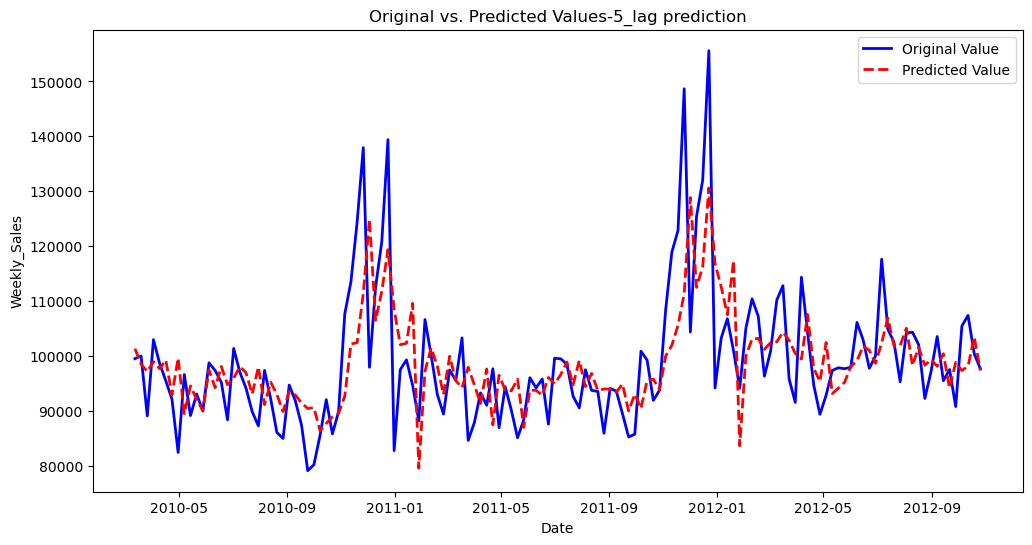

In [109]:
origin_predition_comparison(results,'5_lag prediction')

In [110]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     14.43
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.48e-10
Time:                        17:21:29   Log-Likelihood:                -1098.3
No. Observations:                 103   AIC:                             2209.
Df Residuals:                      97   BIC:                             2224.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.464e+04   2222.439     38.085      0.000    8.02e+04    8.91e+04
x1          3.391e+04   7493.744      4.525      0.000     1.9e+04    4.88e+04
x2          8163.1599   7575.657      1.078      0.284   -6872.423    2.32e+04
x3           811.3018   7642.098      0.106      0.916   -1.44e+04     1.6e+04
x4          3.168e+04   7593.274      4.172      0.000    1.66e+04    4.67e+04
x5         -2.013e+04   7498.919     -2.685      0.009    -3.5e+04   -5247.698
==============================================================================
Omnibus:                        9.861   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               15.571
Skew:                           0.393   Prob(JB):                     0.000416
Kurtosis:                       4.735   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

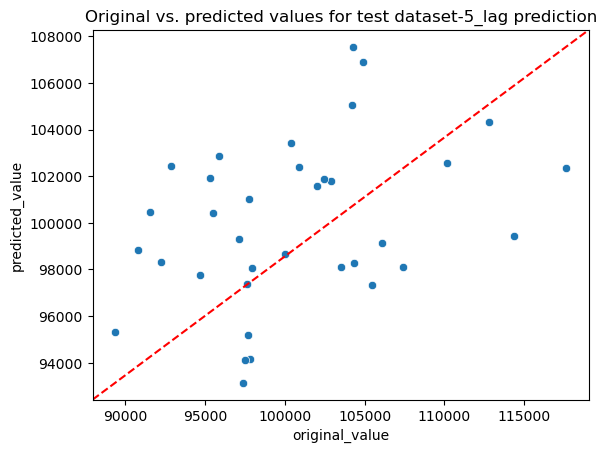

In [111]:
pred_vs_orig(test_results,'5_lag prediction')

In [112]:
test_results

original_value  predicted_value
Date                                       
2012-03-02       100868.45    102404.915645
2012-03-09       110145.24    102564.344233
2012-03-16       112803.56    104323.053709
2012-03-23        95842.64    102852.750201
2012-03-30        91530.30    100473.807085
2012-04-06       114341.11     99425.934118
2012-04-13       104240.89    107553.945514
2012-04-20        94650.71     97744.637379
2012-04-27        89365.89     95336.287236
2012-05-04        92846.82    102442.890633
2012-05-11        97360.34     93136.720550
2012-05-18        97841.75     94138.929904
2012-05-25        97676.93     95205.831810
2012-06-01        97946.52     98063.607364
2012-06-08       106107.67     99123.448681
2012-06-15       102911.54    101778.683917
2012-06-22        97756.50    101041.049015
2012-06-29        99995.00     98657.253891
2012-07-06       117631.29    102373.267171
2012-07-13       104876.59    106902.058212
2012-07-20       102480.16    101862.041921
2012-07-27        95288.21    101909.428529
2012-08-03       104187.97    105044.408769
2012-08-10       104312.39     98274.662962
2012-08-17       102025.59    101566.586704
2012-08-24        92254.28     98313.780216
2012-08-31        97124.59     99318.076709
2012-09-07       103544.25     98119.521719
2012-09-14        95487.92    100400.706564
2012-09-21        97524.78     94123.427054
2012-09-28        90778.91     98821.782435
2012-10-05       105457.17     97340.901729
2012-10-12       107386.22     98122.628562
2012-10-19       100390.24    103434.783418
2012-10-26        97646.76     97367.323180

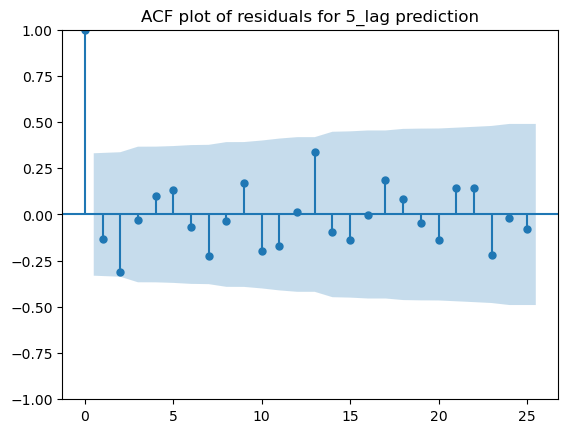

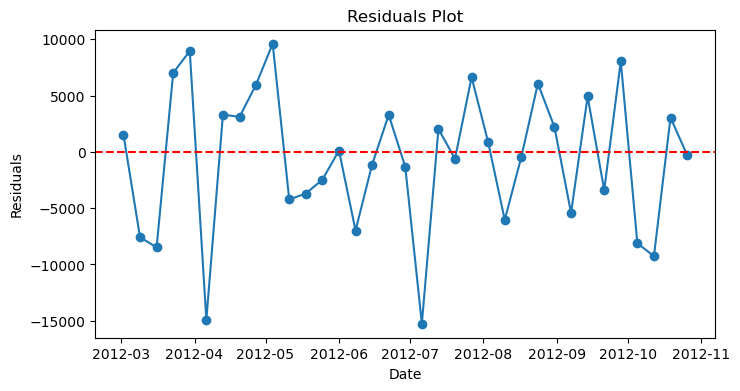

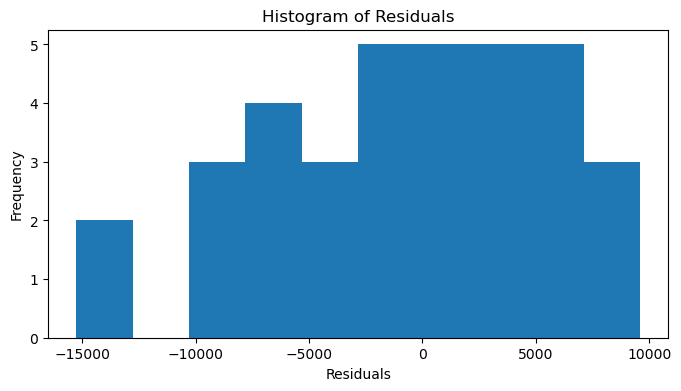

<Figure size 800x400 with 0 Axes>

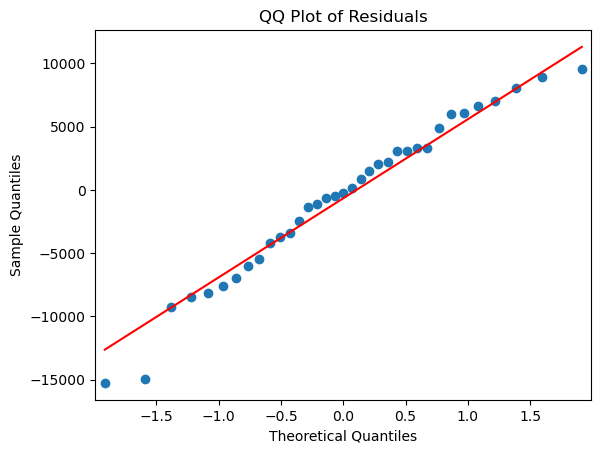

In [113]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, '5_lag prediction')

In [114]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.4650710546092073
kurtosis of residuals: -0.3403928483777561
J_B of residuals: 1.430671133745004
JB_p_value: 0.4890279826690126


comparing to the results of predicted value with only one lag sales, the results are improved, R2 test is 0.09 vs -0.12,  MAPE for test change from 0.05 to 0.049 

#### 4.6.2.2 GridSearch to find optimal continuous lag values <a id='4.6.2.2_GridSearch_to_find_optimal_continuous_lag_values'></a>

In [115]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [116]:
lag_values = range(1, 10)  # adjust as needed

# Initialize lists to store the results
r2_list = []
MAE_list = []
MAPE_list = []

# Loop over the range of lag values
for num_lags in lag_values:
    # Create lagged features
    df_lagged = create_lagged_features(df_model, ['Weekly_Sales'], num_lags)  # assuming "Weekly_Sales" is your feature of interest
    
    # Split the data and fit the regression model
    X_train, y_train, X_test, y_test, model_fit,norm = multiple_lag_regression_model(df_lagged, train_size=0.75)  # adjust train_size as needed

    # Evaluate the model and record the results
    r2, MAE, MAPE, _, _ = regression_eval(X_train, y_train, X_test, y_test, model_fit)
    r2_list.append(r2[1])
    MAE_list.append(MAE[1])
    MAPE_list.append(MAPE[1])

# Find the optimal lag values
optimal_lag = lag_values[np.argmin(MAPE_list)]  # replace with argmin and MAE_list/MAPE_list if using those metrics
print(f"Optimal number of lags: {optimal_lag}")






Optimal number of lags: 7


In [117]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [118]:
df_lagged = create_lagged_features(df_model, ['Weekly_Sales'], 7)

In [119]:
X_train, y_train, X_test, y_test, model_fit,norm = multiple_lag_regression_model(df_lagged, train_size=0.75)

In [120]:
r2, MAE, MAPE, test_results, results = regression_eval(X_train, y_train, X_test, y_test, model_fit)

In [121]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     10.45
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.21e-09
Time:                        17:21:29   Log-Likelihood:                -1087.2
No. Observations:                 102   AIC:                             2190.
Df Residuals:                      94   BIC:                             2211.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.576e+04   2390.692     35.873      0.000     8.1e+04    9.05e+04
x1          3.131e+04   7857.185      3.985      0.000    1.57e+04    4.69e+04
x2          9563.2713   8484.498      1.127      0.263   -7282.899    2.64e+04
x3          3918.9424   8384.629      0.467      0.641   -1.27e+04    2.06e+04
x4          3.264e+04   7690.103      4.245      0.000    1.74e+04    4.79e+04
x5         -1.554e+04   8388.562     -1.853      0.067   -3.22e+04    1111.319
x6         -4853.3589   8483.878     -0.572      0.569   -2.17e+04     1.2e+04
x7         -7098.9876   7859.719     -0.903      0.369   -2.27e+04    8506.669
==============================================================================
Omnibus:                       11.179   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               18.555
Skew:                           0.441   Prob(JB):                     9.35e-05
Kurtosis:                       4.894   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
print("R² list: ",[f"{i:.4f}" for i in r2])
print("MAE list: ",[f"{i:.4f}" for i in MAE])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE])


R² list:  ['0.4376', '0.1927']
MAE list:  ['7286.6530', '4848.1555']
MAPE list:  ['0.0716', '0.0475']


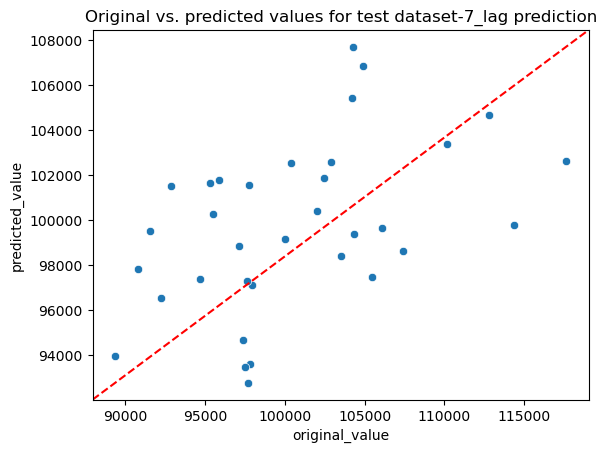

In [123]:
pred_vs_orig(test_results,'7_lag prediction')

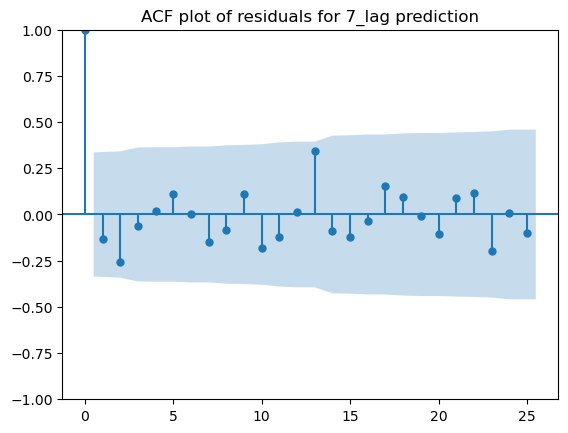

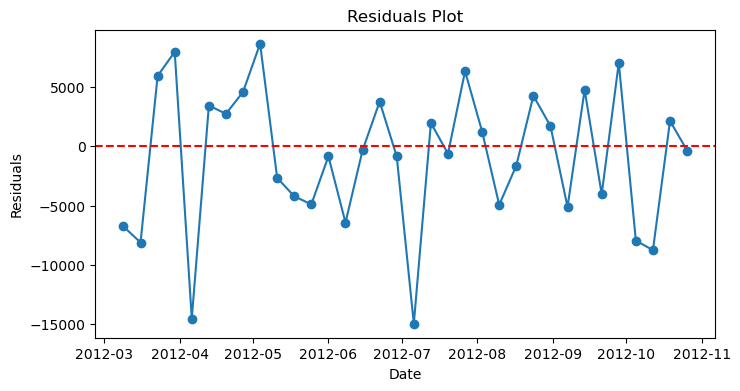

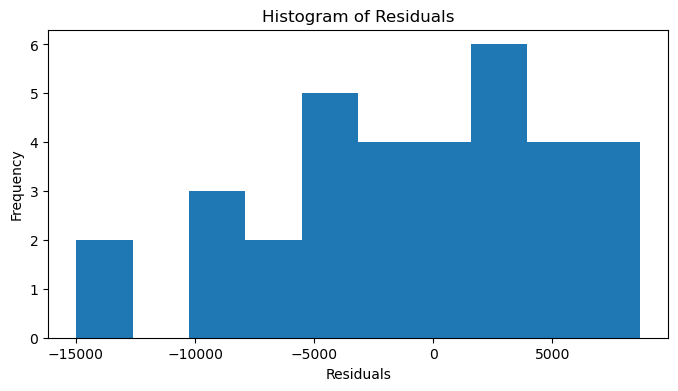

<Figure size 800x400 with 0 Axes>

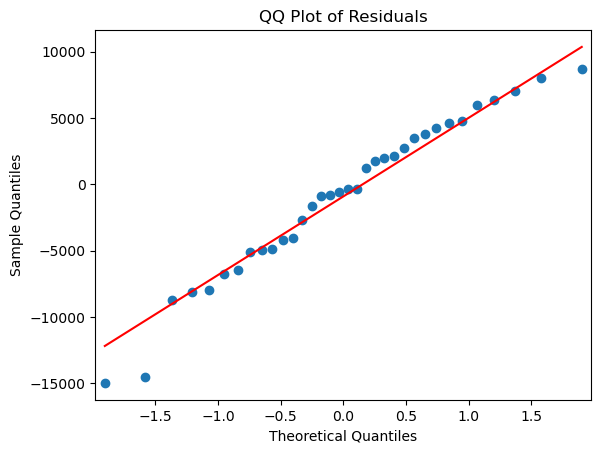

In [124]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, '7_lag prediction')

In [125]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.4994899835037241
kurtosis of residuals: -0.2978255725732457
J_B of residuals: 1.5394364820611104
JB_p_value: 0.463143544776789


The optimal continuous lagged value is 7, in which the MAPE of predicted value for test dataset is 0.0475, R2 is 0.19

#### 4.6.2.3 GridSearch to find optimal combination lag values <a id='4.6.2.2_GridSearch_to_find_optimal_combination_lag_values'></a>

In [126]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [127]:
lag_values = range(1, 6)  # adjust as needed

# Create all combinations of three lag values
lag_combinations = list(itertools.combinations(lag_values, 3))
print(lag_combinations)

[(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]


In [128]:
type(lag_combinations[0])

tuple

In [129]:
features=['Weekly_Sales']

In [130]:
#create a function to prepare the dataset with lagged features in lag_combinations:
def create_discrete_lagged_features(df,features,lags):
    
    transformed_df=df
    
    for col in features:
        for i in lags:
            transformed_df[f"{col}_lag_{i}"] = transformed_df[col].shift(i)
    transformed_df.dropna(inplace=True)
    return transformed_df

In [131]:
create_discrete_lagged_features(df_model,features,(1,2,4))

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-03-05      6        49.63       2.625       0.00       0.00       0.00   
2010-03-12      6        58.82       2.667       0.00       0.00       0.00   
2010-03-19      6        56.55       2.720       0.00       0.00       0.00   
2010-03-26      6        53.74       2.732       0.00       0.00       0.00   
2010-04-02      6        64.94       2.719       0.00       0.00       0.00   
...           ...          ...         ...        ...        ...        ...   
2012-09-28      6        77.82       3.666    4181.54       7.64       1.65   
2012-10-05      6        70.84       3.617    9663.09       0.00      40.93   
2012-10-12      6        65.43       3.601    1905.34       0.00      13.83   
2012-10-19      6        69.68       3.594    1476.45       0.00       3.10   
2012-10-26      6        72.34       3.506    6827.59      53.07       0.00   

            MarkDown4  MarkDown5         CPI  Unemployment  ...  Year  Month  \
Date                                                        ...                
2010-03-05       0.00       0.00  212.874519         7.259  ...  2010      3   
2010-03-12       0.00       0.00  212.903702         7.259  ...  2010      3   
2010-03-19       0.00       0.00  212.735194         7.259  ...  2010      3   
2010-03-26       0.00       0.00  212.533737         7.259  ...  2010      3   
2010-04-02       0.00       0.00  212.332280         7.092  ...  2010      4   
...               ...        ...         ...           ...  ...   ...    ...   
2012-09-28    1952.69    2447.92  224.602971         5.668  ...  2012      9   
2012-10-05    3720.00    5941.24  224.804222         5.329  ...  2012     10   
2012-10-12     559.50    8706.87  225.005473         5.329  ...  2012     10   
2012-10-19      31.32    4080.57  225.050101         5.329  ...  2012     10   
2012-10-26     319.25    1881.27  225.068625         5.329  ...  2012     10   

            Week Weekday  Season  Holiday_name  MarkDown_Tot  \
Date                                                           
2010-03-05     9       4       1   non-Holiday          0.00   
2010-03-12    10       4       1   non-Holiday          0.00   
2010-03-19    11       4       1   non-Holiday          0.00   
2010-03-26    12       4       1   non-Holiday          0.00   
2010-04-02    13       4       2   non-Holiday          0.00   
...          ...     ...     ...           ...           ...   
2012-09-28    39       4       3   non-Holiday       8591.44   
2012-10-05    40       4       4   non-Holiday      19365.26   
2012-10-12    41       4       4  Columbus Day      11185.54   
2012-10-19    42       4       4   non-Holiday       5591.44   
2012-10-26    43       4       4   non-Holiday       9081.18   

            Weekly_Sales_lag_1  Weekly_Sales_lag_2  Weekly_Sales_lag_4  
Date                                                                    
2010-03-05            94350.12           100089.54           111241.81  
2010-03-12           106781.92            94350.12           105728.28  
2010-03-19            99505.06           106781.92           100089.54  
2010-03-26            99977.96            99505.06            94350.12  
2010-04-02            89084.14            99977.96           106781.92  
...                        ...                 ...                 ...  
2012-09-28            97524.78            95487.92            97124.59  
2012-10-05            90778.91            97524.78           103544.25  
2012-10-12           105457.17            90778.91            95487.92  
2012-10-19           107386.22           105457.17            97524.78  
2012-10-26           100390.24           107386.22            90778.91  

[139 rows x 25 columns]

In [132]:
# Initialize lists to store the results
r2_list = []
MAE_list = []
MAPE_list = []

# Loop over the range of lag values
for i, lags in enumerate(lag_combinations):
    df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]
    #print(num_lags)
    df_lagged = create_discrete_lagged_features(df_model, ['Weekly_Sales'], lags) 
    cols_with_lag = [col for col in df_lagged.columns if '_lag' in col]
    #print(cols_with_lag)
        #print(f"Number of instances after creating lag features: {len(df_lagged)}")
         # Split the data and fit the regression model
    X_train, y_train, X_test, y_test, model_fit,norm = multiple_lag_regression_model(df_lagged, train_size=0.75)  # adjust train_size as needed

    # Evaluate the model and record the results
    r2, MAE, MAPE, _, _ = regression_eval(X_train, y_train, X_test, y_test, model_fit)
    r2_list.append(r2[1])
    MAE_list.append(MAE[1])
    MAPE_list.append(MAPE[1])

# Find the optimal lag values
optimal_lag = lag_combinations[np.argmin(MAPE_list)]  # replace with argmin and MAE_list/MAPE_list if using those metrics
print(f"Optimal number of lags: {optimal_lag}")

Optimal number of lags: (1, 3, 4)


In [133]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [134]:
df_lagged = create_discrete_lagged_features(df_model, ['Weekly_Sales'], (1,3,4))

In [135]:
X_train, y_train, X_test, y_test, model_fit,norm = multiple_lag_regression_model(df_lagged, train_size=0.75)
r2, MAE, MAPE, test_results, results = regression_eval(X_train, y_train, X_test, y_test, model_fit)
print("R² list: ",[f"{i:.4f}" for i in r2])
print("MAE list: ",[f"{i:.4f}" for i in MAE])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE])  

R² list:  ['0.3772', '0.2078']
MAE list:  ['7475.5611', '4528.9277']
MAPE list:  ['0.0728', '0.0444']


In [136]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     20.19
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           2.62e-10
Time:                        17:21:30   Log-Likelihood:                -1113.0
No. Observations:                 104   AIC:                             2234.
Df Residuals:                     100   BIC:                             2244.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.395e+04   2203.676     38.094      0.000    7.96e+04    8.83e+04
x1          3.015e+04   6774.980      4.450      0.000    1.67e+04    4.36e+04
x2          1130.7268   7447.831      0.152      0.880   -1.36e+04    1.59e+04
x3          2.606e+04   7190.549      3.624      0.000    1.18e+04    4.03e+04
==============================================================================
Omnibus:                       18.758   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.003
Skew:                           0.643   Prob(JB):                     7.57e-10
Kurtosis:                       5.835   Cond. No.                         9.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

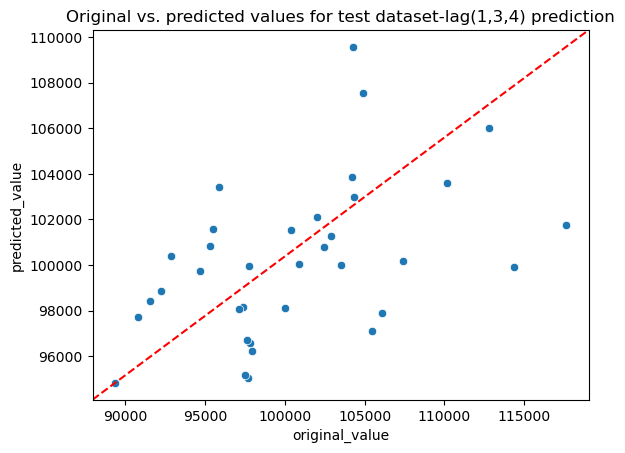

In [137]:
pred_vs_orig(test_results,'lag(1,3,4) prediction')

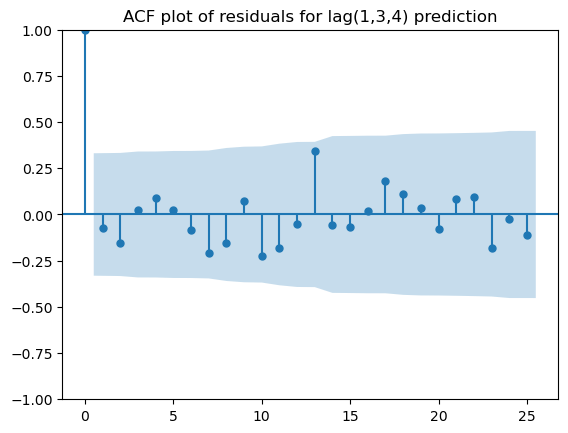

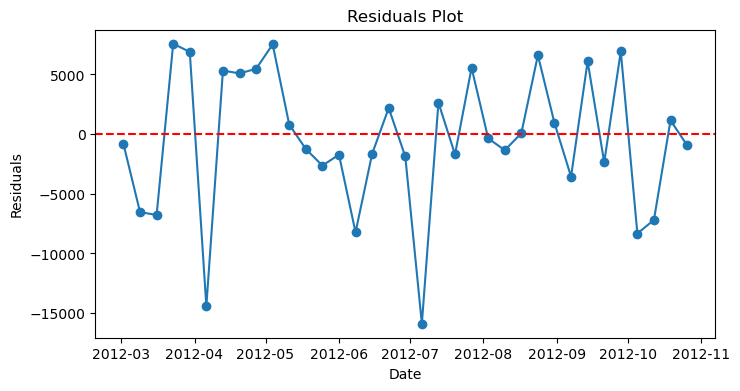

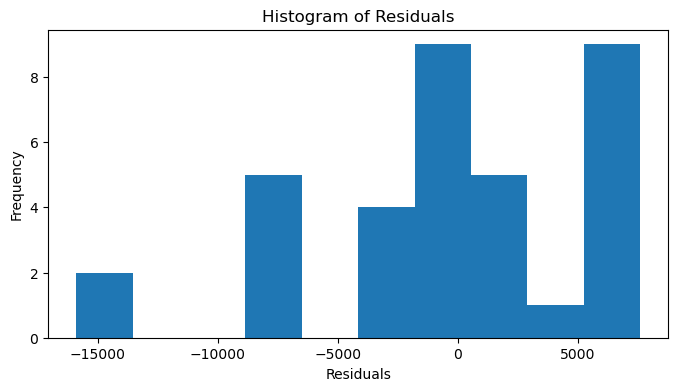

<Figure size 800x400 with 0 Axes>

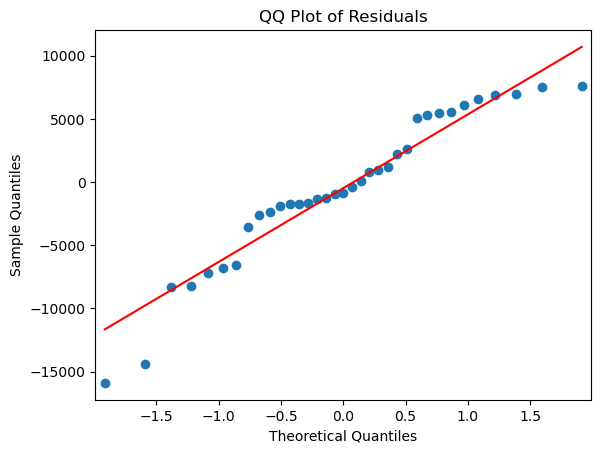

In [138]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'lag(1,3,4) prediction')

In [139]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.6905578229236266
kurtosis of residuals: 0.2036888181732679
J_B of residuals: 2.842247277702142
JB_p_value: 0.24144257016940696


For optimal lag combinations, lag (1,3,4) provided lowest MAPE 0.044, slightly improved in R2 as well from 0.19 to 0.20. Using different lag values does improve the performance of the model than 1 lagged value, R2 improved from -0.12 to 0.20, MAPE improved slightly from 0.05 to 0.044

#### 4.6.2.4 Predictions with updated lagged values <a id='4.6.2.4_Regression_with_updated_lagged_values'></a>

Based on the previous regression model, linear regression with lag(1,3,4) is selected as the model for predictions

In [140]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

#create df with lagged values
df_lagged=create_discrete_lagged_features(df_model,features,(1,3,4))
#create cols for laaged_values and includ 'Weekly_Sales' col in df 
cols_with_lag = [col for col in df_lagged.columns if '_lag' in col]
cols_with_lag.append('Weekly_Sales')
#here I need to select the last n rows use for prediction (n= max(lags)+1)
df_lagged_pred=df_lagged.iloc[-5:][cols_with_lag]

In [141]:
df_lagged_pred

Weekly_Sales_lag_1  Weekly_Sales_lag_3  Weekly_Sales_lag_4  \
Date                                                                     
2012-09-28            97524.78           103544.25            97124.59   
2012-10-05            90778.91            95487.92           103544.25   
2012-10-12           105457.17            97524.78            95487.92   
2012-10-19           107386.22            90778.91            97524.78   
2012-10-26           100390.24           105457.17            90778.91   

            Weekly_Sales  
Date                      
2012-09-28      90778.91  
2012-10-05     105457.17  
2012-10-12     107386.22  
2012-10-19     100390.24  
2012-10-26      97646.76

In [142]:
for i in range (1,9):
    #create index for new row
    future_date_index = pd.date_range(start=df_lagged_pred.index[-1]+pd.Timedelta(weeks=1),periods=1,freq='W-FRI')
    # Create a new row with an index of last row in lagged_df+ 1 week
    new_row = pd.DataFrame(index=future_date_index, 
                          columns=df_lagged_pred.columns)
    # Append the new row DataFrame to the original DataFrame
    df_lagged_pred = df_lagged_pred.append(new_row)
    #assign each col (first three cols)at last row to the corresponding lag values
    df_lagged_pred.iloc[-1, :3] = [df_lagged_pred['Weekly_Sales'].iloc[-2], df_lagged_pred['Weekly_Sales'].iloc[-4], df_lagged_pred['Weekly_Sales'].iloc[-5]]
    #create X predictors with this lag_values , don't use iloc[-1],it change into array instead of df series
    X_new=df_lagged_pred[[col for col in df_lagged.columns if '_lag' in col]].iloc[-1:]
    
    X_scaled = norm.transform(X_new.values.reshape(1, -1))
    
    #add constant col to fit statmodels!!
    #add constant col
    ones = np.ones((X_scaled.shape[0], 1))
    X_scaled_update= np.concatenate((ones, X_scaled), axis=1)
    #predict the weekly sales based on these lag values
    prediction = model_fit.predict(X_scaled_update)
    print(prediction)
    #assign predicted value to the weekly_sales
    df_lagged_pred['Weekly_Sales'].iloc[-1]=prediction
   # intervals = prediction.conf_int(alpha=0.05)
   # df_lagged_pred['upper_bond']=intervals[1]
   # df_lagged_pred['lower_bond']=intervals[0]

[100656.7227037]
[102396.44154937]
[100658.78005824]
[99084.14549608]
[99514.47768381]
[100250.88627107]
[99925.99825885]
[99268.04584227]


In [143]:
df_lagged_pred

Weekly_Sales_lag_1  Weekly_Sales_lag_3  Weekly_Sales_lag_4  \
2012-09-28        97524.780000       103544.250000        97124.590000   
2012-10-05        90778.910000        95487.920000       103544.250000   
2012-10-12       105457.170000        97524.780000        95487.920000   
2012-10-19       107386.220000        90778.910000        97524.780000   
2012-10-26       100390.240000       105457.170000        90778.910000   
2012-11-02        97646.760000       107386.220000       105457.170000   
2012-11-09       100656.722704       100390.240000       107386.220000   
2012-11-16       102396.441549        97646.760000       100390.240000   
2012-11-23       100658.780058       100656.722704        97646.760000   
2012-11-30        99084.145496       102396.441549       100656.722704   
2012-12-07        99514.477684       100658.780058       102396.441549   
2012-12-14       100250.886271        99084.145496       100658.780058   
2012-12-21        99925.998259        99514.477684        99084.145496   

             Weekly_Sales  
2012-09-28   90778.910000  
2012-10-05  105457.170000  
2012-10-12  107386.220000  
2012-10-19  100390.240000  
2012-10-26   97646.760000  
2012-11-02  100656.722704  
2012-11-09  102396.441549  
2012-11-16  100658.780058  
2012-11-23   99084.145496  
2012-11-30   99514.477684  
2012-12-07  100250.886271  
2012-12-14   99925.998259  
2012-12-21   99268.045842

In [144]:
future_forecast=df_lagged_pred['Weekly_Sales'].loc[test_results.index[-1]:]

In [145]:
future_forecast

2012-10-26     97646.760000
2012-11-02    100656.722704
2012-11-09    102396.441549
2012-11-16    100658.780058
2012-11-23     99084.145496
2012-11-30     99514.477684
2012-12-07    100250.886271
2012-12-14     99925.998259
2012-12-21     99268.045842
Name: Weekly_Sales, dtype: float64

In [146]:
results

original_value  predicted_value
Date                                       
2010-03-05       106781.92    101303.261701
2010-03-12        99505.06    104241.048177
2010-03-19        99977.96     99368.267381
2010-03-26        89084.14     97783.614291
2010-04-02       102967.83     97617.233232
...                    ...              ...
2012-09-28        90778.91     97713.986608
2012-10-05       105457.17     97123.034540
2012-10-12       107386.22    100193.472668
2012-10-19       100390.24    101547.658574
2012-10-26        97646.76     96710.226138

[139 rows x 2 columns]

In [147]:
def plot_lag_regression_pred_interval(results,future_forecast):
# Plot the orginal data
    plt.plot(results.index, results['original_value'], label='original')


# Plot the forecasts
    plt.plot(future_forecast.index, future_forecast, label='Forecast')

# Plot the confidence intervals
    #plt.fill_between(conf_int_lower.index, conf_int_lower, conf_int_upper, color='k', alpha=.15)

    
    plt.xticks(rotation='vertical')
# Show the legend and plot everything
    plt.legend()
    plt.show()


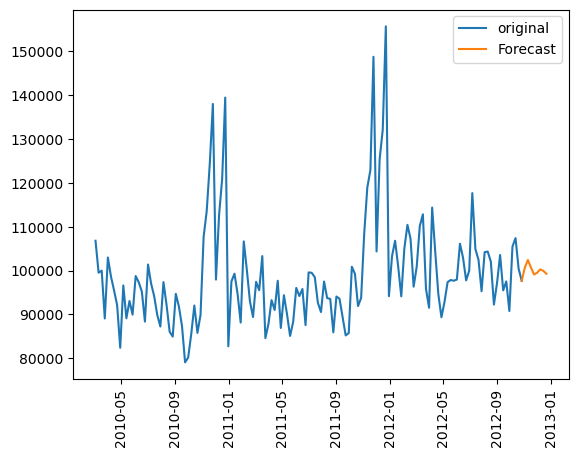

In [148]:
plot_lag_regression_pred_interval(results,future_forecast)

The prediction is based on three lagged values (1,3,4) for 8 weeks, and each of the prediction is based updated lagged values

### 4.6.3 Regression Model with  Exogenous Variables<a id='4.6.3_Regression_Model_with_Exogenous_Variables'></a>

### 4.6.3.1 Dummy Features<a id='4.6.3.1_Dummy_Features'></a>

In [149]:
ts_s6_d92.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly_Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'Holiday_name', 'MarkDown_Tot'],
      dtype='object')

In [150]:
#create dummy variables for col 'Holiday_name'
def dummy_df(df):
    df=pd.get_dummies(df,columns=['Holiday_name'])
    return df


In [151]:
ts_s6_d92_dummy=dummy_df(ts_s6_d92)

In [152]:
ts_s6_d92_dummy.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly_Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'MarkDown_Tot',
       'Holiday_name_Birthday of Martin Luther King, Jr.',
       'Holiday_name_Christmas Day', 'Holiday_name_Columbus Day',
       'Holiday_name_Independence Day', 'Holiday_name_Labor Day',
       'Holiday_name_Memorial Day', 'Holiday_name_New Year's Day',
       'Holiday_name_Superbowl', 'Holiday_name_Thanksgiving Day',
       'Holiday_name_Veterans Day', 'Holiday_name_Washington’s Birthday',
       'Holiday_name_non-Holiday'],
      dtype='object')

In [153]:
ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [154]:
ts_s6_d92_dummy.columns

Index(['Store', 'Temperature', 'Fuel Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'MarkDown Tot',
       'Holiday name Birthday of Martin Luther King  Jr ',
       'Holiday name Christmas Day', 'Holiday name Columbus Day',
       'Holiday name Independence Day', 'Holiday name Labor Day',
       'Holiday name Memorial Day', 'Holiday name New Year s Day',
       'Holiday name Superbowl', 'Holiday name Thanksgiving Day',
       'Holiday name Veterans Day', 'Holiday name Washington s Birthday',
       'Holiday name non Holiday'],
      dtype='object')

In [155]:
dummy_features=[col for col in ts_s6_d92_dummy.columns if 'Holiday name' in col]

In [156]:
dummy_features

['Holiday name Birthday of Martin Luther King  Jr ',
 'Holiday name Christmas Day',
 'Holiday name Columbus Day',
 'Holiday name Independence Day',
 'Holiday name Labor Day',
 'Holiday name Memorial Day',
 'Holiday name New Year s Day',
 'Holiday name Superbowl',
 'Holiday name Thanksgiving Day',
 'Holiday name Veterans Day',
 'Holiday name Washington s Birthday',
 'Holiday name non Holiday']

In [157]:
added_features=['Temperature', 'Fuel Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

In [158]:
exogenous_feature=added_features+dummy_features

In [159]:
exogenous_feature

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Holiday name Birthday of Martin Luther King  Jr ',
 'Holiday name Christmas Day',
 'Holiday name Columbus Day',
 'Holiday name Independence Day',
 'Holiday name Labor Day',
 'Holiday name Memorial Day',
 'Holiday name New Year s Day',
 'Holiday name Superbowl',
 'Holiday name Thanksgiving Day',
 'Holiday name Veterans Day',
 'Holiday name Washington s Birthday',
 'Holiday name non Holiday']

#### 4.6.3.2 Regression Model with current  Exogenous Values <a id='4.6.3.2_Regression_Model_with_current_Exogenous_Values'></a>

##### 4.6.3.2.1 Regression with All Numeric Features<a id='4.6.3.2.1_Regression_with_All_Numeric_Features'></a>

In [160]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

ts_s6_d92_dummy=dummy_df(df_model)

ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [161]:
ts_s6_d92_dummy.columns

Index(['Store', 'Temperature', 'Fuel Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'MarkDown Tot',
       'Holiday name Birthday of Martin Luther King  Jr ',
       'Holiday name Christmas Day', 'Holiday name Columbus Day',
       'Holiday name Independence Day', 'Holiday name Labor Day',
       'Holiday name Memorial Day', 'Holiday name New Year s Day',
       'Holiday name Superbowl', 'Holiday name Thanksgiving Day',
       'Holiday name Veterans Day', 'Holiday name Washington s Birthday',
       'Holiday name non Holiday'],
      dtype='object')

In [162]:
col_to_select=list(set(exogenous_feature)-set(dummy_features))

In [163]:
col_to_select.append('Weekly Sales')

#remove the features of markdowns from the model
feature_no_MK=[i for i in exogenous_feature if 'MarkDown' not in i]

(array([0.e+00, 1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05]),
 [Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, ''),
  Text(1, 0, '')])

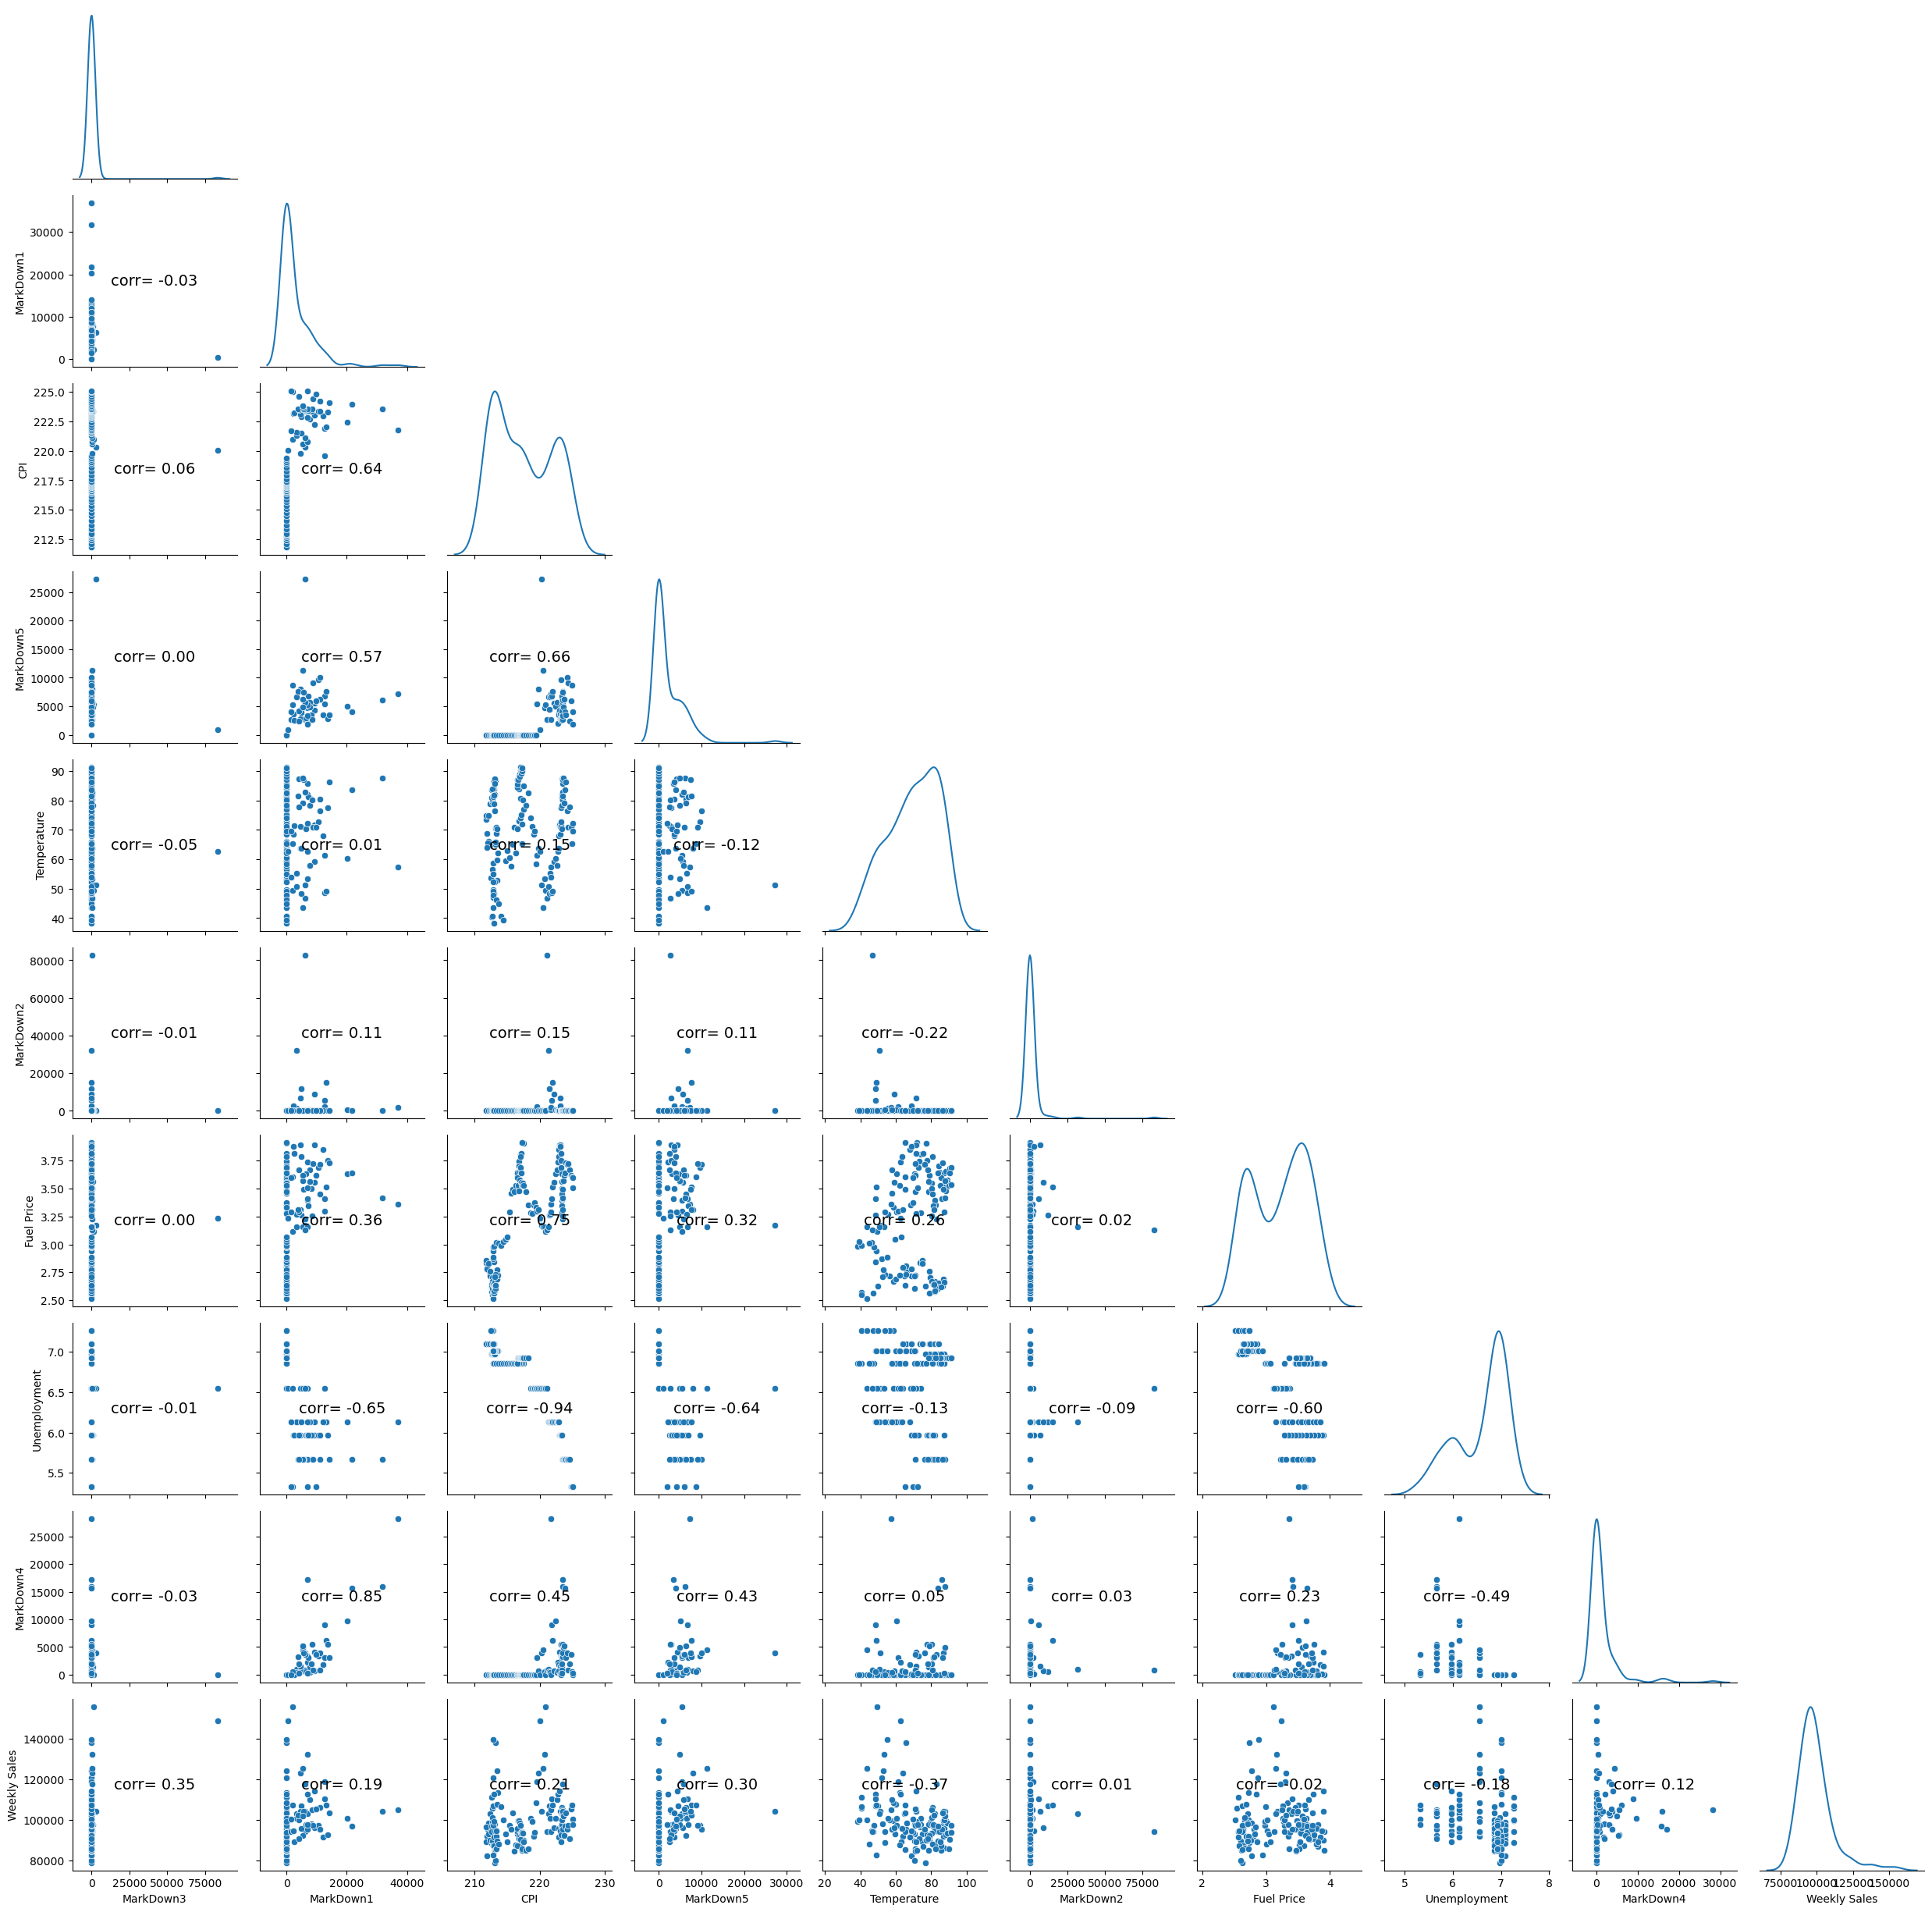

In [164]:
g = sns.PairGrid(ts_s6_d92_dummy[col_to_select], diag_sharey=False, corner=True)

for i, j in zip(*np.tril_indices_from(g.axes, -1)):
    g.axes[i, j].annotate(f"corr= {ts_s6_d92_dummy[col_to_select[i]].corr(ts_s6_d92_dummy[col_to_select[j]]):.2f}", (0.5, 0.5), 
                           xycoords='axes fraction', ha='center', va='center', fontsize=14)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
plt.xticks(fontsize=14)  # for x axis
plt.yticks(fontsize=14)  # for y axis

In [165]:
def scaler(df,col_to_scale,scaler_function):
    scaler=scaler_function
    df[col_to_scale] = scaler.fit_transform(df[col_to_scale])
    return df,scaler

In [166]:
ts_s6_d92_dummy,scaler=scaler(ts_s6_d92_dummy,added_features,MinMaxScaler())

In [167]:
def exogenous_OSL_regression_model(df,feature_list,train_size):
        
    feature_list=exogenous_feature
    
    X=df[feature_list]
    # add a constant (intercept term) to the features
    X = sm.add_constant(X)

    
    #train/test split
    split=int(len(df) * train_size) 
    X_train, X_test = X[0:split], X[split:len(df)]

    y_train, y_test=df['Weekly Sales'][0:split],df['Weekly Sales'][split:len(df)]
   
    
    # fit the OLS model (Ordinary Least Squares)
    model = sm.OLS(y_train, X_train)
    model_fit= model.fit()
    return X_train,y_train,X_test, y_test, model_fit

In [168]:
X_train,y_train,X_test, y_test, model_fit=exogenous_OSL_regression_model(ts_s6_d92_dummy,exogenous_feature,0.8)

In [169]:
 r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)

In [170]:
print("R² list: ",[f"{i:.4f}" for i in r2_list])
print("MAE list: ",[f"{i:.4f}" for i in MAE_list])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE_list])

R² list:  ['0.6112', '-0.7411']
MAE list:  ['5826.0395', '6440.3324']
MAPE list:  ['0.0590', '0.0662']


In [171]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly Sales   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     7.311
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           7.82e-12
Time:                        17:21:35   Log-Likelihood:                -1190.4
No. Observations:                 114   AIC:                             2423.
Df Residuals:                      93   BIC:                             2480.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             8.522e+04   1.34e+04      6.366      0.000    5.86e+04    1.12e+05
Temperature                                      -1.869e+04   3922.084     -4.766      0.000   -2.65e+04   -1.09e+04
Fuel Price                                       -1.722e+04   5738.338     -3.001      0.003   -2.86e+04   -5827.100
MarkDown1                                          972.8383   2.55e+04      0.038      0.970   -4.96e+04    5.15e+04
MarkDown2                                        -5.672e+04   1.26e+04     -4.486      0.000   -8.18e+04   -3.16e+04
MarkDown3                                        -1603.7486   1.33e+04     -0.120      0.905   -2.81e+04    2.49e+04
MarkDown4                                        -6983.8273   2.52e+04     -0.277      0.782    -5.7e+04    4.31e+04
MarkDown5                                         4867.3207   1.01e+04      0.481      0.632   -1.52e+04     2.5e+04
CPI                                               4.477e+04   1.31e+04      3.421      0.001    1.88e+04    7.08e+04
Unemployment                                      2.139e+04   1.57e+04      1.361      0.177   -9822.397    5.26e+04
Holiday name Birthday of Martin Luther King  Jr  -7293.4976   6355.217     -1.148      0.254   -1.99e+04    5326.704
Holiday name Christmas Day                        3.662e+04   8328.113      4.397      0.000    2.01e+04    5.32e+04
Holiday name Columbus Day                        -3012.9129   6439.766     -0.468      0.641   -1.58e+04    9775.186
Holiday name Independence Day                     8378.0103   6520.774      1.285      0.202   -4570.954    2.13e+04
Holiday name Labor Day                            -697.6090   6535.402     -0.107      0.915   -1.37e+04    1.23e+04
Holiday name Memorial Day                         7841.0309   6507.074      1.205      0.231   -5080.728    2.08e+04
Holiday name New Year s Day                      -2639.1774   6486.978     -0.407      0.685   -1.55e+04    1.02e+04
Holiday name Superbowl                           -1839.0625   5579.896     -0.330      0.742   -1.29e+04    9241.506
Holiday name Thanksgiving Day                     4.145e+04   8721.504      4.752      0.000    2.41e+04    5.88e+04
Holiday name Veterans Day                         1.386e+04   6894.416      2.011      0.047     172.985    2.76e+04
Holiday name Washington s Birthday               -8007.8906   5514.663     -1.452      0.150    -1.9e+04    2943.138
Holiday name non Holiday                           566.7078   2416.992      0.234      0.815   -4232.960    5366.376
==============================================================================
Omnibus:                       19.767   Durbin-Watson:                   1.650


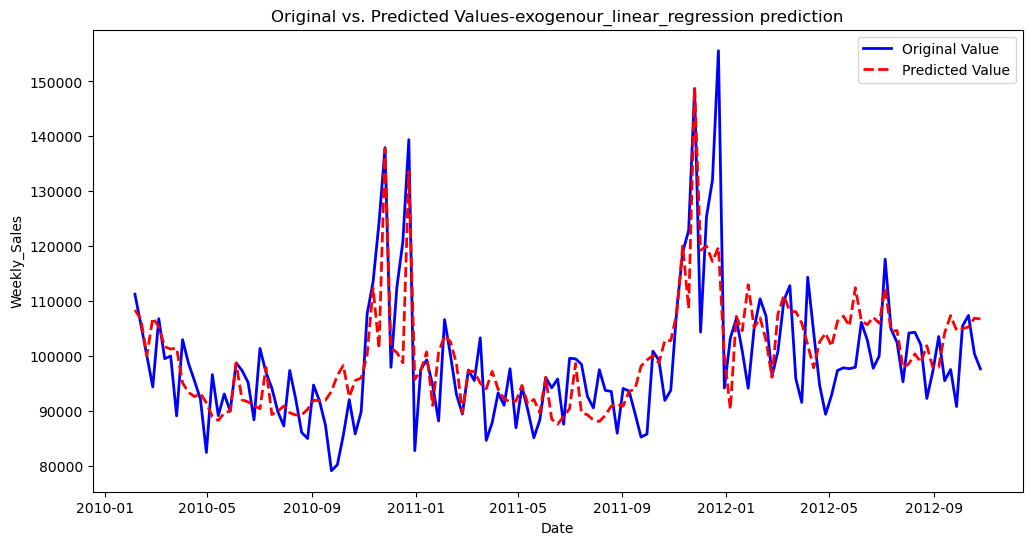

In [172]:
origin_predition_comparison(results,'exogenour_linear_regression prediction')

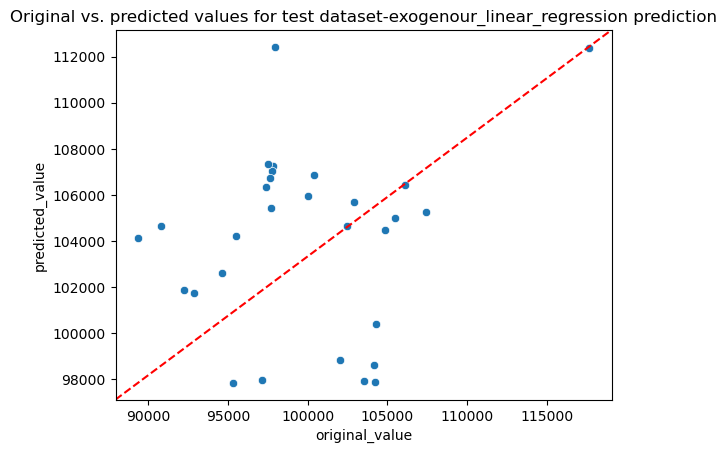

In [173]:
pred_vs_orig(test_results,'exogenour_linear_regression prediction')

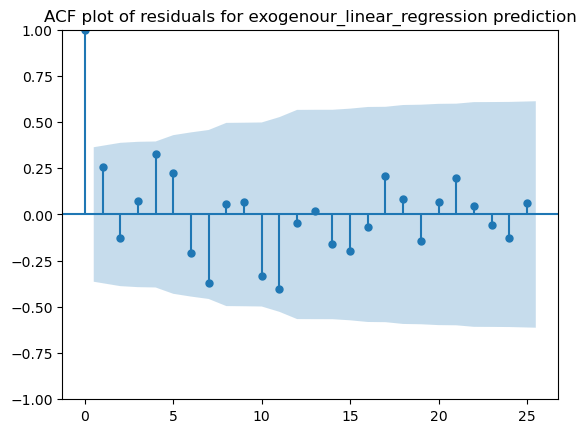

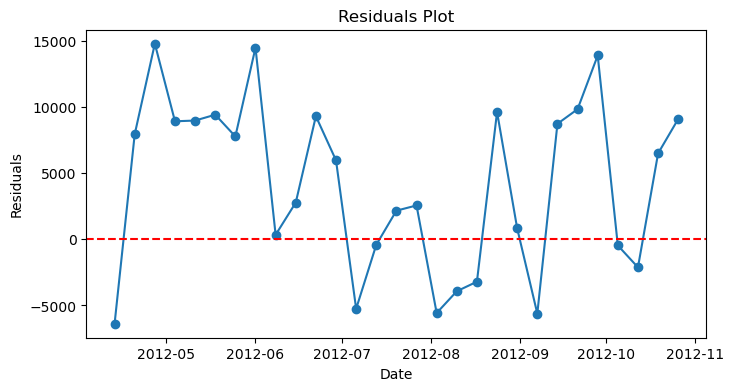

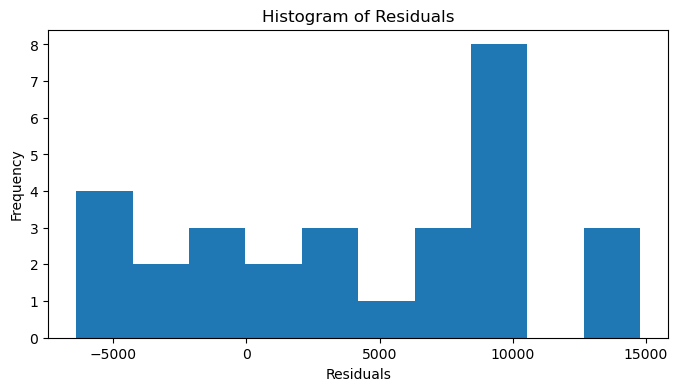

<Figure size 800x400 with 0 Axes>

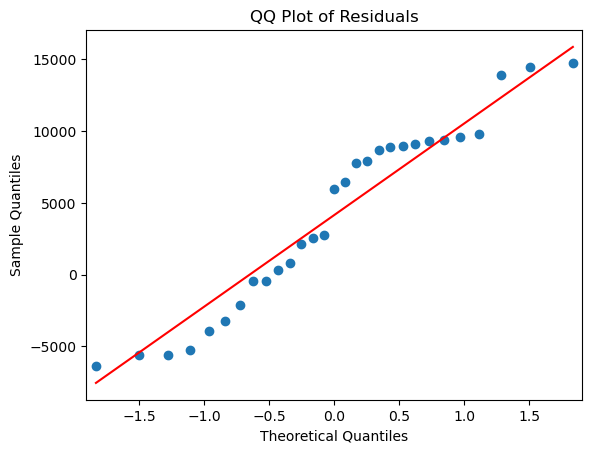

In [174]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'exogenour_linear_regression prediction')

In [175]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.12880123356770568
kurtosis of residuals: -1.1904664009828254
J_B of residuals: 1.7926462168897626
JB_p_value: 0.40806732397624745


##### 4.6.3.2.2 k_fold Cross Validation<a id='4.6.3.2.2_k_fold_Cross_Validation'></a>

https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

In [176]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

ts_s6_d92_dummy=dummy_df(df_model)

ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [177]:
ts_s6_d92_dummy

Store  Temperature  Fuel Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-02-05      6        40.43       2.572       0.00       0.00       0.00   
2010-02-12      6        40.57       2.548       0.00       0.00       0.00   
2010-02-19      6        43.58       2.514       0.00       0.00       0.00   
2010-02-26      6        47.10       2.561       0.00       0.00       0.00   
2010-03-05      6        49.63       2.625       0.00       0.00       0.00   
...           ...          ...         ...        ...        ...        ...   
2012-09-28      6        77.82       3.666    4181.54       7.64       1.65   
2012-10-05      6        70.84       3.617    9663.09       0.00      40.93   
2012-10-12      6        65.43       3.601    1905.34       0.00      13.83   
2012-10-19      6        69.68       3.594    1476.45       0.00       3.10   
2012-10-26      6        72.34       3.506    6827.59      53.07       0.00   

            MarkDown4  MarkDown5         CPI  Unemployment  ...  \
Date                                                        ...   
2010-02-05       0.00       0.00  212.622352         7.259  ...   
2010-02-12       0.00       0.00  212.770042         7.259  ...   
2010-02-19       0.00       0.00  212.816155         7.259  ...   
2010-02-26       0.00       0.00  212.845337         7.259  ...   
2010-03-05       0.00       0.00  212.874519         7.259  ...   
...               ...        ...         ...           ...  ...   
2012-09-28    1952.69    2447.92  224.602971         5.668  ...   
2012-10-05    3720.00    5941.24  224.804222         5.329  ...   
2012-10-12     559.50    8706.87  225.005473         5.329  ...   
2012-10-19      31.32    4080.57  225.050101         5.329  ...   
2012-10-26     319.25    1881.27  225.068625         5.329  ...   

           Holiday name Columbus Day  Holiday name Independence Day  \
Date                                                                  
2010-02-05                         0                              0   
2010-02-12                         0                              0   
2010-02-19                         0                              0   
2010-02-26                         0                              0   
2010-03-05                         0                              0   
...                              ...                            ...   
2012-09-28                         0                              0   
2012-10-05                         0                              0   
2012-10-12                         1                              0   
2012-10-19                         0                              0   
2012-10-26                         0                              0   

            Holiday name Labor Day Holiday name Memorial Day  \
Date                                                           
2010-02-05                       0                         0   
2010-02-12                       0                         0   
2010-02-19                       0                         0   
2010-02-26                       0                         0   
2010-03-05                       0                         0   
...                            ...                       ...   
2012-09-28                       0                         0   
2012-10-05                       0                         0   
2012-10-12                       0                         0   
2012-10-19                       0                         0   
2012-10-26                       0                         0   

            Holiday name New Year s Day  Holiday name Superbowl  \
Date                                                              
2010-02-05                            0                       0   
2010-02-12                            0                       1   
2010-02-19                            0                       0   
2010-02-26          

In [178]:
scaler=MinMaxScaler()
ts_s6_d92_dummy[added_features] = scaler.fit_transform(ts_s6_d92_dummy[added_features])

In [179]:
ts_s6_d92_dummy.columns

Index(['Store', 'Temperature', 'Fuel Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'MarkDown Tot',
       'Holiday name Birthday of Martin Luther King  Jr ',
       'Holiday name Christmas Day', 'Holiday name Columbus Day',
       'Holiday name Independence Day', 'Holiday name Labor Day',
       'Holiday name Memorial Day', 'Holiday name New Year s Day',
       'Holiday name Superbowl', 'Holiday name Thanksgiving Day',
       'Holiday name Veterans Day', 'Holiday name Washington s Birthday',
       'Holiday name non Holiday'],
      dtype='object')

In [180]:
len(exogenous_feature)

21

In [181]:
added_features

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [182]:
#perform cross validation 
def cross_validation(df,col_to_scale,model,k_folds):        
    feature_list=exogenous_feature
    X=df[feature_list]
    y=df['Weekly Sales']
    
    # Initialize lists to store evaluation metrics
    mae_train_scores = []
    mape_train_scores = [] 
    mae_test_scores = []
    mape_test_scores = [] 
   
    tscv = TimeSeriesSplit(n_splits=k_folds)
    for train_index, test_index in tscv.split(X):
        X_train_window = X.iloc[train_index]
        y_train_window = y.iloc[train_index]
        X_test_window = X.iloc[test_index]
        y_test_window = y.iloc[test_index]
        train_index_window=X_train_window.index
        test_index_window=X_test_window.index
        #print(f'train_index_window:{train_index_window}\n',
        #     f'test_index_window:{test_index_window}\n')
        # Fit the regression model
        model_fit=model.fit(X_train_window, y_train_window)
    
        y_train_pred_window = model.predict(X_train_window)
        y_test_pred_window = model.predict(X_test_window)
        
        mae_train = mean_absolute_error(y_train_window, y_train_pred_window)
        mape_train = mean_absolute_percentage_error(y_train_window, y_train_pred_window)
        mae_test = mean_absolute_error(y_test_window, y_test_pred_window)
        mape_test = mean_absolute_percentage_error(y_test_window, y_test_pred_window)
        
        # Make predictions on the testing window
        # Append the evaluation metrics to the lists
        mae_train_scores.append(mae_train)
        mae_test_scores.append(mae_test)
        mape_train_scores.append(mape_train)
        mape_test_scores.append(mape_test)
    
    # keep last set of cross validation datasets including training and test data
    train_df = pd.DataFrame({'original_value': y_train_window, 'predicted_value': y_train_pred_window}, index=train_index_window)
    
    test_df = pd.DataFrame({'original_value': y_test_window, 'predicted_value': y_test_pred_window},index=test_index_window)
    
    return mape_train_scores,mape_test_scores,test_df,train_df

In [183]:
model = LinearRegression()


In [184]:
mape_train_scores,mape_test_scores,test_df,train_df=cross_validation(ts_s6_d92_dummy,added_features, model,5)

In [185]:
print(f'mape_train_scores:{mape_train_scores}\n',f'mape_test_scores:{mape_test_scores}')

mape_train_scores:[0.03828658924736086, 0.05325181839608271, 0.04963462069109263, 0.04899272860514972, 0.060653672638869026]
 mape_test_scores:[0.15798609700565913, 0.34366797579963315, 0.07113372581598068, 4.894597409202648, 0.052894077077869216]


In [186]:
average_train_mape=np.mean(mape_train_scores)
average_test_mape=np.mean(mape_test_scores)
std_train_mape=np.std(mape_train_scores)
std_test_mape=np.std(mape_test_scores)

In [187]:
print(f'average_train_mape: {average_train_mape}\n'
      f'average_test_mape: {average_test_mape}\n'
      f'std_train_mape: {std_train_mape}\n'
      f'std_test_mape: {std_test_mape}')

average_train_mape: 0.05016388591571099
average_test_mape: 1.104055856980358
std_train_mape: 0.007242829002161377
std_test_mape: 1.89806808077507


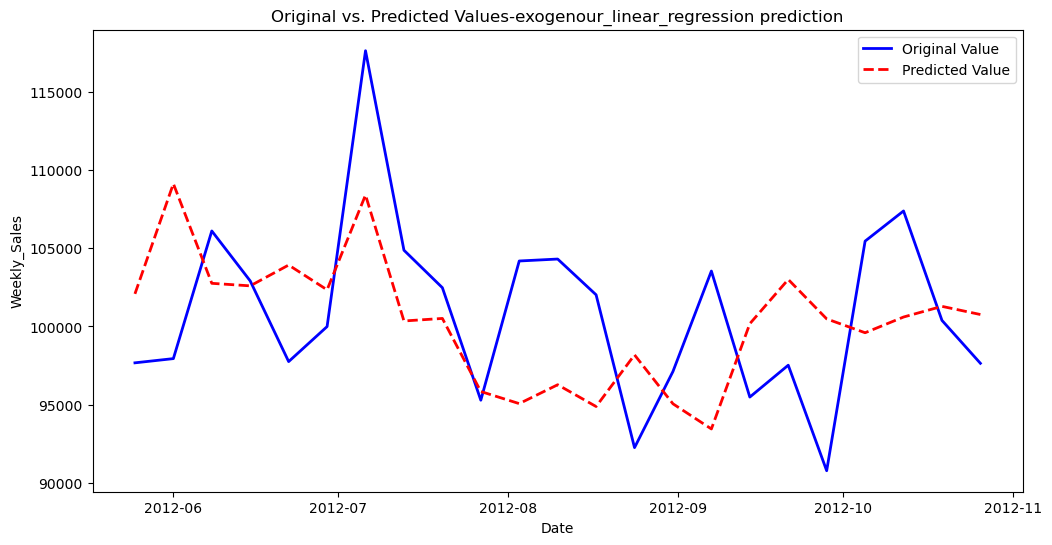

In [188]:
origin_predition_comparison(test_df,'exogenour_linear_regression prediction')

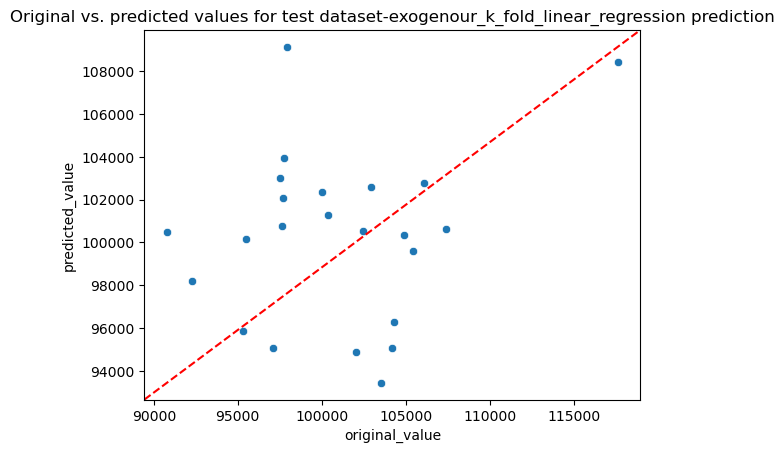

In [189]:
pred_vs_orig(test_df,'exogenour_k_fold_linear_regression prediction')

In [190]:
residuals = test_df['predicted_value']-test_df['original_value']
#residual_plot(residuals, 'exogenour_k_fold_linear_regression prediction')

In [191]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: 0.11899837986921688
kurtosis of residuals: -1.0928760338997359
J_B of residuals: 1.198894629655143
JB_p_value: 0.5491150399834441


##### 4.6.3.2.3 One-step Cross Validation<a id='4.6.3.2.3_One-step_Cross_Validation'></a>

In [192]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

ts_s6_d92_dummy=dummy_df(df_model)

ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [193]:
added_features

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [194]:
scaler=MinMaxScaler()
ts_s6_d92_dummy[added_features] = scaler.fit_transform(ts_s6_d92_dummy[added_features])

In [195]:
#https://machinelearningmastery.com/random-forest-for-time-series-forecasting/

def walk_forward_validation(df, feature_list, train_size,model):
    #train/test split
    #scaler=MinMaxScaler(feature_range=(0, 1))
    #df[col_to_scale] = scaler.fit_transform(df[col_to_scale])
    feature_list=feature_list
    split=int(len(df) * train_size) 
    train=df.iloc[:split]
    test=df.iloc[split:]
    X_train, y_train = train[feature_list], train['Weekly Sales']
    
    y_test_pred = []
    walk_forward_train_mape=[]
    walk_forward_test_mape=[]
    y_test_orig=test['Weekly Sales']
    #column_positions = [df.columns.get_loc(col) for col in feature_list]
    # step over each time-step in the test set
    for index in test.index.tolist():
        model_fit=model.fit(X_train,y_train)
        y_train_pred=model.predict(X_train)
        train_mape=mean_absolute_percentage_error(y_train, y_train_pred)
        walk_forward_train_mape.append(train_mape)
    # split test row into input and output columns
        X_test, y_test = test.loc[[index], feature_list], test.loc[[index], 'Weekly Sales']
    # fit model on history and make a prediction
        y_pred = model.predict(X_test.to_numpy().reshape(1,-1))

        test_mape=mean_absolute_percentage_error(y_test, y_pred)
        walk_forward_test_mape.append(test_mape)
        #print(y_pred)
    # store forecast in list of predictions
        y_test_pred.extend(y_pred)
        
     # add actual observation to history for the next loop
        X_train.append(X_test)
        y_train.append(y_test)
        # Create a DataFrame for the test data
    #first need to flattern list of arrays
    test_df = pd.DataFrame({'original_value': y_test_orig, 'predicted_value': y_test_pred})
    
    return walk_forward_train_mape,walk_forward_test_mape,test_df

In [196]:
walk_forward_train_mape,walk_forward_test_mape,test_df=walk_forward_validation(ts_s6_d92_dummy,exogenous_feature,0.8,LinearRegression())

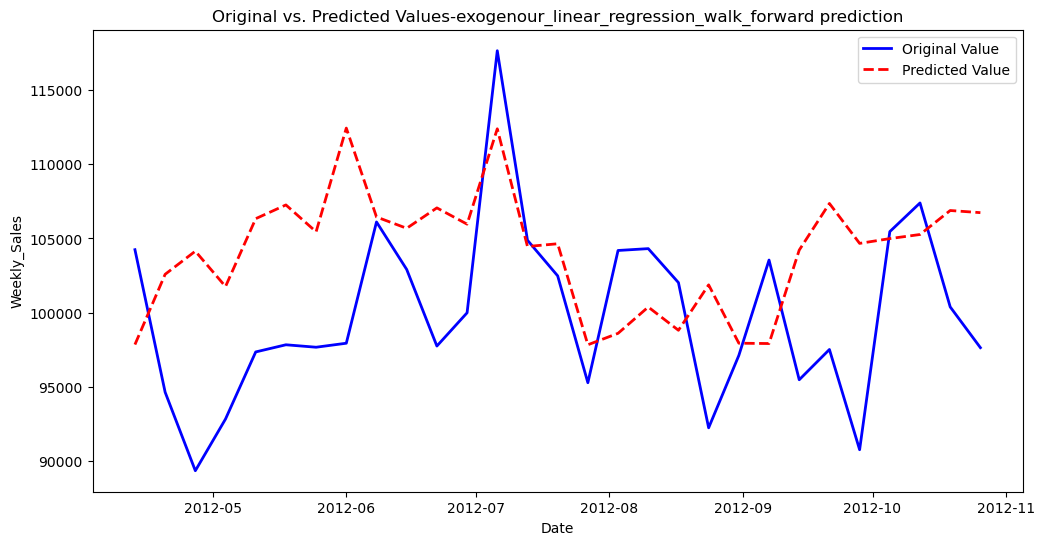

In [197]:
origin_predition_comparison(test_df,'exogenour_linear_regression_walk_forward prediction')

In [198]:
average_train_mape=np.mean(walk_forward_train_mape)
average_test_mape=np.mean(walk_forward_test_mape)
std_train_mape=np.std(walk_forward_train_mape)
std_test_mape=np.std(walk_forward_test_mape)

In [199]:
print(f'average_train_mape: {average_train_mape}\n'
      f'average_test_mape: {average_test_mape}\n'
      f'std_train_mape: {std_train_mape}\n'
      f'std_test_mape: {std_test_mape}')

average_train_mape: 0.05898435927900094
average_test_mape: 0.06621044595233774
std_train_mape: 6.938893903907228e-18
std_test_mape: 0.044308720512833986


In [200]:
r2=r2_score(test_df['original_value'],test_df['predicted_value'])
r2

-0.7410909089269808

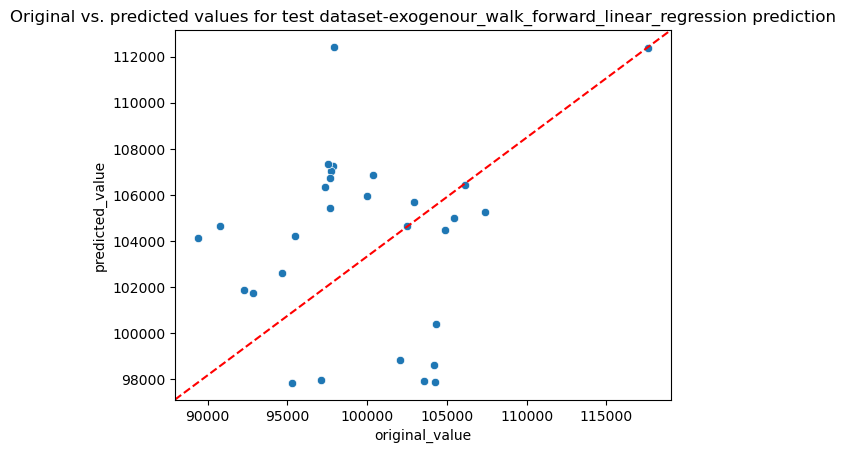

In [201]:
pred_vs_orig(test_df,'exogenour_walk_forward_linear_regression prediction')

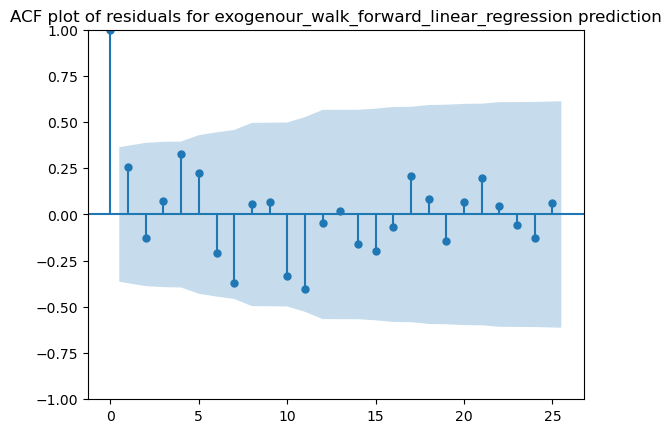

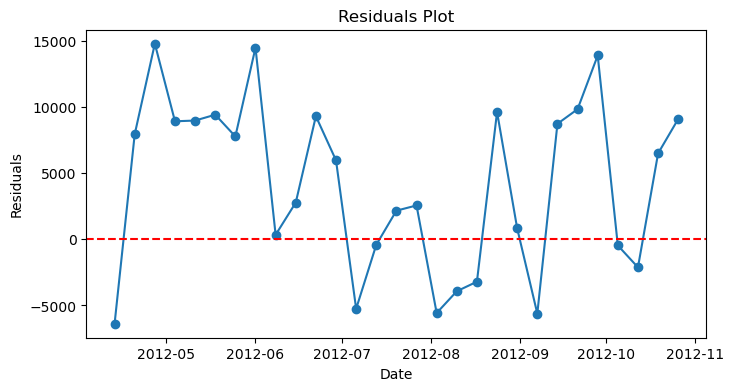

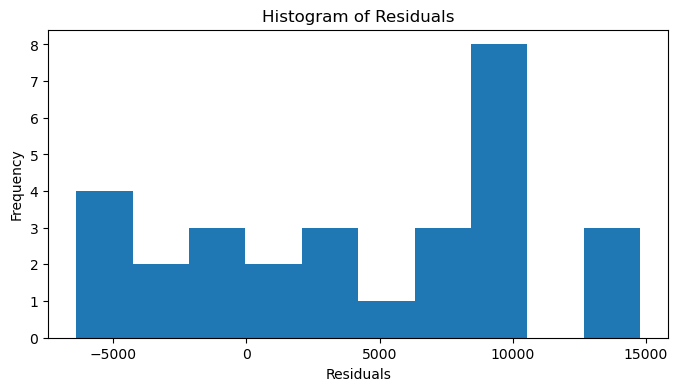

<Figure size 800x400 with 0 Axes>

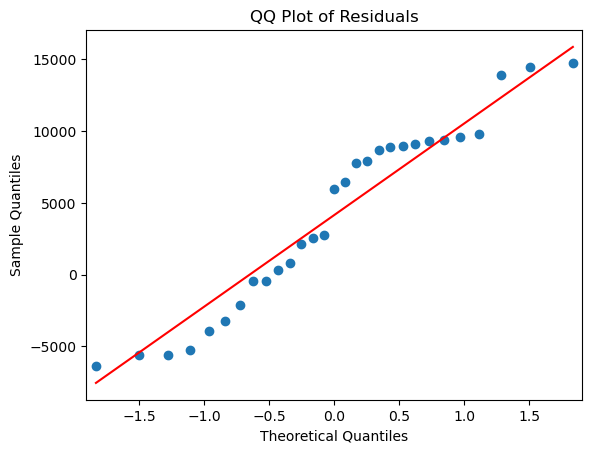

In [202]:
residuals = test_df['predicted_value']-test_df['original_value']
residual_plot(residuals, 'exogenour_walk_forward_linear_regression prediction')

In [203]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.12880123356771322
kurtosis of residuals: -1.1904664009828252
J_B of residuals: 1.7926462168897714
JB_p_value: 0.40806732397624557


regression models with current exgeneous features were evaluated with three different validation methods, for train/test split, MAPE value for test dataset is 0.066, for train/test k fold validation, the average MAPE increase to 1.01, with train/test one step forward validation, the averaged MAPE is 0.066
Also, with train/test split and one step walk forward cross validation, the MAPE for training dataset is not significantly different from test dataset
The variance of MAPE for different batch of training/test dataset with k-fold cross validation is much higher than one-step walk forward vadition, since the training set in k fold has larger dataset, and it predicts multiple steps ahead, these all could cause high variance with k-fold validation method
whereas, one-step validation show high variance in training dataset but not in test dataset, this happens probably due to high colinearity of the features
maybe one-step forward validation method is more reliable validation scheme to use.

##### 4.6.3.2.4 Hyperparameter search using GridSearchCV<a id='4.6.3.2.4_Hyperparameter_search_using_GridSearchCV'></a>

In [204]:
pipe_feature = make_pipeline(
    SelectKBest(f_regression),
    LinearRegression()
)

In [205]:
df=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [206]:
df_dummy=dummy_df(df)

In [207]:
df_dummy.columns = df_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [208]:
exogenous_feature

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Holiday name Birthday of Martin Luther King  Jr ',
 'Holiday name Christmas Day',
 'Holiday name Columbus Day',
 'Holiday name Independence Day',
 'Holiday name Labor Day',
 'Holiday name Memorial Day',
 'Holiday name New Year s Day',
 'Holiday name Superbowl',
 'Holiday name Thanksgiving Day',
 'Holiday name Veterans Day',
 'Holiday name Washington s Birthday',
 'Holiday name non Holiday']

In [209]:
df_dummy.columns

Index(['Store', 'Temperature', 'Fuel Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'MarkDown Tot',
       'Holiday name Birthday of Martin Luther King  Jr ',
       'Holiday name Christmas Day', 'Holiday name Columbus Day',
       'Holiday name Independence Day', 'Holiday name Labor Day',
       'Holiday name Memorial Day', 'Holiday name New Year s Day',
       'Holiday name Superbowl', 'Holiday name Thanksgiving Day',
       'Holiday name Veterans Day', 'Holiday name Washington s Birthday',
       'Holiday name non Holiday'],
      dtype='object')

In [210]:
feature_list=exogenous_feature
split=int(len(df_dummy) * 0.8) 
train=df_dummy.iloc[:split]
test=df_dummy.iloc[split:]
X_train=train[feature_list]
y_train=train['Weekly Sales']
X_test=test[feature_list]
y_test=test['Weekly Sales']

In [211]:
#hypoparameter using gridsearch
k = [k+1 for k in range(len(exogenous_feature))]
grid_params = {'selectkbest__k': k}
grid_params

{'selectkbest__k': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21]}

In [212]:
# Define the time series cross-validator (rolling window)
tscv = TimeSeriesSplit(n_splits=5)


# Create the GridSearchCV object
grid_search = GridSearchCV(pipe_feature, param_grid=grid_params, cv=tscv, scoring='neg_mean_absolute_percentage_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'selectkbest__k': 3}
Best Score: 0.09306114637260224


In [213]:
score_mean = grid_search.cv_results_['mean_test_score']
score_std = grid_search.cv_results_['std_test_score']
cv_k = [k for k in grid_search.cv_results_['param_selectkbest__k']]

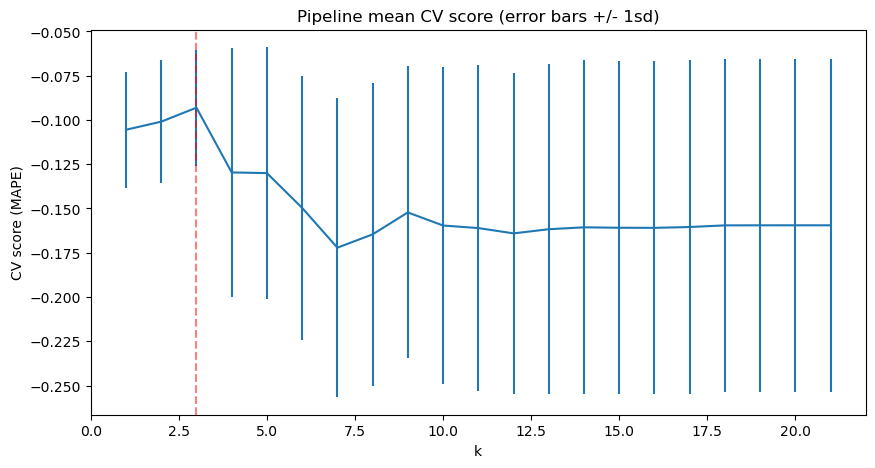

In [214]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = grid_search.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (MAPE)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [215]:
selected_feature = grid_search.best_estimator_.named_steps.selectkbest.get_support()

In [216]:
coefs = grid_search.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected_feature]

In [217]:
pd.Series(coefs, index=features).sort_values(ascending=False)

Holiday name Thanksgiving Day    38095.123880
MarkDown3                            0.143707
Temperature                       -373.274234
dtype: float64

In [218]:
best_model = grid_search.best_estimator_

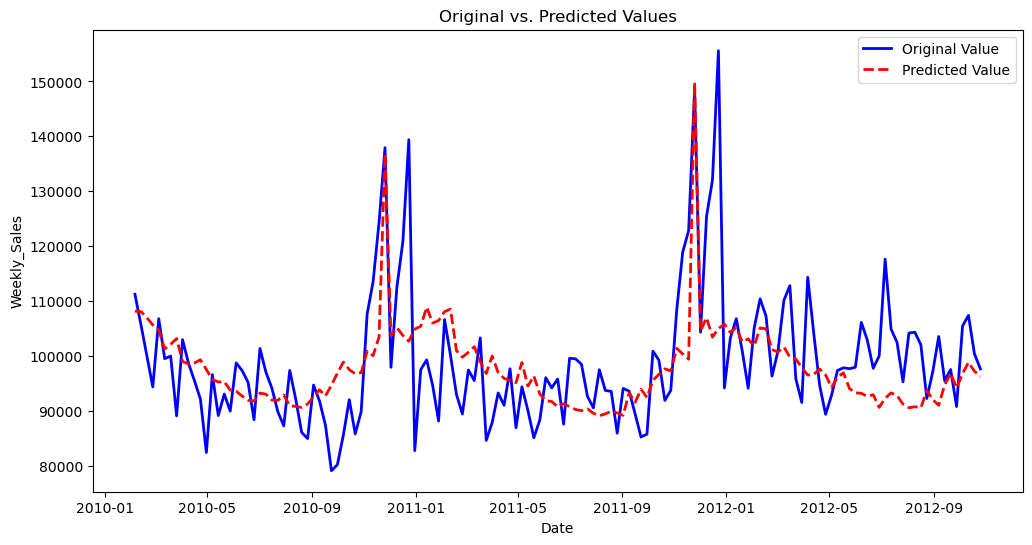

In [219]:
# Fit the best model on the entire training dataset
best_model.fit(X_train, y_train)
y_tr_pred = best_model.predict(X_train)
y_te_pred = best_model.predict(X_test)



results_train = pd.concat([y_train,pd.Series(y_tr_pred,index=y_train.index)],axis=1)
results_train.columns=['original_value','predicted_value']
results_test = pd.concat([y_test,pd.Series(y_te_pred,index=y_test.index)],axis=1)
results_test.columns=['original_value','predicted_value']
results = pd.concat([results_train, results_test])
# Plot the predicted values and original values
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['original_value'], label='Original Value', color='blue', linewidth=2)
plt.plot(results.index, results['predicted_value'], label='Predicted Value', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Original vs. Predicted Values')
plt.legend()
plt.show()

In [220]:
mae_train = mean_absolute_error(results_train['original_value'], results_train['predicted_value'])
mae_test = mean_absolute_error(results_test['original_value'], results_test['predicted_value'])

mape_train = mean_absolute_percentage_error(results_train['original_value'], results_train['predicted_value'])
mape_test = mean_absolute_percentage_error(results_test['original_value'], results_test['predicted_value'])

R2=r2_score(results_test['original_value'], results_test['predicted_value'])

print(f'R2 of test:{R2}\n'
      f'mape of train: {mape_train}\n' 
      f'mape of test: {mape_test}')

R2 of test:-1.3623433405578096
mape of train: 0.07412516984036857
mape of test: 0.06751703268154277


Based on gridsearch for exgeneous features, the top 3 features are thanksgiving, MarkDown3 and Temperature. MAPE score for test dataset is 0.067

#### 4.6.3.3 Regression Model with lagged  Exogenous Values <a id='4.6.3.3_Regression_Model_with_lagged_Exogenous_Values'></a>

In [221]:
#reset the dataframe
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]
ts_s6_d92_dummy=dummy_df(df_model)
ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [222]:
added_features=['Temperature', 'Fuel Price', 'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

In [223]:
#create lagged numeric features
added_features.append('Weekly Sales')
df_transform=create_lagged_features(ts_s6_d92_dummy,added_features,5)

#find all the lagged features
lagged_features=[col for col in df_transform.columns if 'lag_' in col]

In [224]:
lagged_features

['Temperature_lag_1',
 'Temperature_lag_2',
 'Temperature_lag_3',
 'Temperature_lag_4',
 'Temperature_lag_5',
 'Fuel Price_lag_1',
 'Fuel Price_lag_2',
 'Fuel Price_lag_3',
 'Fuel Price_lag_4',
 'Fuel Price_lag_5',
 'MarkDown1_lag_1',
 'MarkDown1_lag_2',
 'MarkDown1_lag_3',
 'MarkDown1_lag_4',
 'MarkDown1_lag_5',
 'MarkDown2_lag_1',
 'MarkDown2_lag_2',
 'MarkDown2_lag_3',
 'MarkDown2_lag_4',
 'MarkDown2_lag_5',
 'MarkDown3_lag_1',
 'MarkDown3_lag_2',
 'MarkDown3_lag_3',
 'MarkDown3_lag_4',
 'MarkDown3_lag_5',
 'MarkDown4_lag_1',
 'MarkDown4_lag_2',
 'MarkDown4_lag_3',
 'MarkDown4_lag_4',
 'MarkDown4_lag_5',
 'MarkDown5_lag_1',
 'MarkDown5_lag_2',
 'MarkDown5_lag_3',
 'MarkDown5_lag_4',
 'MarkDown5_lag_5',
 'CPI_lag_1',
 'CPI_lag_2',
 'CPI_lag_3',
 'CPI_lag_4',
 'CPI_lag_5',
 'Unemployment_lag_1',
 'Unemployment_lag_2',
 'Unemployment_lag_3',
 'Unemployment_lag_4',
 'Unemployment_lag_5',
 'Weekly Sales_lag_1',
 'Weekly Sales_lag_2',
 'Weekly Sales_lag_3',
 'Weekly Sales_lag_4',
 'Weekly

In [225]:
#set col to scale
added_features.remove('Weekly Sales')

In [226]:
added_features

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [227]:
col_to_scale=added_features+lagged_features

In [228]:
col_to_scale

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Temperature_lag_1',
 'Temperature_lag_2',
 'Temperature_lag_3',
 'Temperature_lag_4',
 'Temperature_lag_5',
 'Fuel Price_lag_1',
 'Fuel Price_lag_2',
 'Fuel Price_lag_3',
 'Fuel Price_lag_4',
 'Fuel Price_lag_5',
 'MarkDown1_lag_1',
 'MarkDown1_lag_2',
 'MarkDown1_lag_3',
 'MarkDown1_lag_4',
 'MarkDown1_lag_5',
 'MarkDown2_lag_1',
 'MarkDown2_lag_2',
 'MarkDown2_lag_3',
 'MarkDown2_lag_4',
 'MarkDown2_lag_5',
 'MarkDown3_lag_1',
 'MarkDown3_lag_2',
 'MarkDown3_lag_3',
 'MarkDown3_lag_4',
 'MarkDown3_lag_5',
 'MarkDown4_lag_1',
 'MarkDown4_lag_2',
 'MarkDown4_lag_3',
 'MarkDown4_lag_4',
 'MarkDown4_lag_5',
 'MarkDown5_lag_1',
 'MarkDown5_lag_2',
 'MarkDown5_lag_3',
 'MarkDown5_lag_4',
 'MarkDown5_lag_5',
 'CPI_lag_1',
 'CPI_lag_2',
 'CPI_lag_3',
 'CPI_lag_4',
 'CPI_lag_5',
 'Unemployment_lag_1',
 'Unemployment_lag_2',
 'Unemployment_lag_3',
 'Unemployment_lag_4

In [229]:
#combine lagged features with exgenous features for  model fit
feature_list=lagged_features+exogenous_feature

In [230]:
feature_list

['Temperature_lag_1',
 'Temperature_lag_2',
 'Temperature_lag_3',
 'Temperature_lag_4',
 'Temperature_lag_5',
 'Fuel Price_lag_1',
 'Fuel Price_lag_2',
 'Fuel Price_lag_3',
 'Fuel Price_lag_4',
 'Fuel Price_lag_5',
 'MarkDown1_lag_1',
 'MarkDown1_lag_2',
 'MarkDown1_lag_3',
 'MarkDown1_lag_4',
 'MarkDown1_lag_5',
 'MarkDown2_lag_1',
 'MarkDown2_lag_2',
 'MarkDown2_lag_3',
 'MarkDown2_lag_4',
 'MarkDown2_lag_5',
 'MarkDown3_lag_1',
 'MarkDown3_lag_2',
 'MarkDown3_lag_3',
 'MarkDown3_lag_4',
 'MarkDown3_lag_5',
 'MarkDown4_lag_1',
 'MarkDown4_lag_2',
 'MarkDown4_lag_3',
 'MarkDown4_lag_4',
 'MarkDown4_lag_5',
 'MarkDown5_lag_1',
 'MarkDown5_lag_2',
 'MarkDown5_lag_3',
 'MarkDown5_lag_4',
 'MarkDown5_lag_5',
 'CPI_lag_1',
 'CPI_lag_2',
 'CPI_lag_3',
 'CPI_lag_4',
 'CPI_lag_5',
 'Unemployment_lag_1',
 'Unemployment_lag_2',
 'Unemployment_lag_3',
 'Unemployment_lag_4',
 'Unemployment_lag_5',
 'Weekly Sales_lag_1',
 'Weekly Sales_lag_2',
 'Weekly Sales_lag_3',
 'Weekly Sales_lag_4',
 'Weekly

In [231]:
scaler=MinMaxScaler()
df_transform[col_to_scale] = scaler.fit_transform(df_transform[col_to_scale])

In [232]:
X_train,y_train,X_test, y_test, model_fit=exogenous_OSL_regression_model(df_transform,feature_list,0.8)

In [233]:
r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)

In [234]:
print("R² list: ",[f"{i:.4f}" for i in r2_list])
print("MAE list: ",[f"{i:.4f}" for i in MAE_list])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE_list])

R² list:  ['0.6129', '-0.7565']
MAE list:  ['5956.2355', '6513.4314']
MAPE list:  ['0.0604', '0.0671']


In [235]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     7.047
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           3.06e-11
Time:                        17:21:38   Log-Likelihood:                -1149.6
No. Observations:                 110   AIC:                             2341.
Df Residuals:                      89   BIC:                             2398.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             8.353e+04   1.47e+04      5.675      0.000    5.43e+04    1.13e+05
Temperature                                      -1.938e+04   4329.999     -4.475      0.000    -2.8e+04   -1.08e+04
Fuel Price                                       -1.741e+04   5870.324     -2.966      0.004   -2.91e+04   -5746.859
MarkDown1                                          238.9551    2.6e+04      0.009      0.993   -5.13e+04    5.18e+04
MarkDown2                                        -5.672e+04   1.28e+04     -4.420      0.000   -8.22e+04   -3.12e+04
MarkDown3                                        -2058.1299   1.35e+04     -0.152      0.879   -2.89e+04    2.48e+04
MarkDown4                                        -6544.9413   2.58e+04     -0.253      0.801   -5.79e+04    4.48e+04
MarkDown5                                         3587.6148   1.05e+04      0.343      0.733   -1.72e+04    2.44e+04
CPI                                               4.702e+04   1.45e+04      3.237      0.002    1.82e+04    7.59e+04
Unemployment                                      2.308e+04   1.79e+04      1.291      0.200   -1.24e+04    5.86e+04
Holiday name Birthday of Martin Luther King  Jr  -7517.1270   6451.174     -1.165      0.247   -2.03e+04    5301.218
Holiday name Christmas Day                        3.607e+04   8551.960      4.218      0.000    1.91e+04    5.31e+04
Holiday name Columbus Day                        -3281.5713   6592.341     -0.498      0.620   -1.64e+04    9817.269
Holiday name Independence Day                     8425.6627   6639.806      1.269      0.208   -4767.490    2.16e+04
Holiday name Labor Day                            -801.6900   6686.141     -0.120      0.905   -1.41e+04    1.25e+04
Holiday name Memorial Day                         7909.9085   6622.932      1.194      0.236   -5249.717    2.11e+04
Holiday name New Year s Day                      -2939.7192   6590.435     -0.446      0.657    -1.6e+04    1.02e+04
Holiday name Superbowl                           -1698.0616   6669.807     -0.255      0.800    -1.5e+04    1.16e+04
Holiday name Thanksgiving Day                     4.126e+04   8900.195      4.636      0.000    2.36e+04    5.89e+04
Holiday name Veterans Day                         1.365e+04   7101.588      1.923      0.058    -457.264    2.78e+04
Holiday name Washington s Birthday               -8178.5328   6579.917     -1.243      0.217   -2.13e+04    4895.623
Holiday name non Holiday                           630.1598   2543.338      0.248      0.805   -4423.398    5683.717
==============================================================================
Omnibus:                       16.278   Durbin-Watson:                   1.628


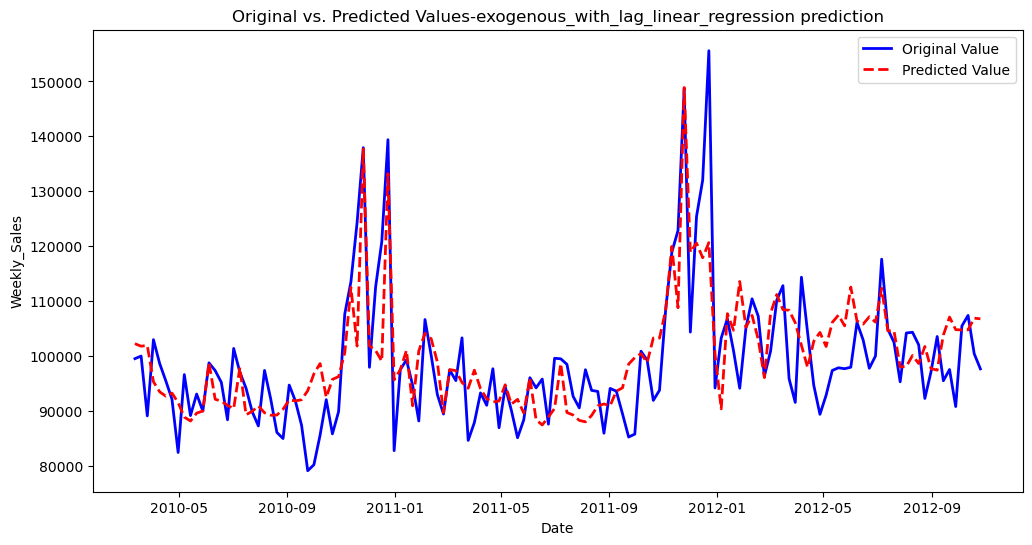

In [236]:
origin_predition_comparison(results,'exogenous_with_lag_linear_regression prediction')

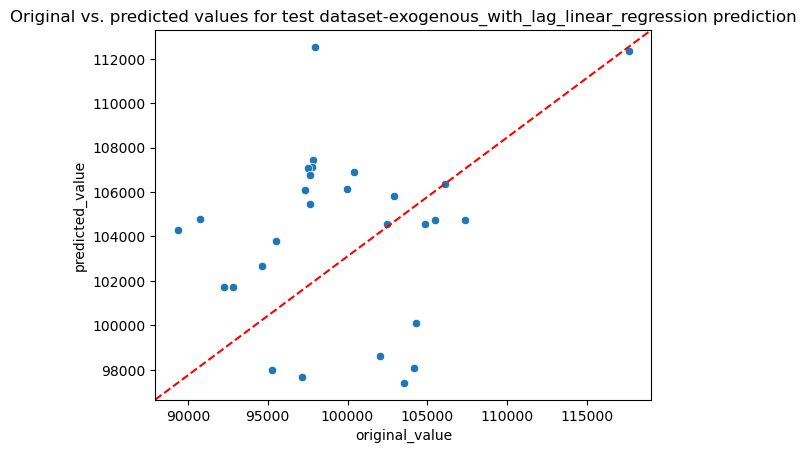

In [237]:
pred_vs_orig(test_results,'exogenous_with_lag_linear_regression prediction')

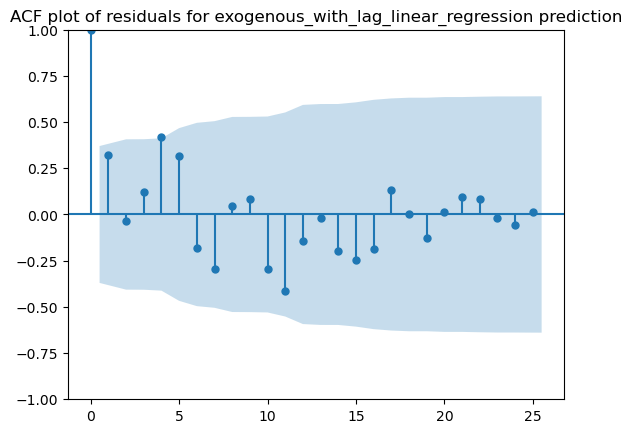

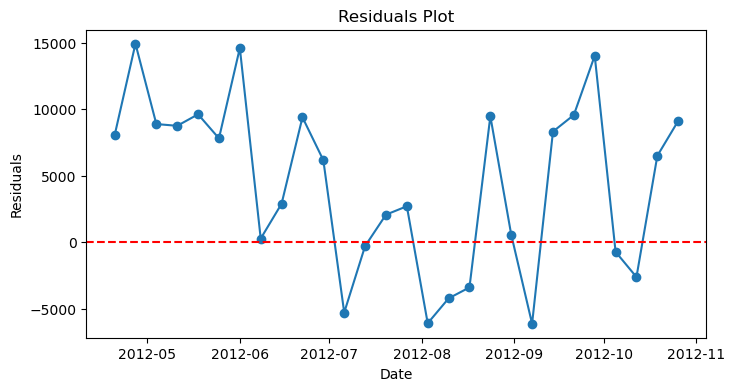

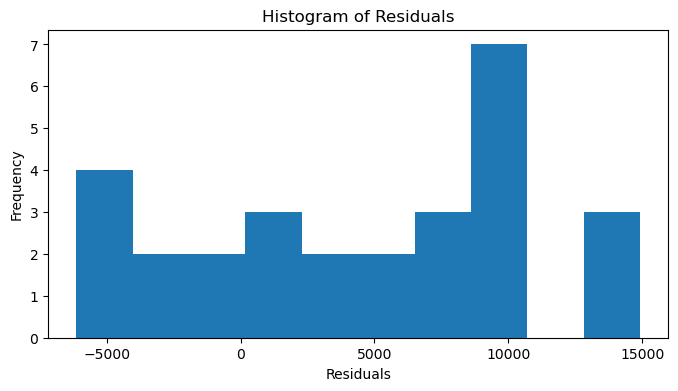

<Figure size 800x400 with 0 Axes>

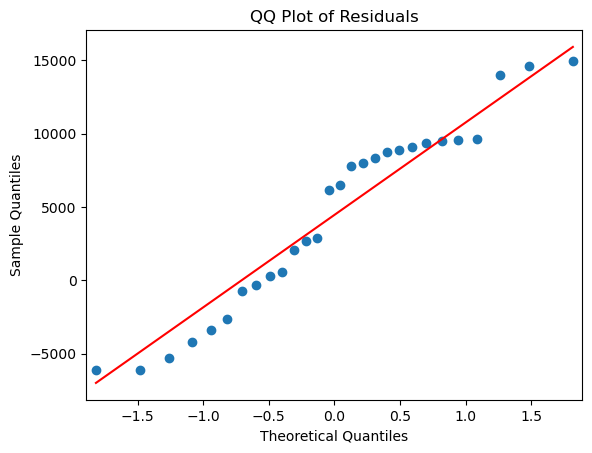

In [238]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'exogenous_with_lag_linear_regression prediction')

In [239]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: -0.1702472083504951
kurtosis of residuals: -1.1135135624539865
J_B of residuals: 1.581823718502435
JB_p_value: 0.4534311413329134


##### 4.6.3.4 Hyperparameter search using GridSearchCV for all exgeneous and lagged features<a id='4.6.3.4_Hyperparameter_search_using_GridSearchCV_for_all_exgeneous_and_lagged_features'></a>

In [240]:
df_transform

Store  Temperature  Fuel Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-03-12      6     0.385195    0.076006   0.000000   0.000000   0.000000   
2010-03-19      6     0.342437    0.115499   0.000000   0.000000   0.000000   
2010-03-26      6     0.289508    0.124441   0.000000   0.000000   0.000000   
2010-04-02      6     0.500471    0.114754   0.000000   0.000000   0.000000   
2010-04-09      6     0.523262    0.152757   0.000000   0.000000   0.000000   
...           ...          ...         ...        ...        ...        ...   
2012-09-28      6     0.743078    0.820417   0.113480   0.000092   0.000020   
2012-10-05      6     0.611603    0.783905   0.262239   0.000000   0.000492   
2012-10-12      6     0.509701    0.771982   0.051708   0.000000   0.000166   
2012-10-19      6     0.589753    0.766766   0.040068   0.000000   0.000037   
2012-10-26      6     0.639857    0.701192   0.185289   0.000640   0.000000   

            MarkDown4  MarkDown5       CPI  Unemployment  ...  \
Date                                                      ...   
2010-03-12   0.000000   0.000000  0.080258      1.000000  ...   
2010-03-19   0.000000   0.000000  0.067517      1.000000  ...   
2010-03-26   0.000000   0.000000  0.052286      1.000000  ...   
2010-04-02   0.000000   0.000000  0.037055      0.913472  ...   
2010-04-09   0.000000   0.000000  0.021823      0.913472  ...   
...               ...        ...       ...           ...  ...   
2012-09-28   0.069246   0.089758  0.964794      0.175648  ...   
2012-10-05   0.131918   0.217847  0.980009      0.000000  ...   
2012-10-12   0.019841   0.319254  0.995225      0.000000  ...   
2012-10-19   0.001111   0.149622  0.998599      0.000000  ...   
2012-10-26   0.011321   0.068980  1.000000      0.000000  ...   

           Unemployment_lag_1  Unemployment_lag_2  Unemployment_lag_3  \
Date                                                                    
2010-03-12           1.000000            1.000000            1.000000   
2010-03-19           1.000000            1.000000            1.000000   
2010-03-26           1.000000            1.000000            1.000000   
2010-04-02           1.000000            1.000000            1.000000   
2010-04-09           0.913472            1.000000            1.000000   
...                       ...                 ...                 ...   
2012-09-28           0.175648            0.175648            0.175648   
2012-10-05           0.175648            0.175648            0.175648   
2012-10-12           0.000000            0.175648            0.175648   
2012-10-19           0.000000            0.000000            0.175648   
2012-10-26           0.000000            0.000000            0.000000   

           Unemployment_lag_4  Unemployment_lag_5  Weekly Sales_lag_1  \
Date                                                                    
2010-03-12                1.0                 1.0            0.361903   
2010-03-19                1.0                 1.0            0.266800   
2010-03-26                1.0                 1.0            0.272980   
2010-04-02                1.0                 1.0            0.130606   
2010-04-09                1.0                 1.0            0.312056   
...                       ...                 ...                 ...   
2012-09-28                0.0                 0.0            0.240919   
2012-10-05                0.0                 0.0            0.152755   
2012-10-12                0.0                 0.0            0.344590   
2012-10-19                0.0                 0.0            0.369801   
2012-10-26                0.0                 0.0            0.278368   

            Weekly Sales_lag_2  Weekly Sales_lag_3  Weekly Sales_lag_4  \
Date                                                                     
2010-03-12            0.199428            0.274439            0.348133   
2010-03-19      

In [241]:
#hypoparameter using gridsearch
k = [k+1 for k in range(len(feature_list))]
grid_params = {'selectkbest__k': k}


In [242]:
split=int(len(df_dummy) * 0.8) 
train=df_transform.iloc[:split]
test=df_transform.iloc[split:]
X_train=train[feature_list]
y_train=train['Weekly Sales']
X_test=test[feature_list]
y_test=test['Weekly Sales']

In [243]:
# Create the GridSearchCV object
grid_search = GridSearchCV(pipe_feature, param_grid=grid_params, cv=tscv, scoring='neg_mean_absolute_percentage_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Best Parameters: {'selectkbest__k': 4}
Best Score: 0.14704627733761527


In [244]:
score_mean = grid_search.cv_results_['mean_test_score']
score_std = grid_search.cv_results_['std_test_score']
cv_k = [k for k in grid_search.cv_results_['param_selectkbest__k']]

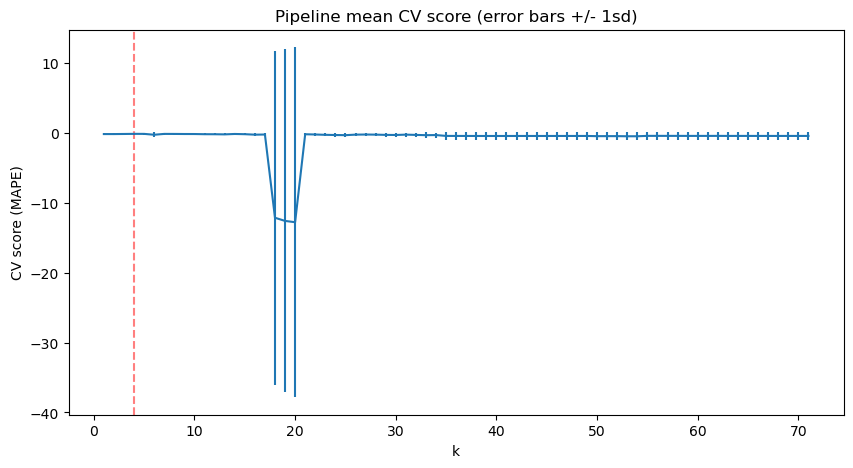

In [245]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = grid_search.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (MAPE)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [246]:
selected_feature = grid_search.best_estimator_.named_steps.selectkbest.get_support()
coefs = grid_search.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected_feature]
pd.Series(coefs, index=features).sort_values(ascending=False)


Holiday name Thanksgiving Day    40523.926430
Weekly Sales_lag_4               28287.428250
MarkDown5_lag_1                  20918.844766
Weekly Sales_lag_1               16994.521945
dtype: float64

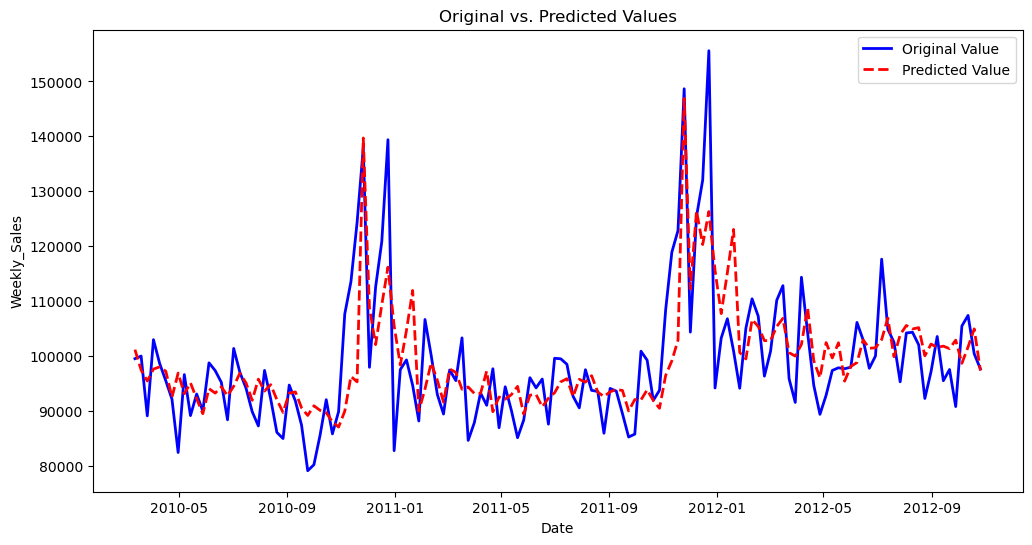

In [247]:
best_model = grid_search.best_estimator_
# Fit the best model on the entire training dataset
best_model.fit(X_train, y_train)
y_tr_pred = best_model.predict(X_train)
y_te_pred = best_model.predict(X_test)



results_train = pd.concat([y_train,pd.Series(y_tr_pred,index=y_train.index)],axis=1)
results_train.columns=['original_value','predicted_value']
results_test = pd.concat([y_test,pd.Series(y_te_pred,index=y_test.index)],axis=1)
results_test.columns=['original_value','predicted_value']
results = pd.concat([results_train, results_test])
# Plot the predicted values and original values
plt.figure(figsize=(12, 6))
plt.plot(results.index, results['original_value'], label='Original Value', color='blue', linewidth=2)
plt.plot(results.index, results['predicted_value'], label='Predicted Value', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Original vs. Predicted Values')
plt.legend()
plt.show()

In [248]:
mae_train = mean_absolute_error(results_train['original_value'], results_train['predicted_value'])
mae_test = mean_absolute_error(results_test['original_value'], results_test['predicted_value'])

mape_train = mean_absolute_percentage_error(results_train['original_value'], results_train['predicted_value'])
mape_test = mean_absolute_percentage_error(results_test['original_value'], results_test['predicted_value'])

R2=r2_score(results_test['original_value'], results_test['predicted_value'])

print(f'R2 of test:{R2}\n'
      f'mape of train: {mape_train}\n' 
      f'mape of test: {mape_test}')

R2 of test:-0.08199914770428651
mape of train: 0.06174758833495445
mape of test: 0.044236029403448875


When include all the lagged features, R2 value is -0.42, MAPE value does not improve much comparing to the previous models. Based on gridsearch for exgeneous and lagged features, the top 3 features are thanksgiving, MarkDown3 and Temperature. MAPE score for test dataset is 0.04

### 4.6.4 Random Forest Model with Exogenous Features <a id='4.6.4_Random_Forest_Model_with_Exogenous_Features'></a>

#### 4.6.4.1 Simple Random Forest<a id='4.6.4.1_Simple_Random_Forest'></a>

In [249]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

ts_s6_d92_dummy=dummy_df(df_model)

ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [250]:
RF_model=RandomForestRegressor(n_estimators=500,max_depth=5,min_samples_split=2, min_samples_leaf=2,bootstrap=False,random_state=42)

In [251]:
def random_forest_regression(df,exogenous_feature,train_size,model):
    feature_list=exogenous_feature
    X=df[feature_list]       
    #train/test split
    split=int(len(df) * train_size) 
    X_train, X_test = X[0:split], X[split:len(df)]

    y_train, y_test=df['Weekly Sales'][0:split],df['Weekly Sales'][split:len(df)]
    
    # fit the model 
    model_fit= model.fit(X_train,y_train)
    return X_train,y_train,X_test, y_test, model_fit

In [252]:
X_train,y_train,X_test, y_test, model_fit=random_forest_regression(ts_s6_d92_dummy,exogenous_feature,0.8,RF_model)

In [253]:
r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)

In [254]:
print("R² list: ",[f"{i:.4f}" for i in r2_list])
print("MAE list: ",[f"{i:.4f}" for i in MAE_list])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE_list])

R² list:  ['0.8381', '-2.1764']
MAE list:  ['4249.8011', '8026.0532']
MAPE list:  ['0.0425', '0.0828']


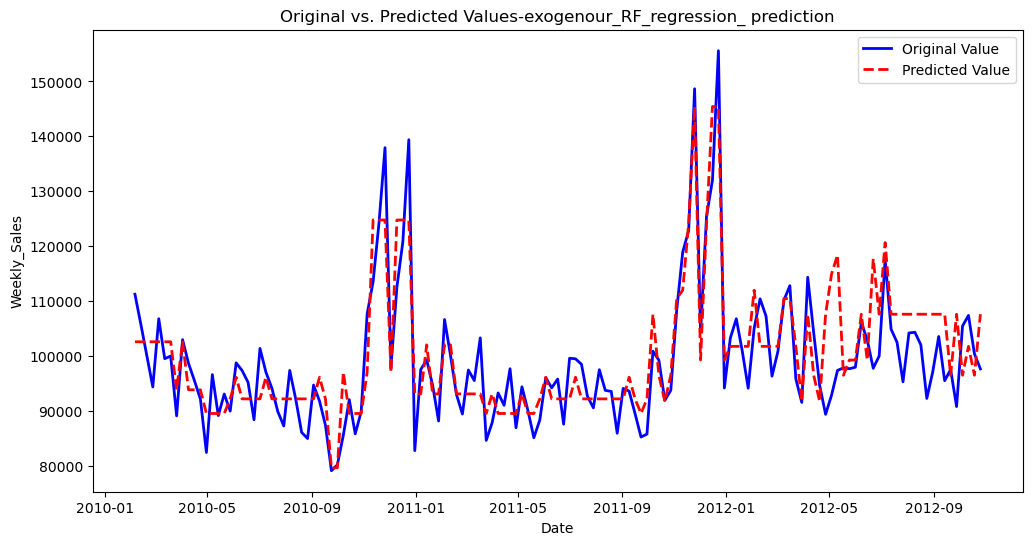

In [255]:
origin_predition_comparison(results,'exogenour_RF_regression_ prediction')

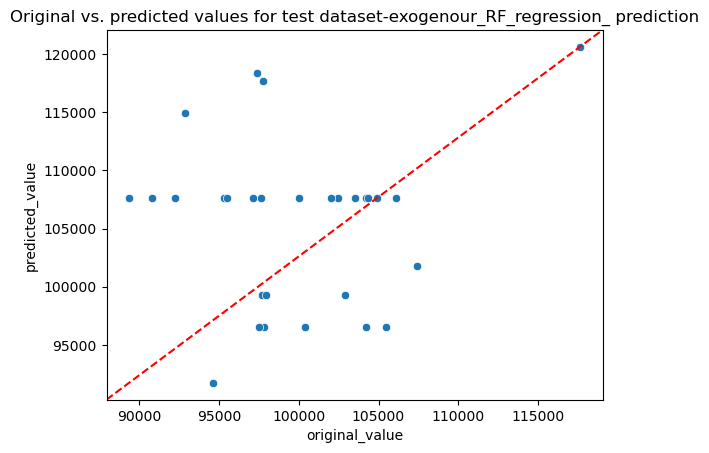

In [256]:
pred_vs_orig(test_results,'exogenour_RF_regression_ prediction')

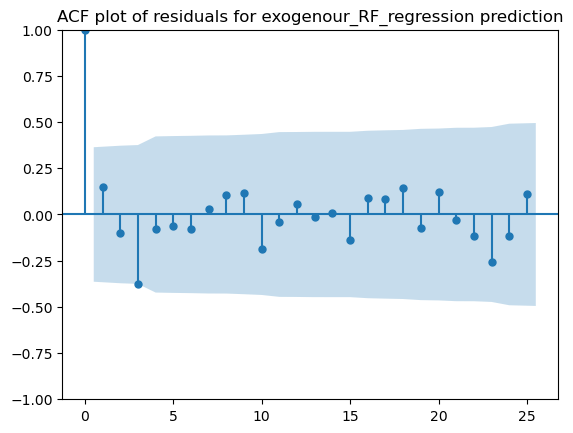

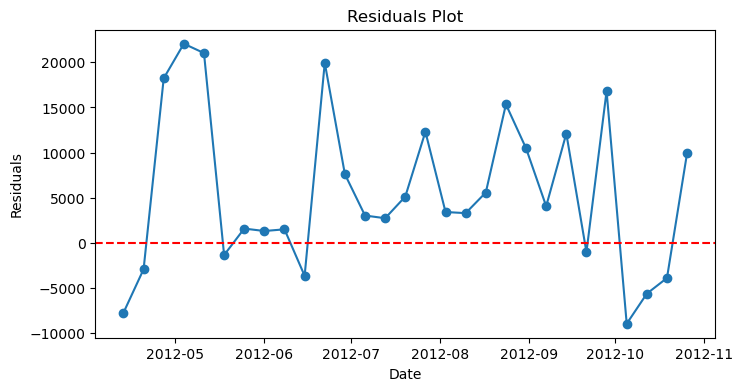

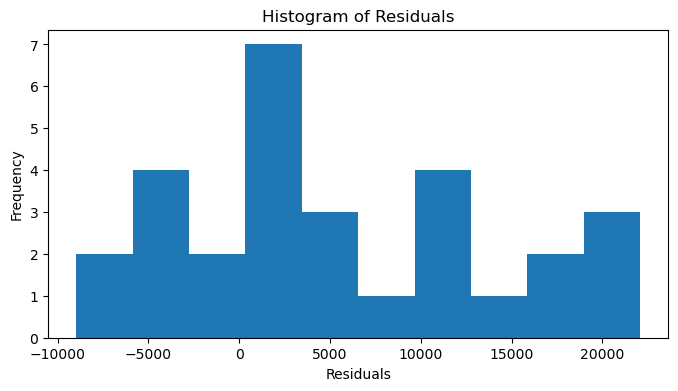

<Figure size 800x400 with 0 Axes>

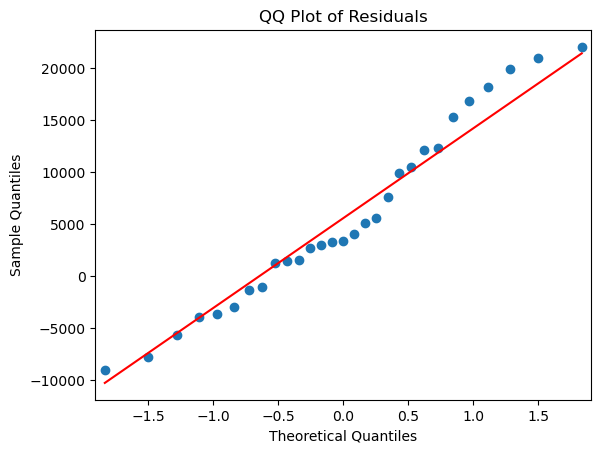

In [257]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'exogenour_RF_regression prediction')

In [258]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: 0.33076047221419225
kurtosis of residuals: -0.8583870923261099
J_B of residuals: 1.4191130185623064
JB_p_value: 0.49186228545594035


In [259]:
def feature_selections(X_train,y_train,RF_model):

# perform feature selection
    rfe = RFE(RF_model)
    fit = rfe.fit(X_train, y_train)
    #return fit.support_, fit.ranking_
    feature_importances = pd.DataFrame({'Feature': X_train.columns.to_list(), 'Importance': fit.ranking_})
    
    # Sort the dataframe based on the feature importances
    feature_importances.sort_values(by='Importance', ascending=True, inplace=True)

# plot feature rank
    plt.figure(figsize=(15, 10))
    
    plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
    plt.xlabel('Importance')
    
    plt.show()

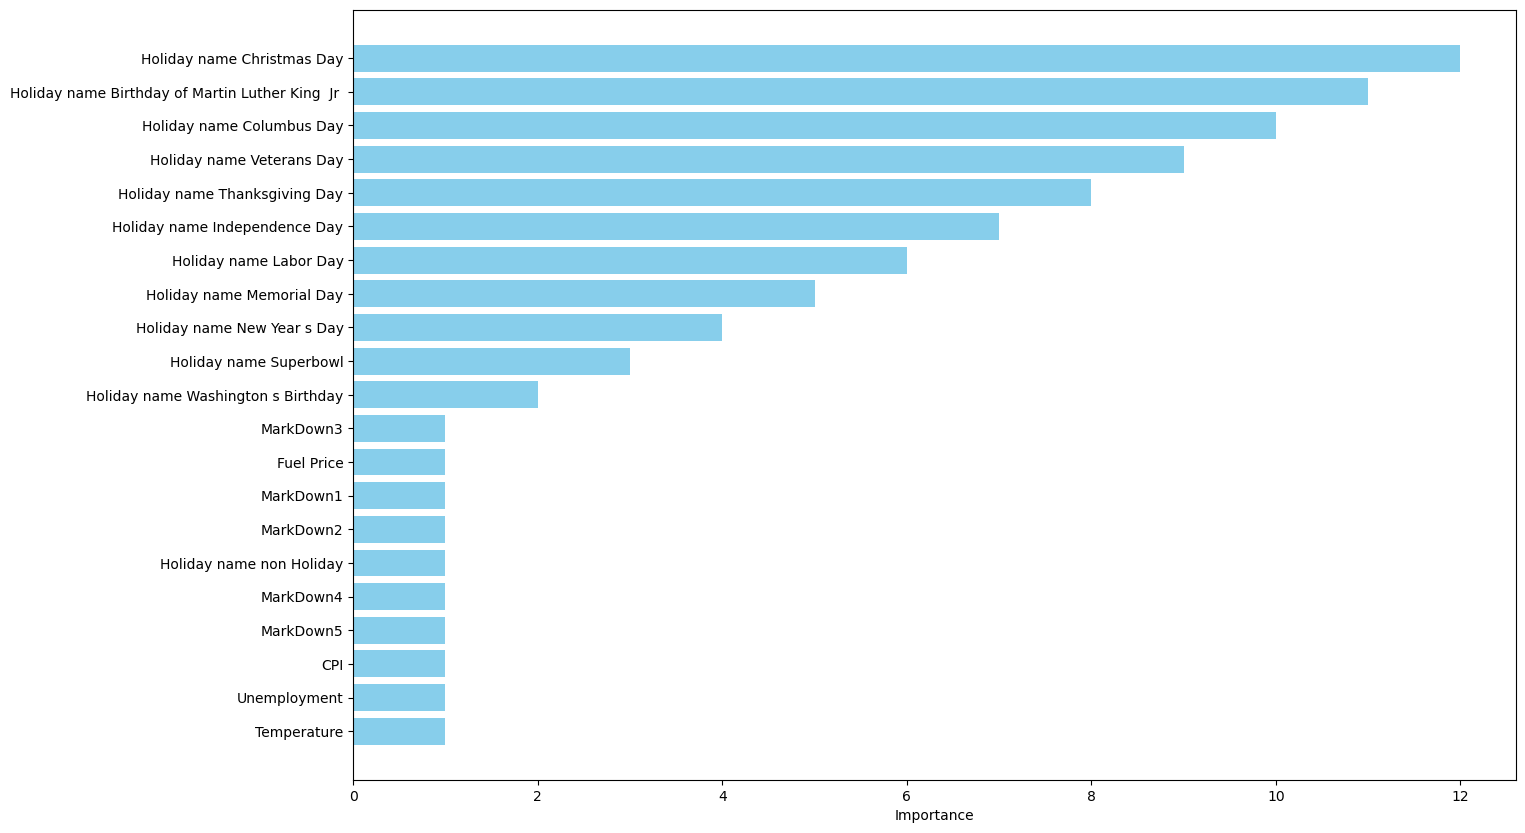

In [260]:
#get top tanking features
feature_selections(X_train,y_train,RF_model)

#### 4.6.4.2 Random Forest Regression with one-step validation <a id='4.6.4.2_Random_Forest_Regression_with_one-step_validation'></a>

In [261]:
walk_forward_train_mape,walk_forward_test_mape,test_df=walk_forward_validation(ts_s6_d92_dummy,exogenous_feature,0.8,RF_model)

In [262]:
average_train_mape=np.mean(walk_forward_train_mape)
average_test_mape=np.mean(walk_forward_test_mape)
std_train_mape=np.std(walk_forward_train_mape)
std_test_mape=np.std(walk_forward_test_mape)

In [263]:
print(f'average_train_mape: {average_train_mape}\n'
      f'average_test_mape: {average_test_mape}\n'
      f'std_train_mape: {std_train_mape}\n'
      f'std_test_mape: {std_test_mape}')

average_train_mape: 0.04246913084601262
average_test_mape: 0.08278327121281671
std_train_mape: 1.3877787807814457e-17
std_test_mape: 0.06972366629364118


In [264]:
r2=r2_score(test_df['original_value'],test_df['predicted_value'])
r2

-2.176442512854739

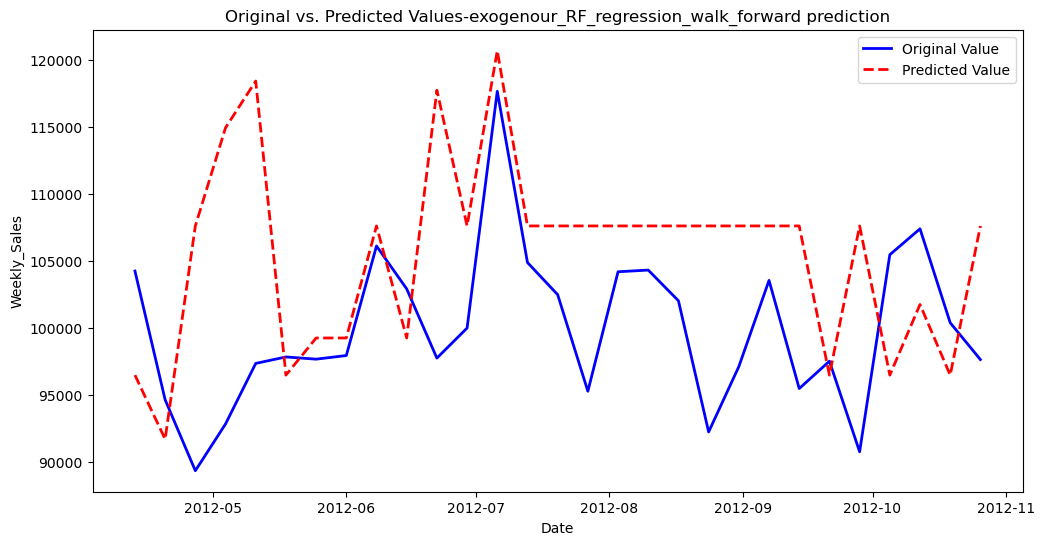

In [265]:
origin_predition_comparison(test_df,'exogenour_RF_regression_walk_forward prediction')

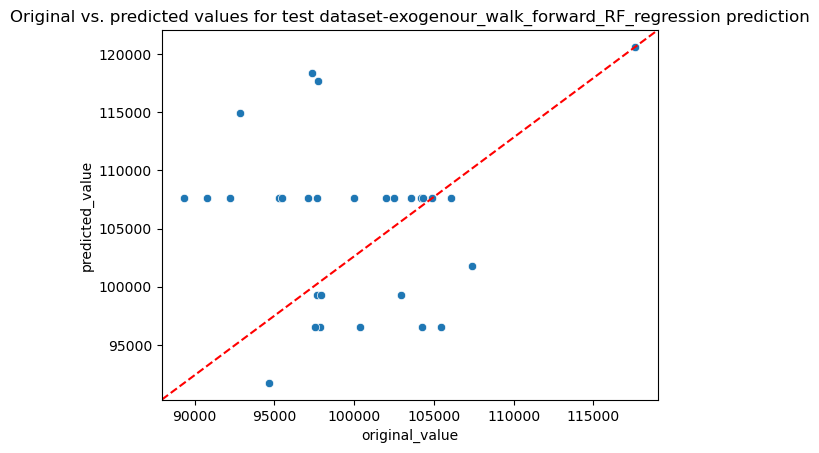

In [266]:
pred_vs_orig(test_df,'exogenour_walk_forward_RF_regression prediction')

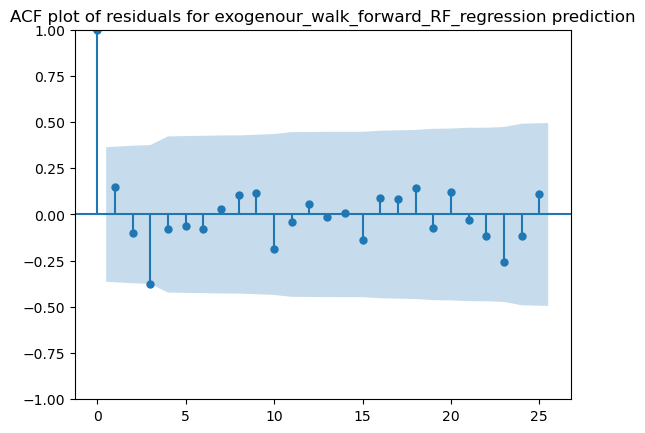

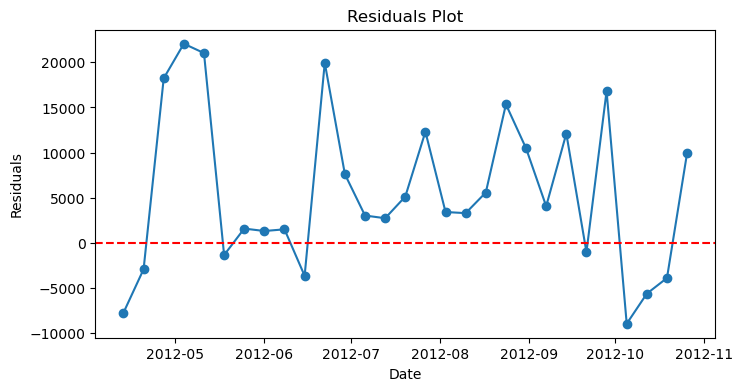

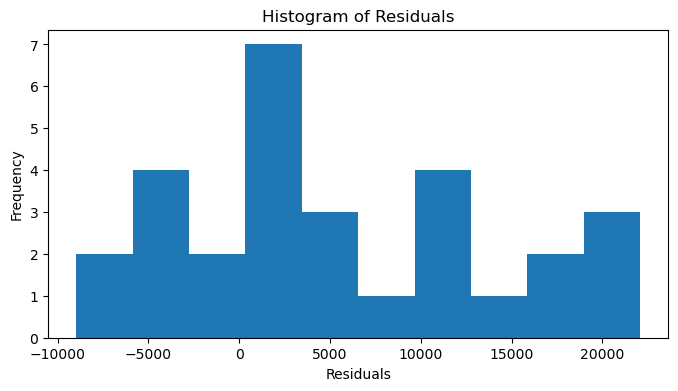

<Figure size 800x400 with 0 Axes>

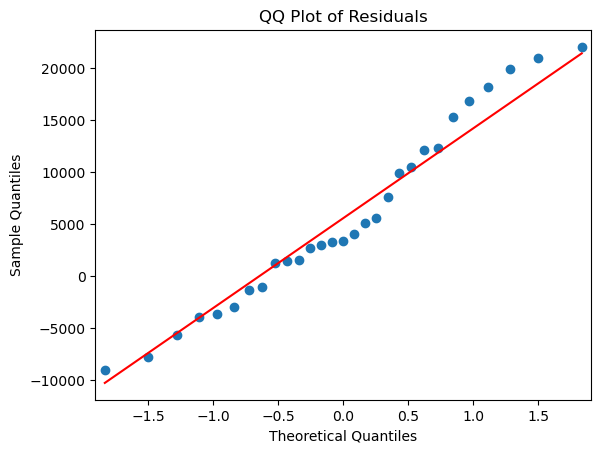

In [267]:
residuals = test_df['predicted_value']-test_df['original_value']
residual_plot(residuals, 'exogenour_walk_forward_RF_regression prediction')

In [268]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: 0.33076047221419225
kurtosis of residuals: -0.8583870923261099
J_B of residuals: 1.4191130185623064
JB_p_value: 0.49186228545594035


based on basic random forest model, top 3 features are christmas, Martin Luther King day and Columbus day, with train/test spli and one-step validation methods, train dataset always give higher MAPE than test dataset indicating overfitting issues, and the model show high variance in training datasets with one step validation, the model probably see more noise than the actual underline pattern. 

#### 4.6.4.3 Random Forest Regression with lagged exogenour values <a id='4.6.4.3_Random_Forest_Regression_with_lagged_exogenour_values'></a>

In [269]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]
ts_s6_d92_dummy=dummy_df(df_model)
ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [270]:
added_features

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [271]:
added_features.append('Weekly Sales')

df_transform=create_lagged_features(ts_s6_d92_dummy,added_features,5)

#find all the lagged features
lagged_features=[col for col in df_transform.columns if 'lag_' in col]

In [272]:
#combine lagged features with exgenour
feature_list=lagged_features+exogenous_feature

In [273]:
X_train,y_train,X_test, y_test, model_fit=random_forest_regression(df_transform,feature_list,0.8,RF_model)

In [274]:
r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)
print("R² list: ",[f"{i:.4f}" for i in r2_list])
print("MAE list: ",[f"{i:.4f}" for i in MAE_list])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE_list])

R² list:  ['0.9087', '-3.7317']
MAE list:  ['3117.9743', '10190.2529']
MAPE list:  ['0.0324', '0.1019']


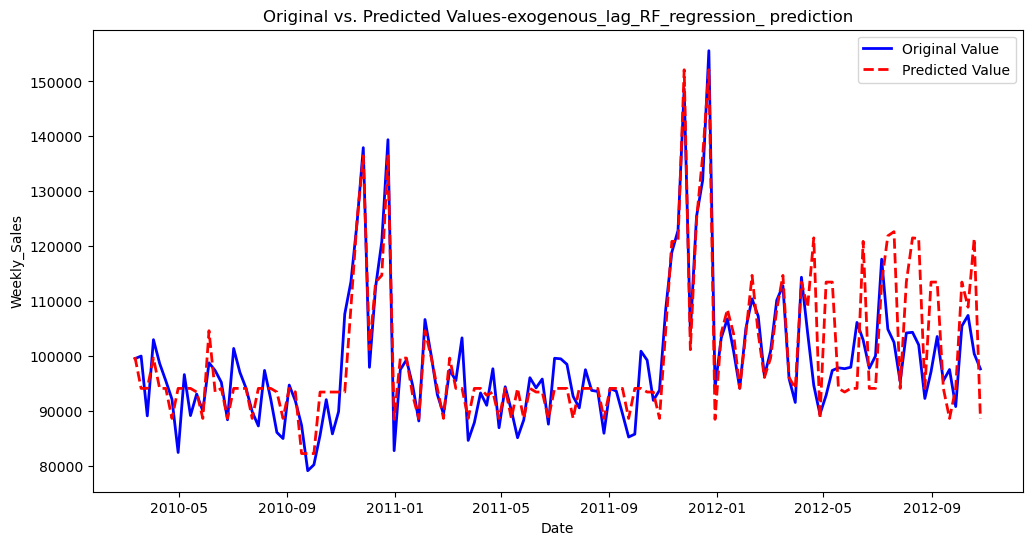

In [275]:
origin_predition_comparison(results,'exogenous_lag_RF_regression_ prediction')

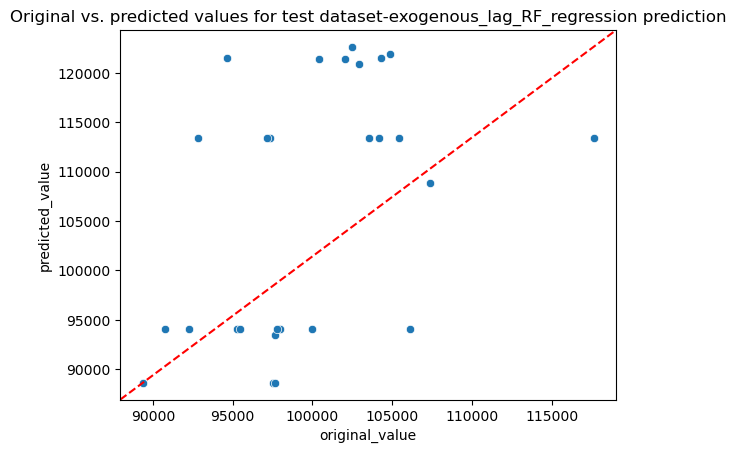

In [276]:
pred_vs_orig(test_results,'exogenous_lag_RF_regression prediction')

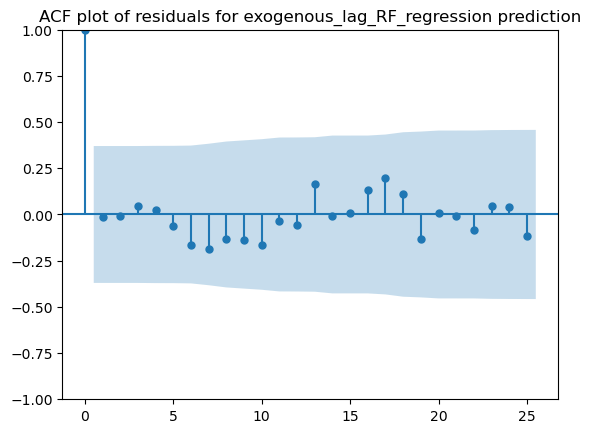

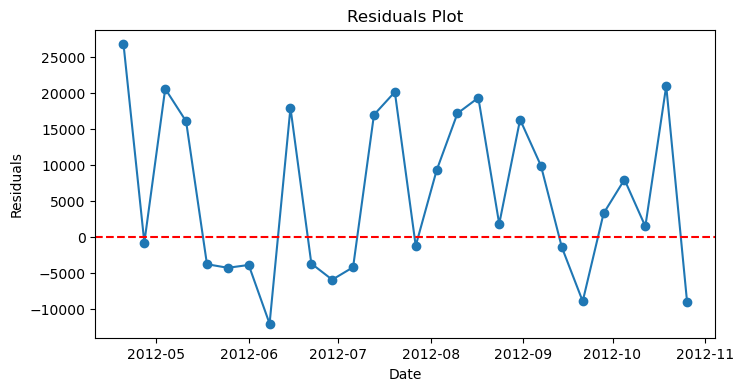

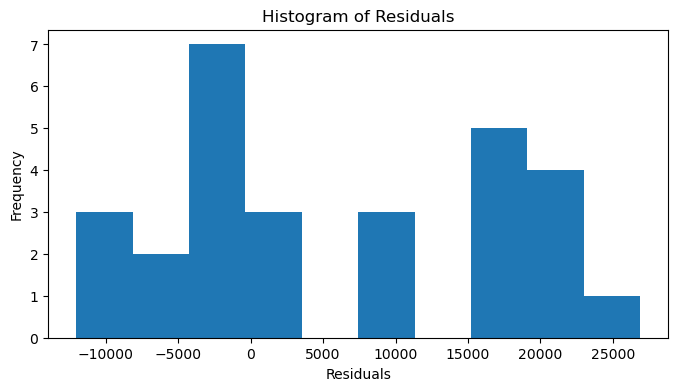

<Figure size 800x400 with 0 Axes>

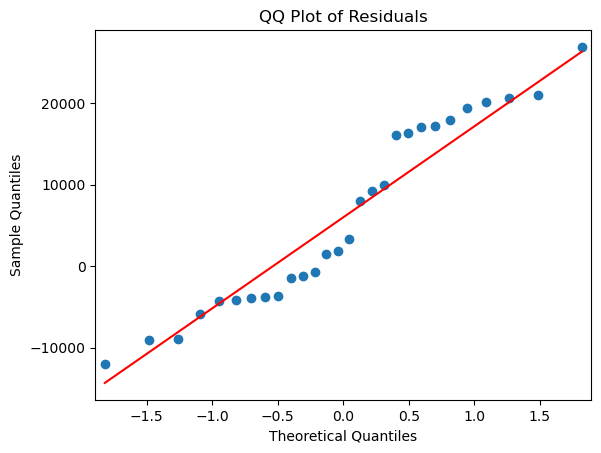

In [277]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'exogenous_lag_RF_regression prediction')

In [278]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: 0.1860726720637302
kurtosis of residuals: -1.353992572799821
J_B of residuals: 2.300419385078294
JB_p_value: 0.3165703799718197


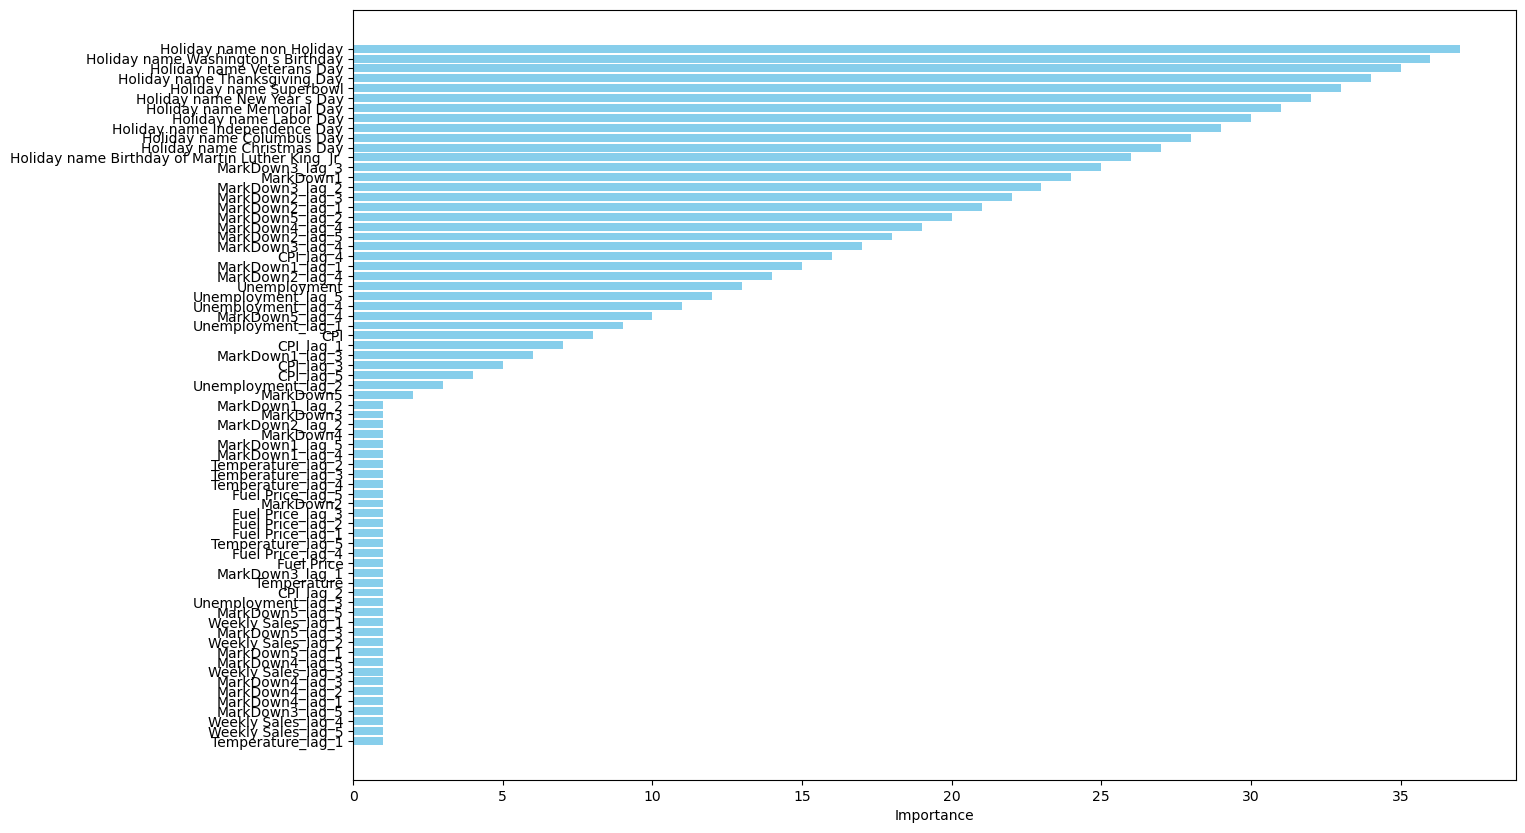

In [279]:
#feature selections top 5 based on random forest model
feature_selections(X_train,y_train,RF_model)

#### 4.6.4.4 Random Forest Regression_exogenous_lag with one-step validation <a id='4.6.4.4_ Random_Forest_Regression_exogenous_lag with_one-step_validation'></a>

In [280]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]
ts_s6_d92_dummy=dummy_df(df_model)
ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')

In [281]:
feature_list

['Temperature_lag_1',
 'Temperature_lag_2',
 'Temperature_lag_3',
 'Temperature_lag_4',
 'Temperature_lag_5',
 'Fuel Price_lag_1',
 'Fuel Price_lag_2',
 'Fuel Price_lag_3',
 'Fuel Price_lag_4',
 'Fuel Price_lag_5',
 'MarkDown1_lag_1',
 'MarkDown1_lag_2',
 'MarkDown1_lag_3',
 'MarkDown1_lag_4',
 'MarkDown1_lag_5',
 'MarkDown2_lag_1',
 'MarkDown2_lag_2',
 'MarkDown2_lag_3',
 'MarkDown2_lag_4',
 'MarkDown2_lag_5',
 'MarkDown3_lag_1',
 'MarkDown3_lag_2',
 'MarkDown3_lag_3',
 'MarkDown3_lag_4',
 'MarkDown3_lag_5',
 'MarkDown4_lag_1',
 'MarkDown4_lag_2',
 'MarkDown4_lag_3',
 'MarkDown4_lag_4',
 'MarkDown4_lag_5',
 'MarkDown5_lag_1',
 'MarkDown5_lag_2',
 'MarkDown5_lag_3',
 'MarkDown5_lag_4',
 'MarkDown5_lag_5',
 'CPI_lag_1',
 'CPI_lag_2',
 'CPI_lag_3',
 'CPI_lag_4',
 'CPI_lag_5',
 'Unemployment_lag_1',
 'Unemployment_lag_2',
 'Unemployment_lag_3',
 'Unemployment_lag_4',
 'Unemployment_lag_5',
 'Weekly Sales_lag_1',
 'Weekly Sales_lag_2',
 'Weekly Sales_lag_3',
 'Weekly Sales_lag_4',
 'Weekly

In [282]:
walk_forward_train_mape,walk_forward_test_mape,test_df=walk_forward_validation(df_transform,feature_list,0.8,RF_model)

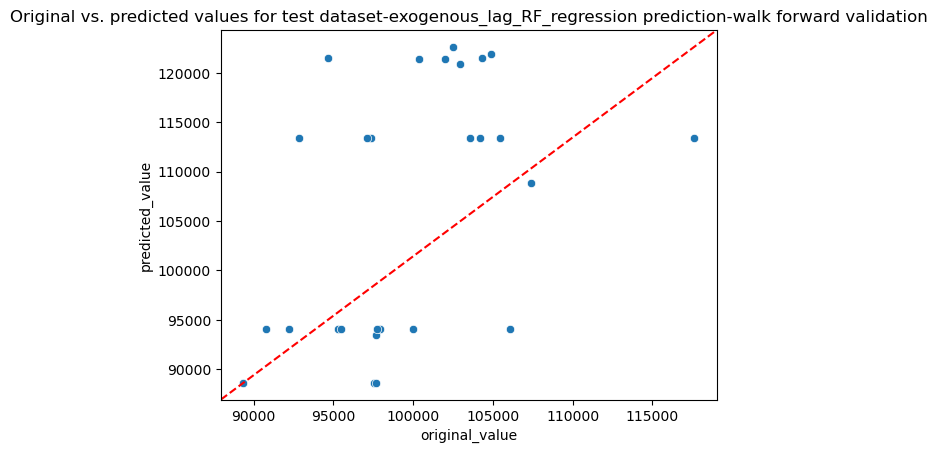

In [283]:
pred_vs_orig(test_df,'exogenous_lag_RF_regression prediction-walk forward validation')

In [284]:
average_train_mape=np.mean(walk_forward_train_mape)
average_test_mape=np.mean(walk_forward_test_mape)
std_train_mape=np.std(walk_forward_train_mape)
std_test_mape=np.std(walk_forward_test_mape)

print(f'average_train_mape: {average_train_mape}\n'
      f'average_test_mape: {average_test_mape}\n'
      f'std_train_mape: {std_train_mape}\n'
      f'std_test_mape: {std_test_mape}')

average_train_mape: 0.032422663199355044
average_test_mape: 0.10190756842103936
std_train_mape: 0.0
std_test_mape: 0.07631252201958362


In [285]:
r2=r2_score(test_df['original_value'],test_df['predicted_value'])
r2

-3.7317375470426786

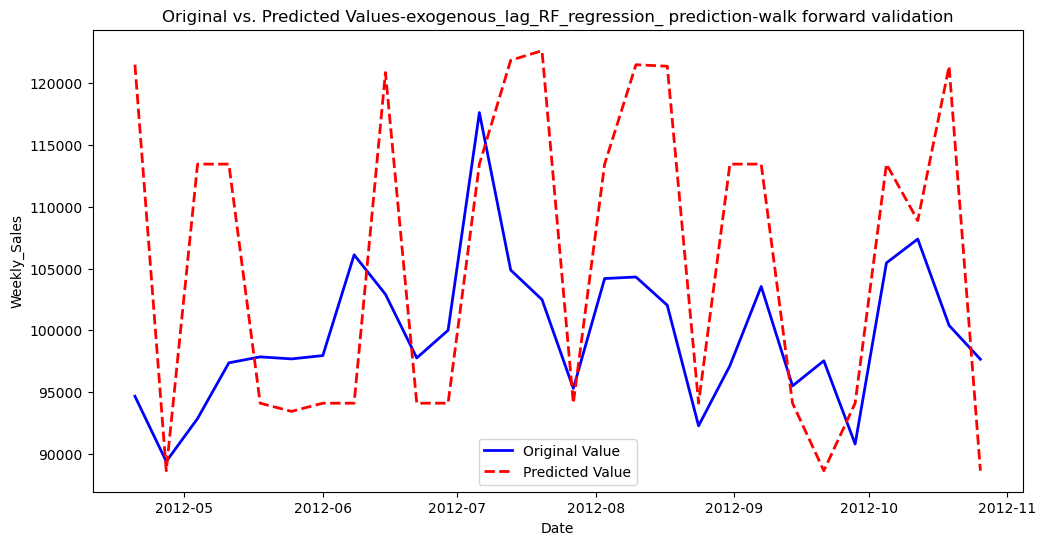

In [286]:
origin_predition_comparison(test_df,'exogenous_lag_RF_regression_ prediction-walk forward validation')

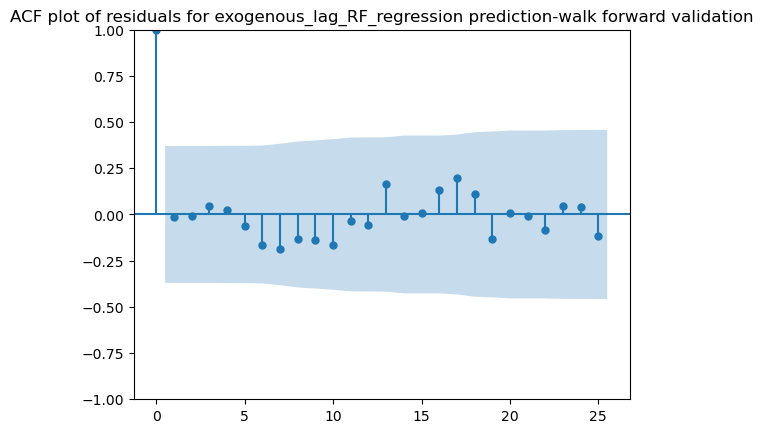

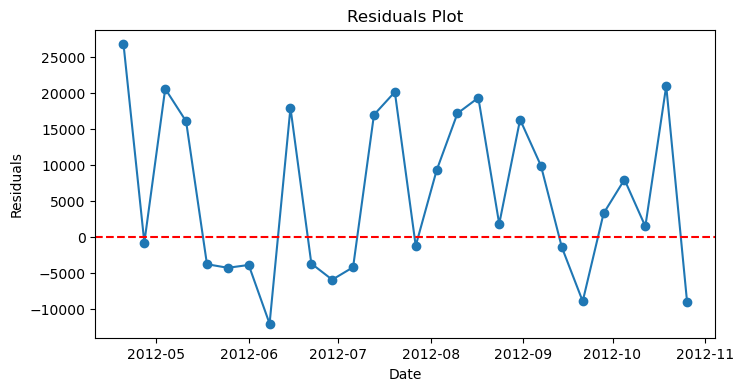

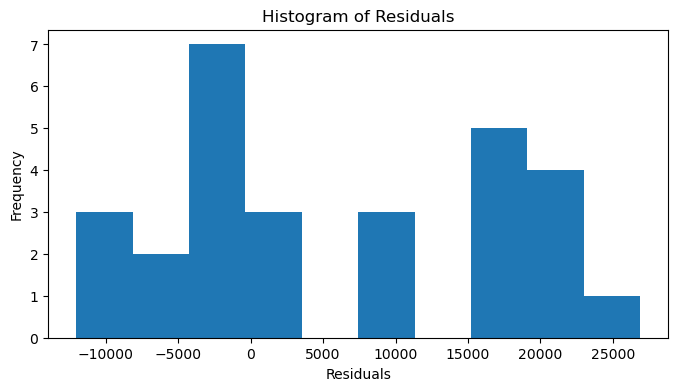

<Figure size 800x400 with 0 Axes>

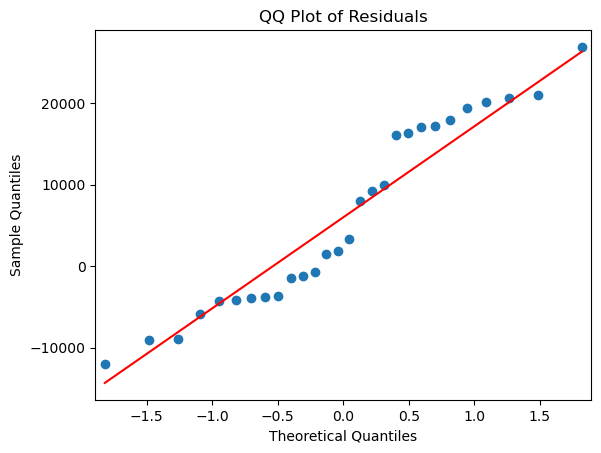

In [287]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'exogenous_lag_RF_regression prediction-walk forward validation')

In [288]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: 0.1860726720637302
kurtosis of residuals: -1.353992572799821
J_B of residuals: 2.300419385078294
JB_p_value: 0.3165703799718197


By introducing lagged exogeneous features,goodness of fitting and MAPE does not improve significantly, but the stability of the model improved as the variances in MAPE for training and test dataset both reduces

## 4.7 Prophet Model <a id='4.7_Prophet_Model'></a>

### 4.7.1 Simple Prophet Model <a id='4.7.1_Simple_Prophet_Model'></a> 

In [289]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [290]:
df_model.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly_Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'Holiday_name', 'MarkDown_Tot'],
      dtype='object')

In [291]:
df_model.head()

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
Date                                                                          
2010-02-05      6        40.43       2.572        0.0        0.0        0.0   
2010-02-12      6        40.57       2.548        0.0        0.0        0.0   
2010-02-19      6        43.58       2.514        0.0        0.0        0.0   
2010-02-26      6        47.10       2.561        0.0        0.0        0.0   
2010-03-05      6        49.63       2.625        0.0        0.0        0.0   

            MarkDown4  MarkDown5         CPI  Unemployment  ... Weekly_Sales  \
Date                                                        ...                
2010-02-05        0.0        0.0  212.622352         7.259  ...    111241.81   
2010-02-12        0.0        0.0  212.770042         7.259  ...    105728.28   
2010-02-19        0.0        0.0  212.816155         7.259  ...    100089.54   
2010-02-26        0.0        0.0  212.845337         7.259  ...     94350.12   
2010-03-05        0.0        0.0  212.874519         7.259  ...    106781.92   

            Type    Size  Year  Month  Week  Weekday  Season  \
Date                                                           
2010-02-05     A  202505  2010      2     5        4       1   
2010-02-12     A  202505  2010      2     6        4       1   
2010-02-19     A  202505  2010      2     7        4       1   
2010-02-26     A  202505  2010      2     8        4       1   
2010-03-05     A  202505  2010      3     9        4       1   

                     Holiday_name  MarkDown_Tot  
Date                                             
2010-02-05            non-Holiday           0.0  
2010-02-12              Superbowl           0.0  
2010-02-19  Washington’s Birthday           0.0  
2010-02-26            non-Holiday           0.0  
2010-03-05            non-Holiday           0.0  

[5 rows x 22 columns]

In [292]:
df_model_select=df_model['Weekly_Sales']

df_model_select=df_model_select.reset_index()

df_model_select.rename(columns={'Date':'ds','Weekly_Sales':'y'},inplace=True)

In [293]:
def simple_prophet_model_fit(df,train_size,model):
          
    #train/test split
    split=int(len(df) * train_size) 
    train,test= df[0:split], df[split:len(df)]
    
    # fit the model 
    model_fit= model.fit(train)
    return train,test, model_fit

In [294]:
train,test, model_fit=simple_prophet_model_fit(df_model_select,0.8,Prophet(weekly_seasonality=True,daily_seasonality=False))

In [295]:
future_dates=model_fit.make_future_dataframe(periods=len(test),freq='W-FRI',include_history=False)

In [296]:
def prophet_test_pred(test,model):
    future_dates = model.make_future_dataframe(periods=len(test),freq='W-FRI',include_history=False)
    forecast = model.predict(future_dates)
    return forecast

In [297]:
forecast=prophet_test_pred(test,model_fit)

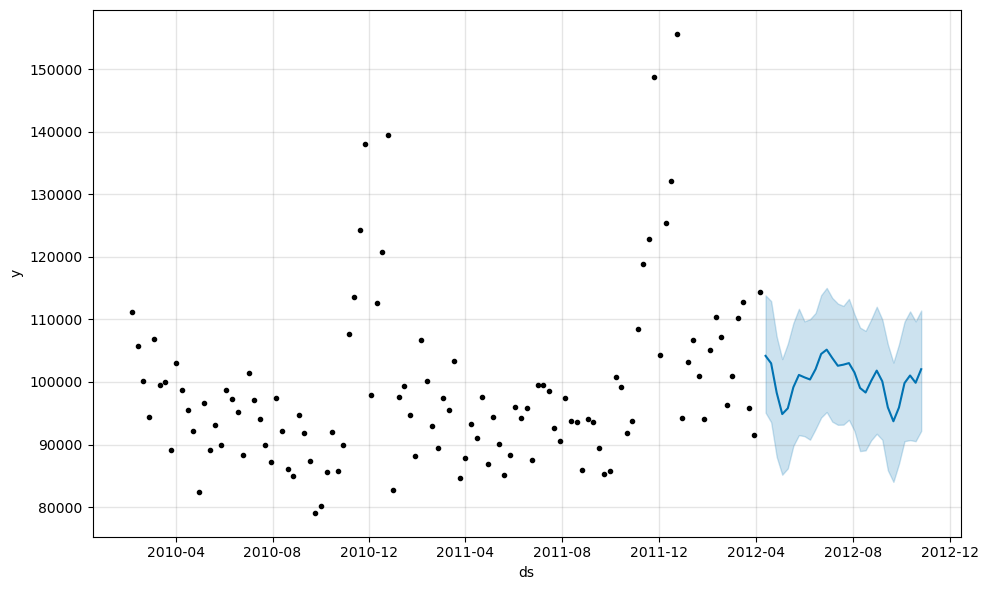

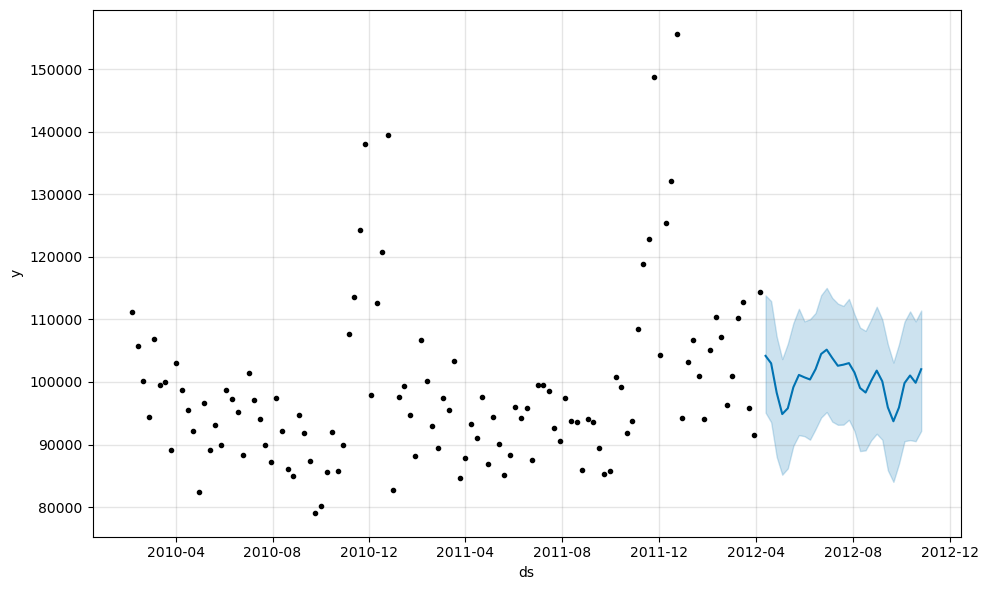

In [298]:
model_fit.plot(forecast)


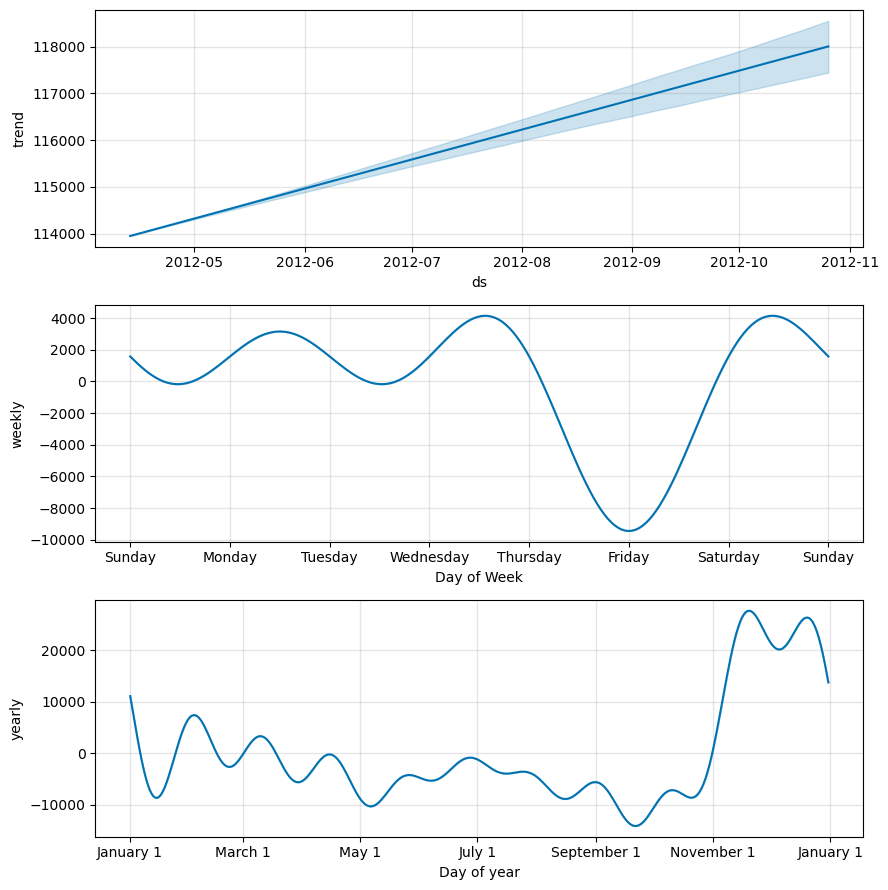

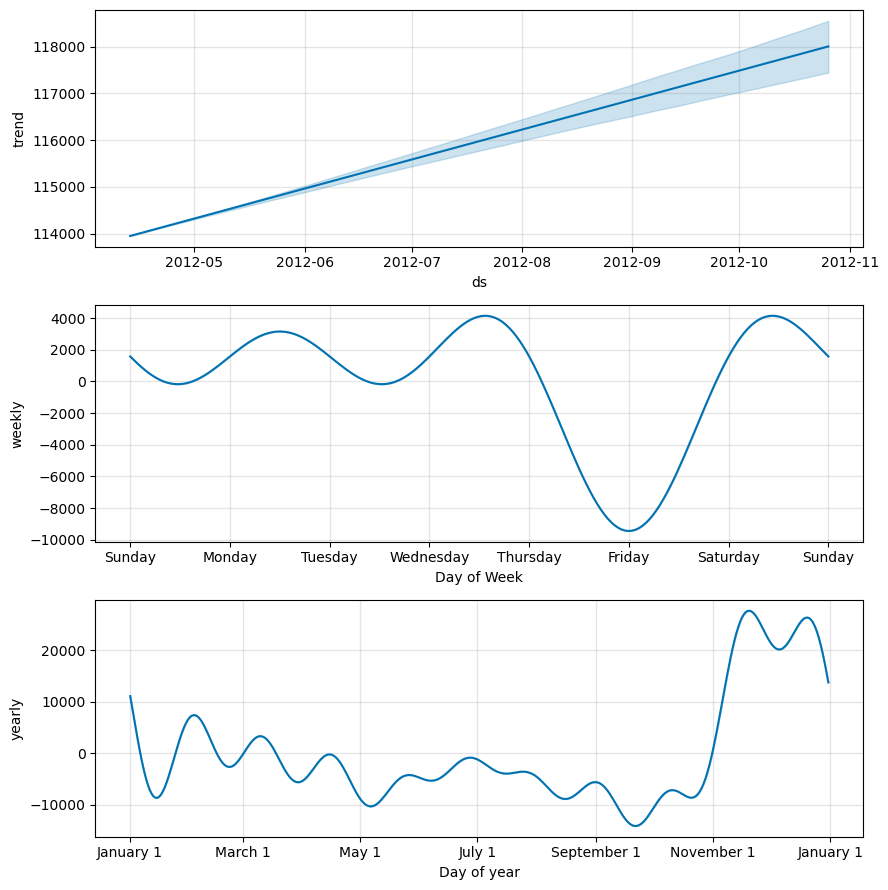

In [299]:
model_fit.plot_components(forecast)

In [300]:
def prophet_eval_metric(test, forecast):
    r2 = r2_score(test['y'], forecast['yhat'])
    mae = mean_absolute_error(test['y'], forecast['yhat']) 
    mape = mean_absolute_percentage_error(test['y'], forecast['yhat'])
    return r2,mae,mape


In [301]:
 r2,mae,mape=prophet_eval_metric(test, forecast)

In [302]:
print(f'R2 of test: {r2}\n' 
      f'mae of test: {mae}\n' 
      f'mape of test: {mape}')

R2 of test: 0.15777629822941586
mae of test: 4311.305419088052
mape of test: 0.04317995510935477


In [303]:
def origin_predition_comparison_prophet(test,forecast,model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(test['ds'], test['y'], label='Original Value', color='blue', linewidth=2)
    plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Value', color='red', linestyle='--', linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Weekly_Sales')
    plt.title(f'Original vs. Predicted Values-{model_name}')
    plt.legend()
    plt.show()

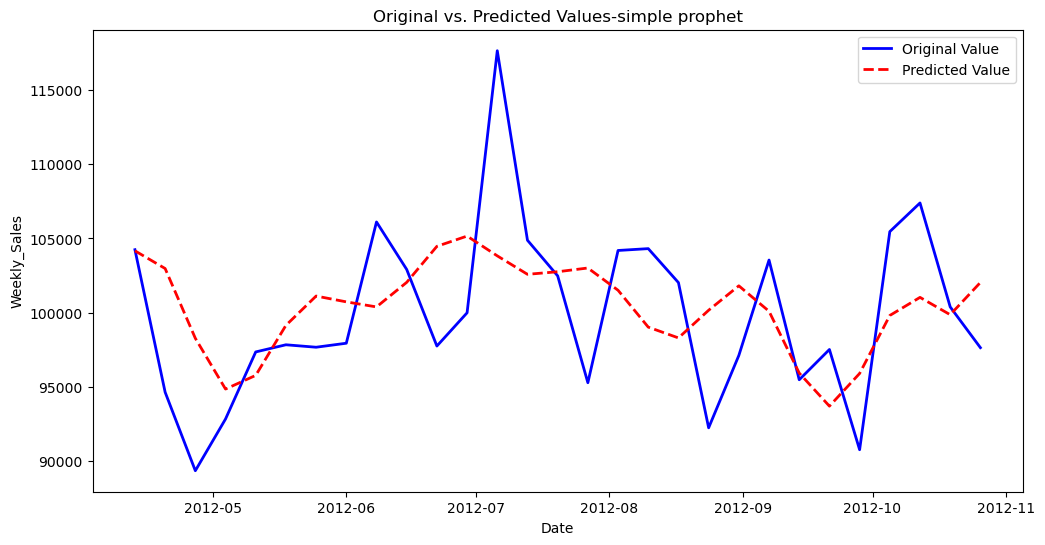

In [304]:
origin_predition_comparison_prophet(test,forecast,'simple prophet')

In [305]:
def pred_vs_orig_prophet(test,forecast,model_name):
    plt.scatter(test['y'],forecast['yhat'])
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes,color='r',linestyle='--')
    plt.title(f'Original vs. predicted values for test dataset-{model_name}')


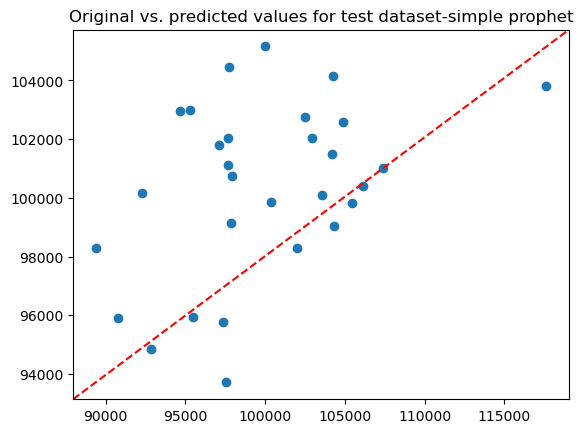

In [306]:
pred_vs_orig_prophet(test,forecast,'simple prophet')

In [307]:
residuals = test['y'].values-forecast['yhat'].values

In [308]:
residuals

array([   75.15523585, -8323.02277249, -8913.40970749, -2015.73729483,
        1577.75257973, -1308.02241768, -3444.37663047, -2783.38596867,
        5718.01385297,   868.3352661 , -6710.24534125, -5162.05750461,
       13805.50028354,  2292.69845172,  -276.92638731, -7720.71550665,
        2678.39368295,  5282.80458392,  3721.83961111, -7911.80446807,
       -4685.27725598,  3447.00686906,  -449.83282757,  3812.10649389,
       -5132.63858129,  5643.18194145,  6354.06570018,   525.30563016,
       -4388.24430657])

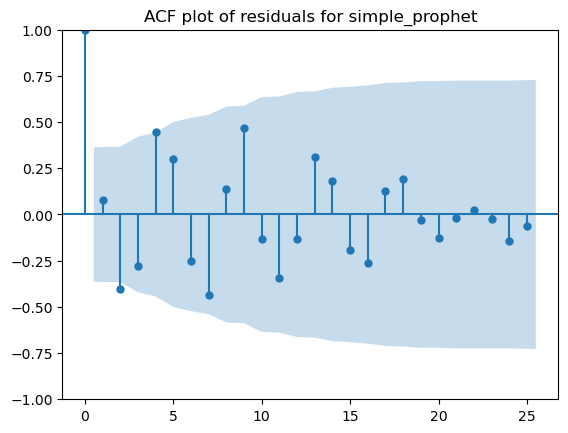

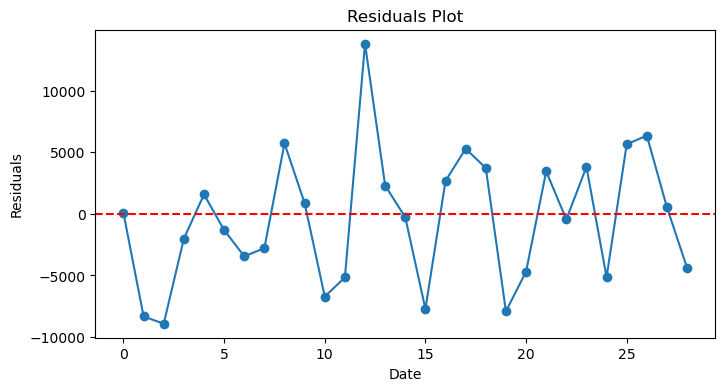

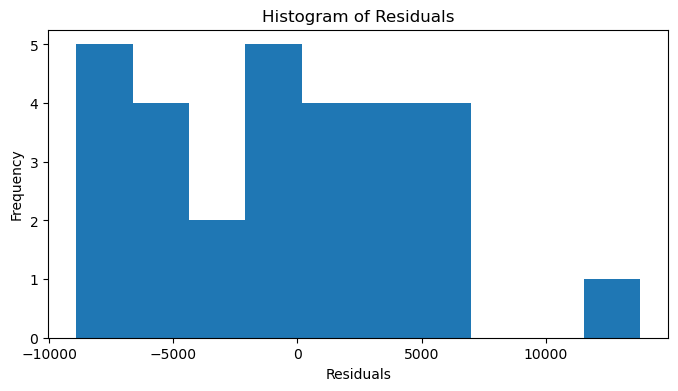

<Figure size 800x400 with 0 Axes>

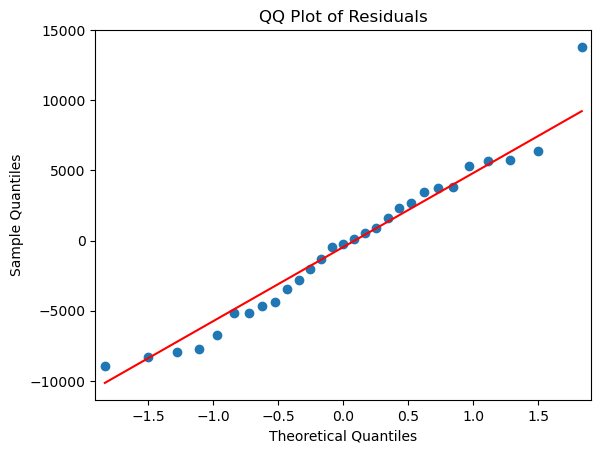

In [309]:
residual_plot(residuals, 'simple_prophet')

In [310]:
skewness, kurtosis,J_B,JB_p_value=stat_residual(residuals)

print(f'skewness of residuals: {skewness}\n'
      f'kurtosis of residuals: {kurtosis}\n'
      f'J_B of residuals: {J_B}\n'
      f'JB_p_value: {JB_p_value}')

skewness of residuals: 0.38292759370474155
kurtosis of residuals: -0.05410231672596977
J_B of residuals: 0.7122656514148672
JB_p_value: 0.7003795856427614


### 4.7.2 Adding Holidays <a id='4.7.2_Adding_Holidays'></a> 

In [311]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]


In [312]:
df_model_select=df_model['Weekly_Sales']

df_model_select=df_model_select.reset_index()

df_model_select.rename(columns={'Date':'ds','Weekly_Sales':'y'},inplace=True)

In [313]:
#creating black friday and X-mas eve as special holidays
black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.to_datetime(['2011-11-26', '2020-11-25']),
  'lower_window': -10,
  'upper_window': 1,
})
xmas_eve = pd.DataFrame({
  'holiday': 'xmas_eve',
  'ds': pd.to_datetime(['2010-12-24', '2011-12-24']),
  'lower_window': -5,
  'upper_window': 1,
})
holidays = pd.concat((black_friday, xmas_eve))

In [314]:
#define prophet model with holidays
prophet_holiday_model=Prophet(weekly_seasonality=True,daily_seasonality=False,holidays=holidays)
prophet_holiday_model.add_country_holidays(country_name='US') #adding US holidays

In [315]:
train,test, model_fit=simple_prophet_model_fit(df_model_select,0.8,prophet_holiday_model)

In [316]:
forecast=prophet_test_pred(test,model_fit)

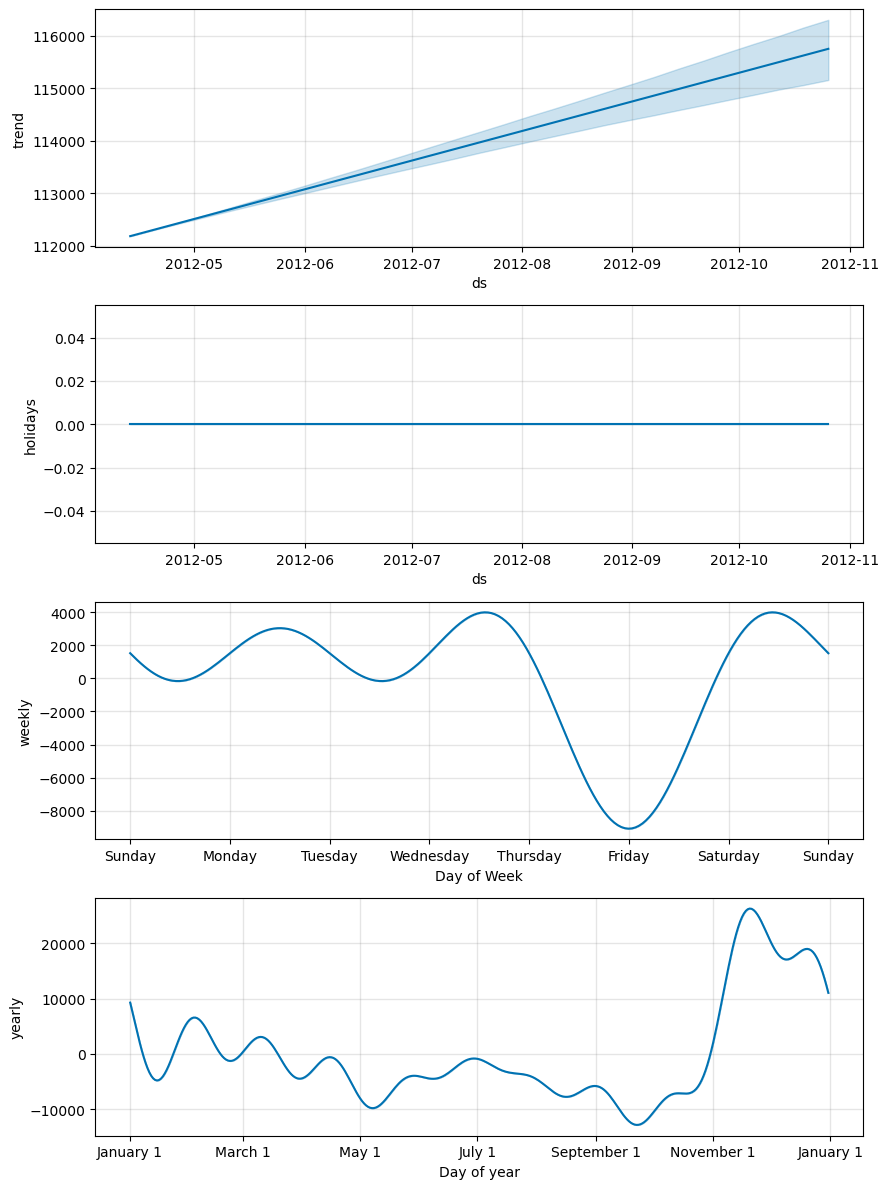

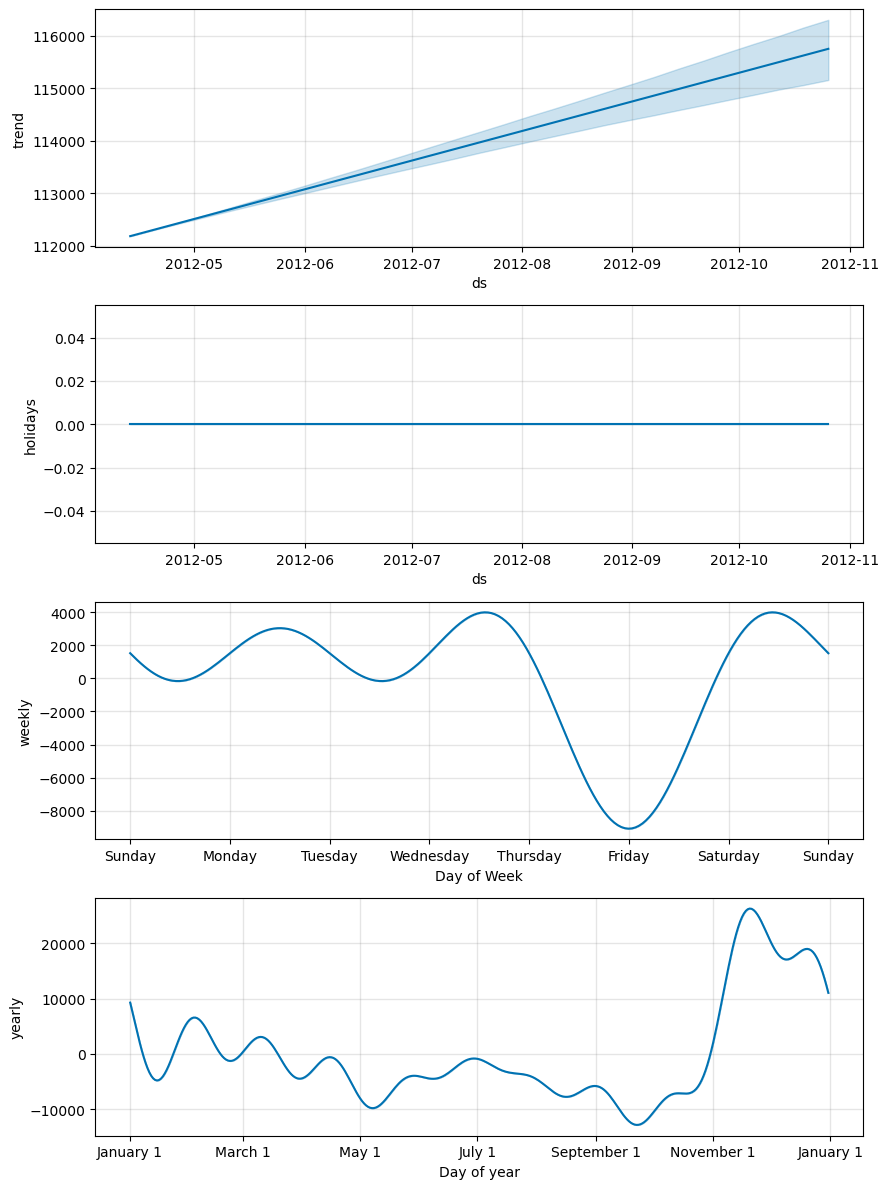

In [317]:
model_fit.plot_components(forecast)

In [318]:
 r2,mae,mape=prophet_eval_metric(test, forecast)

In [319]:
print(f'R2 of test: {r2}\n' 
      f'mae of test: {mae}\n' 
      f'mape of test: {mape}')

R2 of test: 0.16728840387244615
mae of test: 4340.97151365699
mape of test: 0.04299226130075354


### 4.7.3 Grid_Search <a id='4.7.3_Grid_Search'></a> 

In [320]:
# Create the grid
#the flexibility of the trend, and in particular how much the trend changes at the trend changepoints
changepoint_prior_scale = [0.01, 0.03, 0.05, 0.07] # default 0.05
#controls the flexibility of the seasonality
seasonality_prior_scale = [1, 5, 10, 15] # default 10
#controls flexibility to fit holiday effects
holidays_prior_scale = [1, 5, 10, 15] # default 10

seasonality_mode = ['additive', 'multiplicative']
# the proportion of the history in which the trend is allowed to change
changepoint_range = [0.6, 0.7, 0.8, 0.9] # default 0.8

# Compute the total number of iterations
total_iter = len(changepoint_prior_scale)*len(seasonality_prior_scale)*len(holidays_prior_scale)*len(seasonality_mode)*len(changepoint_range)
print(f'Number of iterations : {total_iter}')

# Loop over the parameters, build and assess the models
grid_search_results = []
iteration = 1
for cps in changepoint_prior_scale:
    for sps in seasonality_prior_scale:
        for hps in holidays_prior_scale:
            for sm in seasonality_mode:
                for cr in changepoint_range:
                    m = Prophet(holidays=holidays, 
                                 changepoint_prior_scale = cps, 
                                 seasonality_prior_scale = sps, 
                                 holidays_prior_scale = hps, 
                                 seasonality_mode = sm, 
                                 changepoint_range = cr)
                    m.add_country_holidays(country_name='US')
                    model = m.fit(train)
                    future = model.make_future_dataframe(periods=len(test), freq='W-FRI',include_history=False)
                    forecast = model.predict(future) 

                    #r2_score = metrics.r2_score(list(test['y']), list(forecast.loc[1400:,'yhat']))
                    r2,mae,mape=prophet_eval_metric(test, forecast)
                    
                    #print(f'iteration : {iteration} / {total_iter} ')
                    #print(f'r2_score : {r2_score}')
                    #print(f'mae : {mae}')
                    #print(f'mape : {mape}')
                    
                    grid_search_results.append([iteration, cps, sps, hps, sm, cr, r2, mae,mape])
                    iteration += 1

# Store the results in a dataframe
grid_search_df = pd.DataFrame(grid_search_results, columns = ['iteration', 'cps', 'sps', 'hps', 'sm', 'cr', 'r2_score', 'mae', 'mape'])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Number of iterations : 512


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

In [321]:
grid_search_df

iteration   cps  sps  hps              sm   cr  r2_score          mae  \
0            1  0.01    1    1        additive  0.6 -0.471426  5551.021152   
1            2  0.01    1    1        additive  0.7 -0.750196  6141.210308   
2            3  0.01    1    1        additive  0.8 -0.220831  4976.401573   
3            4  0.01    1    1        additive  0.9 -0.513488  5641.788458   
4            5  0.01    1    1  multiplicative  0.6 -0.475869  5571.026174   
..         ...   ...  ...  ...             ...  ...       ...          ...   
507        508  0.07   15   15        additive  0.9  0.188247  4260.098043   
508        509  0.07   15   15  multiplicative  0.6  0.144617  4423.830751   
509        510  0.07   15   15  multiplicative  0.7  0.150428  4410.759249   
510        511  0.07   15   15  multiplicative  0.8  0.158425  4385.642602   
511        512  0.07   15   15  multiplicative  0.9  0.141354  4436.583281   

         mape  
0    0.053947  
1    0.059669  
2    0.048435  
3    0.054828  
4    0.054190  
..        ...  
507  0.042415  
508  0.043758  
509  0.043635  
510  0.043439  
511  0.043851  

[512 rows x 9 columns]

In [322]:
grid_search_df.sort_values('mape', ascending = True).head()

iteration   cps  sps  hps        sm   cr  r2_score          mae      mape
450        451  0.07   10    1  additive  0.8  0.191366  4245.746067  0.042313
482        483  0.07   15    1  additive  0.8  0.191825  4243.286961  0.042317
385        386  0.07    1    1  additive  0.7  0.190975  4244.179935  0.042317
481        482  0.07   15    1  additive  0.7  0.190632  4246.292977  0.042328
393        394  0.07    1    5  additive  0.7  0.190414  4247.723477  0.042334

With Grid-search, R2 improved from 0.167 to 0.19, and MAPE does not change much

### 4.7.4 Prophet Model with Exgeneous Features <a id='4.7.4_Prophet_Model_with_Exgeneous_Features'></a> 

In [323]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [324]:
feature_list=['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment']

In [325]:
df_model.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly_Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'Holiday_name', 'MarkDown_Tot'],
      dtype='object')

In [326]:

df_model=df_model.reset_index()

df_model.rename(columns={'Date':'ds','Weekly_Sales':'y'},inplace=True)

In [327]:
#define prophet model with holidays and exgeneous features
prophet_exg_model=Prophet(weekly_seasonality=True,daily_seasonality=False,holidays=holidays)
prophet_exg_model.add_country_holidays(country_name='US') #adding US holidays
prophet_exg_model.add_regressor('Temperature')
prophet_exg_model.add_regressor('Fuel_Price')
prophet_exg_model.add_regressor('MarkDown1')
prophet_exg_model.add_regressor('MarkDown2')
prophet_exg_model.add_regressor('MarkDown3')
prophet_exg_model.add_regressor('MarkDown4')
prophet_exg_model.add_regressor('MarkDown5')
prophet_exg_model.add_regressor('CPI')
prophet_exg_model.add_regressor('Unemployment')

In [328]:
train,test, model_fit=simple_prophet_model_fit(df_model,0.8,prophet_exg_model)

In [329]:
test

ds  Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
114 2012-04-13      6        71.29       3.891    4634.18    6968.14   
115 2012-04-20      6        68.64       3.877    2326.27    2591.86   
116 2012-04-27      6        71.50       3.814    2564.41       1.49   
117 2012-05-04      6        77.66       3.749   13643.53     266.00   
118 2012-05-11      6        72.66       3.688   10658.74       0.00   
119 2012-05-18      6        70.50       3.630    6414.56       0.00   
120 2012-05-25      6        78.47       3.561    7694.17       0.00   
121 2012-06-01      6        80.39       3.501    8267.68      16.00   
122 2012-06-08      6        80.50       3.452   11150.20     188.60   
123 2012-06-15      6        82.10       3.393    7041.68     276.35   
124 2012-06-22      6        81.20       3.346    7253.03     312.35   
125 2012-06-29      6        87.35       3.286    3997.40     231.90   
126 2012-07-06      6        82.95       3.227    6087.24     254.90   
127 2012-07-13      6        80.27       3.256    8413.69     113.45   
128 2012-07-20      6        81.57       3.311    3762.14     148.95   
129 2012-07-27      6        85.78       3.407    7017.60     203.26   
130 2012-08-03      6        87.55       3.417   31765.22     141.14   
131 2012-08-10      6        87.04       3.494    5750.20     187.04   
132 2012-08-17      6        87.53       3.571    5433.03     171.64   
133 2012-08-24      6        79.03       3.620    5492.77     103.36   
134 2012-08-31      6        83.58       3.638   21801.35     111.57   
135 2012-09-07      6        86.33       3.730   14105.12      47.96   
136 2012-09-14      6        76.41       3.717   11072.87      22.00   
137 2012-09-21      6        70.81       3.721    8735.97       3.82   
138 2012-09-28      6        77.82       3.666    4181.54       7.64   
139 2012-10-05      6        70.84       3.617    9663.09       0.00   
140 2012-10-12      6        65.43       3.601    1905.34       0.00   
141 2012-10-19      6        69.68       3.594    1476.45       0.00   
142 2012-10-26      6        72.34       3.506    6827.59      53.07   

     MarkDown3  MarkDown4  MarkDown5         CPI  ...          y Type    Size  \
114      18.04    1544.21    2875.46  223.116353  ...  104240.89    A  202505   
115      14.79      81.42    3663.48  223.170920  ...   94650.71    A  202505   
116      15.54       9.94    2556.36  223.225487  ...   89365.89    A  202505   
117     117.27    5455.98    2773.56  223.280054  ...   92846.82    A  202505   
118     133.22    3312.90    9700.64  223.334621  ...   97360.34    A  202505   
119      52.03     495.43    2991.72  223.351193  ...   97841.75    A  202505   
120     945.23    1331.90    4852.27  223.352566  ...   97676.93    A  202505   
121     441.83    1904.81    3517.55  223.353940  ...   97946.52    A  202505   
122      63.70     859.54    6294.81  223.355313  ...  106107.67    A  202505   
123     350.16    3373.11    5325.58  223.368093  ...  102911.54    A  202505   
124     160.51    3024.57    6806.11  223.409391  ...   97756.50    A  202505   
125       0.00     262.44    4182.90  223.450688  ...   99995.00    A  202505   
126     205.95    3655.34    5715.69  223.491985  ...  117631.29    A  202505   
127      39.42    5516.18    2724.98  223.533282  ...  104876.59    A  202505   
128      18.43    3197.56    7560.36  223.542450  ...  102480.16    A  202505   
129       8.11   17151.91    3340.02  223.551618  ...   95288.21    A  202505   
130      19.13   15925.51    6069.02  223.560786  ...  104187.97    A  202505   
131       5.21    3920.14    7505.63  223.569953  ...  104312.39    A  202505   
132       0.01    4968.35    4940.37  223.651022  ...  102025.59    A  202505   
133      50.00    5268.21    6277.08  223.786018  ...   92254.28    A  202505   
134      16.74   15675.98    4002.59  223.921012  ...   97124.59    A  202505   
135      24.60    3040.62    3558.18  224.056008  ...  103544.25    A

In [330]:
forecast=prophet_exg_model.predict(test)

In [331]:
r2,mae,mape=prophet_eval_metric(test, forecast)
print(f'R2 of test: {r2}\n' 
      f'mae of test: {mae}\n' 
      f'mape of test: {mape}')


R2 of test: -0.7337120598614395
mae of test: 6193.358053162182
mape of test: 0.06351884491893986


With introduction of exogeneous features, R2 gets significantly worse, MAPE increase from 0.042 to 0.063

### 4.7.5 Prophet Model with Lagged Value and Exgeneous Features <a id='4.7.5_Prophet_Model_with_Lagged_Value_and_Exgeneous_Features'></a> 

In [332]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]

In [333]:
features_to_lag=['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment','Weekly_Sales']

In [334]:
df_lagged=create_lagged_features(df_model,features_to_lag,5)

In [335]:
df_lagged.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly_Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'Holiday_name', 'MarkDown_Tot',
       'Temperature_lag_1', 'Temperature_lag_2', 'Temperature_lag_3',
       'Temperature_lag_4', 'Temperature_lag_5', 'Fuel_Price_lag_1',
       'Fuel_Price_lag_2', 'Fuel_Price_lag_3', 'Fuel_Price_lag_4',
       'Fuel_Price_lag_5', 'MarkDown1_lag_1', 'MarkDown1_lag_2',
       'MarkDown1_lag_3', 'MarkDown1_lag_4', 'MarkDown1_lag_5',
       'MarkDown2_lag_1', 'MarkDown2_lag_2', 'MarkDown2_lag_3',
       'MarkDown2_lag_4', 'MarkDown2_lag_5', 'MarkDown3_lag_1',
       'MarkDown3_lag_2', 'MarkDown3_lag_3', 'MarkDown3_lag_4',
       'MarkDown3_lag_5', 'MarkDown4_lag_1', 'MarkDown4_lag_2',
       'MarkDown4_lag_3', 'MarkDown4_lag_4', 'MarkDown4_lag_5',
       'MarkDown5_lag_1', 'MarkDown5_lag_2', 'MarkDown5_lag_3'

In [336]:
feature_list=[col for col in df_lagged.columns if 'lag' in col]

In [337]:
feature_list=features_to_lag+feature_list

In [338]:
feature_list.remove('Weekly_Sales')

In [339]:
df_lagged=df_lagged.reset_index()

df_lagged.rename(columns={'Date':'ds','Weekly_Sales':'y'},inplace=True)

In [340]:
best_mape = float('inf')
best_combination = None

# Set the range of sizes for feature combinations that you want to consider

max_size = 3
train_size=0.8
num_sample=100

split=int(len(df_lagged) * train_size) 
train,test= df_lagged[0:split], df_lagged[split:len(df_lagged)]

feature_comb=[]
# Generate all possible combinations of features within the specified range of sizes
for r in range(max_size, max_size + 1):
    feature_comb.extend(combinations(feature_list, r))
sampled_combinations = random.sample(feature_comb, min(num_sample, len(feature_comb)))


In [348]:
for combo in sampled_combinations:

    # Prepare training data for this combination of features
    selected_features = ['ds', 'y'] + list(combo)
    train_selected = train[selected_features]
    test_selected = test[selected_features]

    # Fit the Prophet model
    prophet_model=Prophet(weekly_seasonality=True,daily_seasonality=False,holidays=holidays)
    prophet_model.add_country_holidays(country_name='US') #adding US holidays
    for feature in combo:
        prophet_model.add_regressor(feature)

    prophet_model.fit(train_selected)

    # Make predictions on the validation set
    forecast = prophet_model.predict(test_selected)

    # Evaluate the model using RMSE (or any other metric of your choice)
    r2,mae,mape=prophet_eval_metric(test, forecast)
    print(mape)

    # Check if this combination gives a better RMSE than what we've seen so far
    if mape < best_mape:
        best_mape = mape
        best_combination = combo

# Print the best combination of features
print("Best combination of features:", best_combination)
print("Best MAPE:", best_mape)
print("R2:", r2)

0.05634243833432501
0.046194691134869216
0.04587157029663593
0.03870503636300513
0.04729524942249119
0.038243659008965085
0.04642688888494898
0.03792751004292901
0.048336805061264844
0.054375364617659086
0.04169736925464803
0.0561724080597708
0.03933908799776426
0.046088254519030855
0.039184144630224294
0.05030352685843652
0.04390685003095497
0.050941186295713
0.044819665037597003
0.03661034382512253
0.04542134959430769
0.04722196369746074
0.043918398511571644
0.04535809721796622
0.04805794631118599
0.049950609696402755
0.04222447156523691
0.05276062256025556
0.0512656018857918
0.040195698160354516
0.04532133670742262
0.05635111665501336
0.04597332302893198
0.06185140355053661
0.04966123134016142
0.04607391819625507
0.03855271661110737
0.047861368302654354
0.041634072907046224
0.04924444021621811
0.045475636583578054
0.05829008732377413
0.039341991925547444
0.045052253897149584
0.050366696491331304
0.044746427118287815
0.060966734509182434
0.04709951531110231
0.04674239470907425
0.0450

## 4.8 XG_Boost <a id='4.8_XG_Boost'></a> 

### 4.8.1 Simple XG_Boost <a id='4.8_Simple_XG_Boost'></a> 

In [349]:
added_features

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Weekly Sales']

In [350]:
exogenous_feature

['Temperature',
 'Fuel Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Holiday name Birthday of Martin Luther King  Jr ',
 'Holiday name Christmas Day',
 'Holiday name Columbus Day',
 'Holiday name Independence Day',
 'Holiday name Labor Day',
 'Holiday name Memorial Day',
 'Holiday name New Year s Day',
 'Holiday name Superbowl',
 'Holiday name Thanksgiving Day',
 'Holiday name Veterans Day',
 'Holiday name Washington s Birthday',
 'Holiday name non Holiday']

In [351]:
df_model=df_ts[(df_ts.Store==6)&(df_ts.Dept==92)]
ts_s6_d92_dummy=dummy_df(df_model)
ts_s6_d92_dummy.columns = ts_s6_d92_dummy.columns.str.replace(r'[^a-zA-Z0-9]', ' ')
df_transform=create_lagged_features(ts_s6_d92_dummy,added_features,5)

#find all the lagged features
lagged_features=[col for col in df_transform.columns if 'lag_' in col]
#combine lagged features with exgenour
feature_list=lagged_features+exogenous_feature

In [352]:
feature_list

['Temperature_lag_1',
 'Temperature_lag_2',
 'Temperature_lag_3',
 'Temperature_lag_4',
 'Temperature_lag_5',
 'Fuel Price_lag_1',
 'Fuel Price_lag_2',
 'Fuel Price_lag_3',
 'Fuel Price_lag_4',
 'Fuel Price_lag_5',
 'MarkDown1_lag_1',
 'MarkDown1_lag_2',
 'MarkDown1_lag_3',
 'MarkDown1_lag_4',
 'MarkDown1_lag_5',
 'MarkDown2_lag_1',
 'MarkDown2_lag_2',
 'MarkDown2_lag_3',
 'MarkDown2_lag_4',
 'MarkDown2_lag_5',
 'MarkDown3_lag_1',
 'MarkDown3_lag_2',
 'MarkDown3_lag_3',
 'MarkDown3_lag_4',
 'MarkDown3_lag_5',
 'MarkDown4_lag_1',
 'MarkDown4_lag_2',
 'MarkDown4_lag_3',
 'MarkDown4_lag_4',
 'MarkDown4_lag_5',
 'MarkDown5_lag_1',
 'MarkDown5_lag_2',
 'MarkDown5_lag_3',
 'MarkDown5_lag_4',
 'MarkDown5_lag_5',
 'CPI_lag_1',
 'CPI_lag_2',
 'CPI_lag_3',
 'CPI_lag_4',
 'CPI_lag_5',
 'Unemployment_lag_1',
 'Unemployment_lag_2',
 'Unemployment_lag_3',
 'Unemployment_lag_4',
 'Unemployment_lag_5',
 'Weekly Sales_lag_1',
 'Weekly Sales_lag_2',
 'Weekly Sales_lag_3',
 'Weekly Sales_lag_4',
 'Weekly

In [353]:
def XGBoost_regression(df,features,train_size,model):
    feature_list=features
    X=df[feature_list]       
    #train/test split
    split=int(len(df) * train_size) 
    X_train, X_test = X[0:split], X[split:len(df)]

    y_train, y_test=df['Weekly Sales'][0:split],df['Weekly Sales'][split:len(df)]
    
    # fit the model 
    model_fit= model.fit(X_train,y_train)
    return X_train,y_train,X_test, y_test, model_fit

In [354]:
XG_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)

In [355]:
X_train,y_train,X_test, y_test, model_fit=XGBoost_regression(df_transform,feature_list,0.8,XG_model)

In [356]:
r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)
print("R² list: ",[f"{i:.4f}" for i in r2_list])
print("MAE list: ",[f"{i:.4f}" for i in MAE_list])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE_list])

R² list:  ['1.0000', '-0.2907']
MAE list:  ['0.1231', '4997.0929']
MAPE list:  ['0.0000', '0.0491']


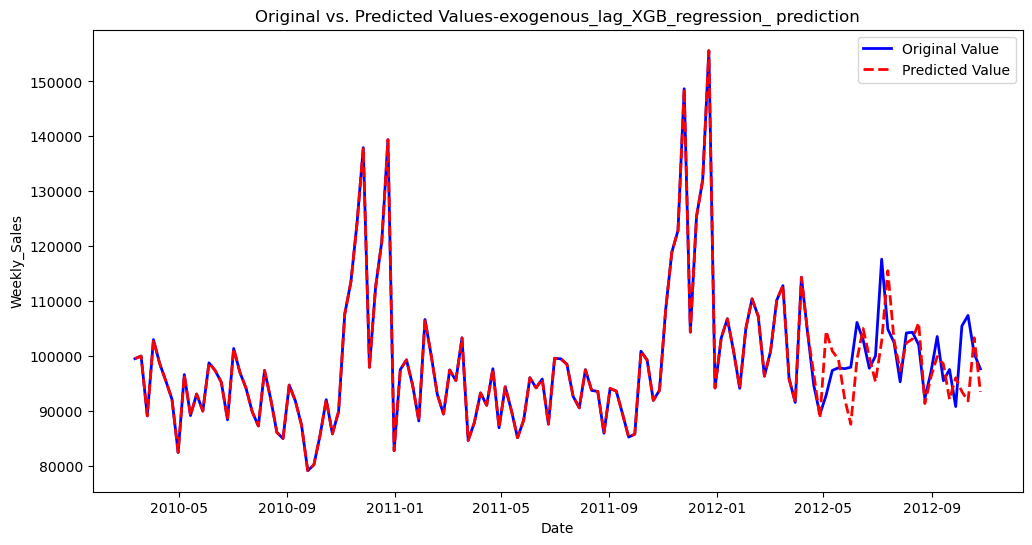

In [357]:
origin_predition_comparison(results,'exogenous_lag_XGB_regression_ prediction')

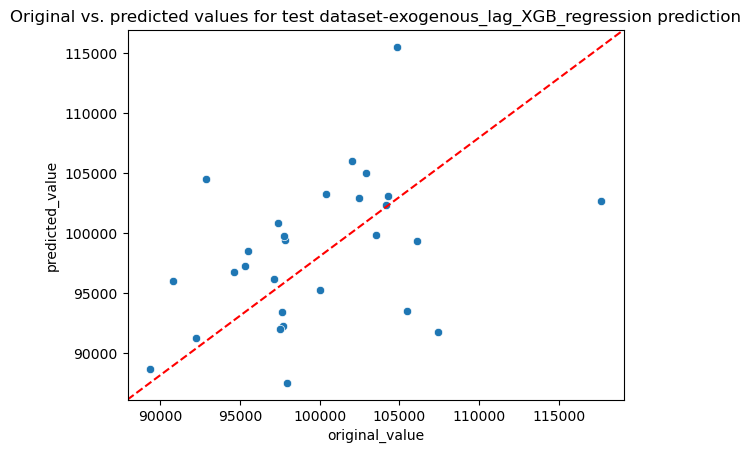

In [358]:
pred_vs_orig(test_results,'exogenous_lag_XGB_regression prediction')

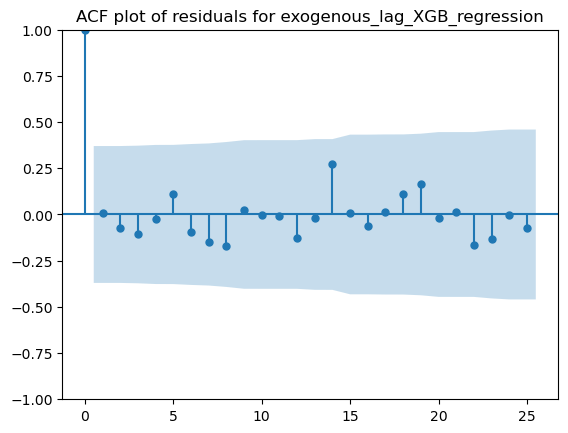

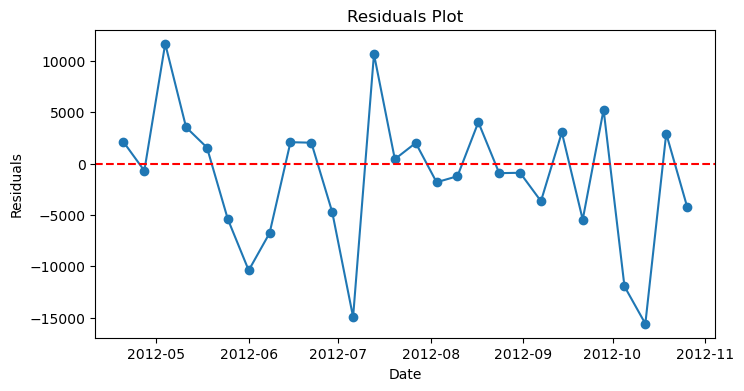

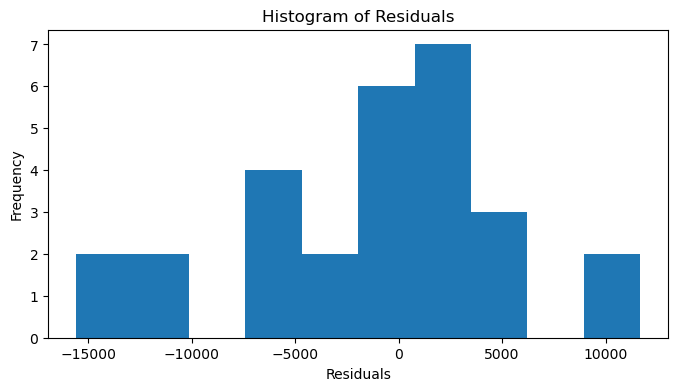

<Figure size 800x400 with 0 Axes>

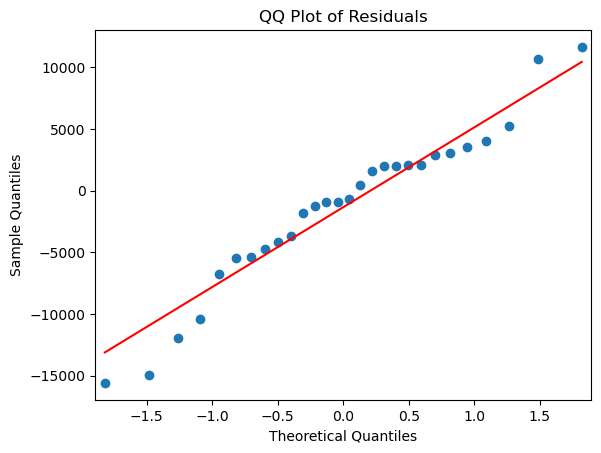

In [359]:
residuals = test_results['predicted_value']-test_results['original_value']
residual_plot(residuals, 'exogenous_lag_XGB_regression')

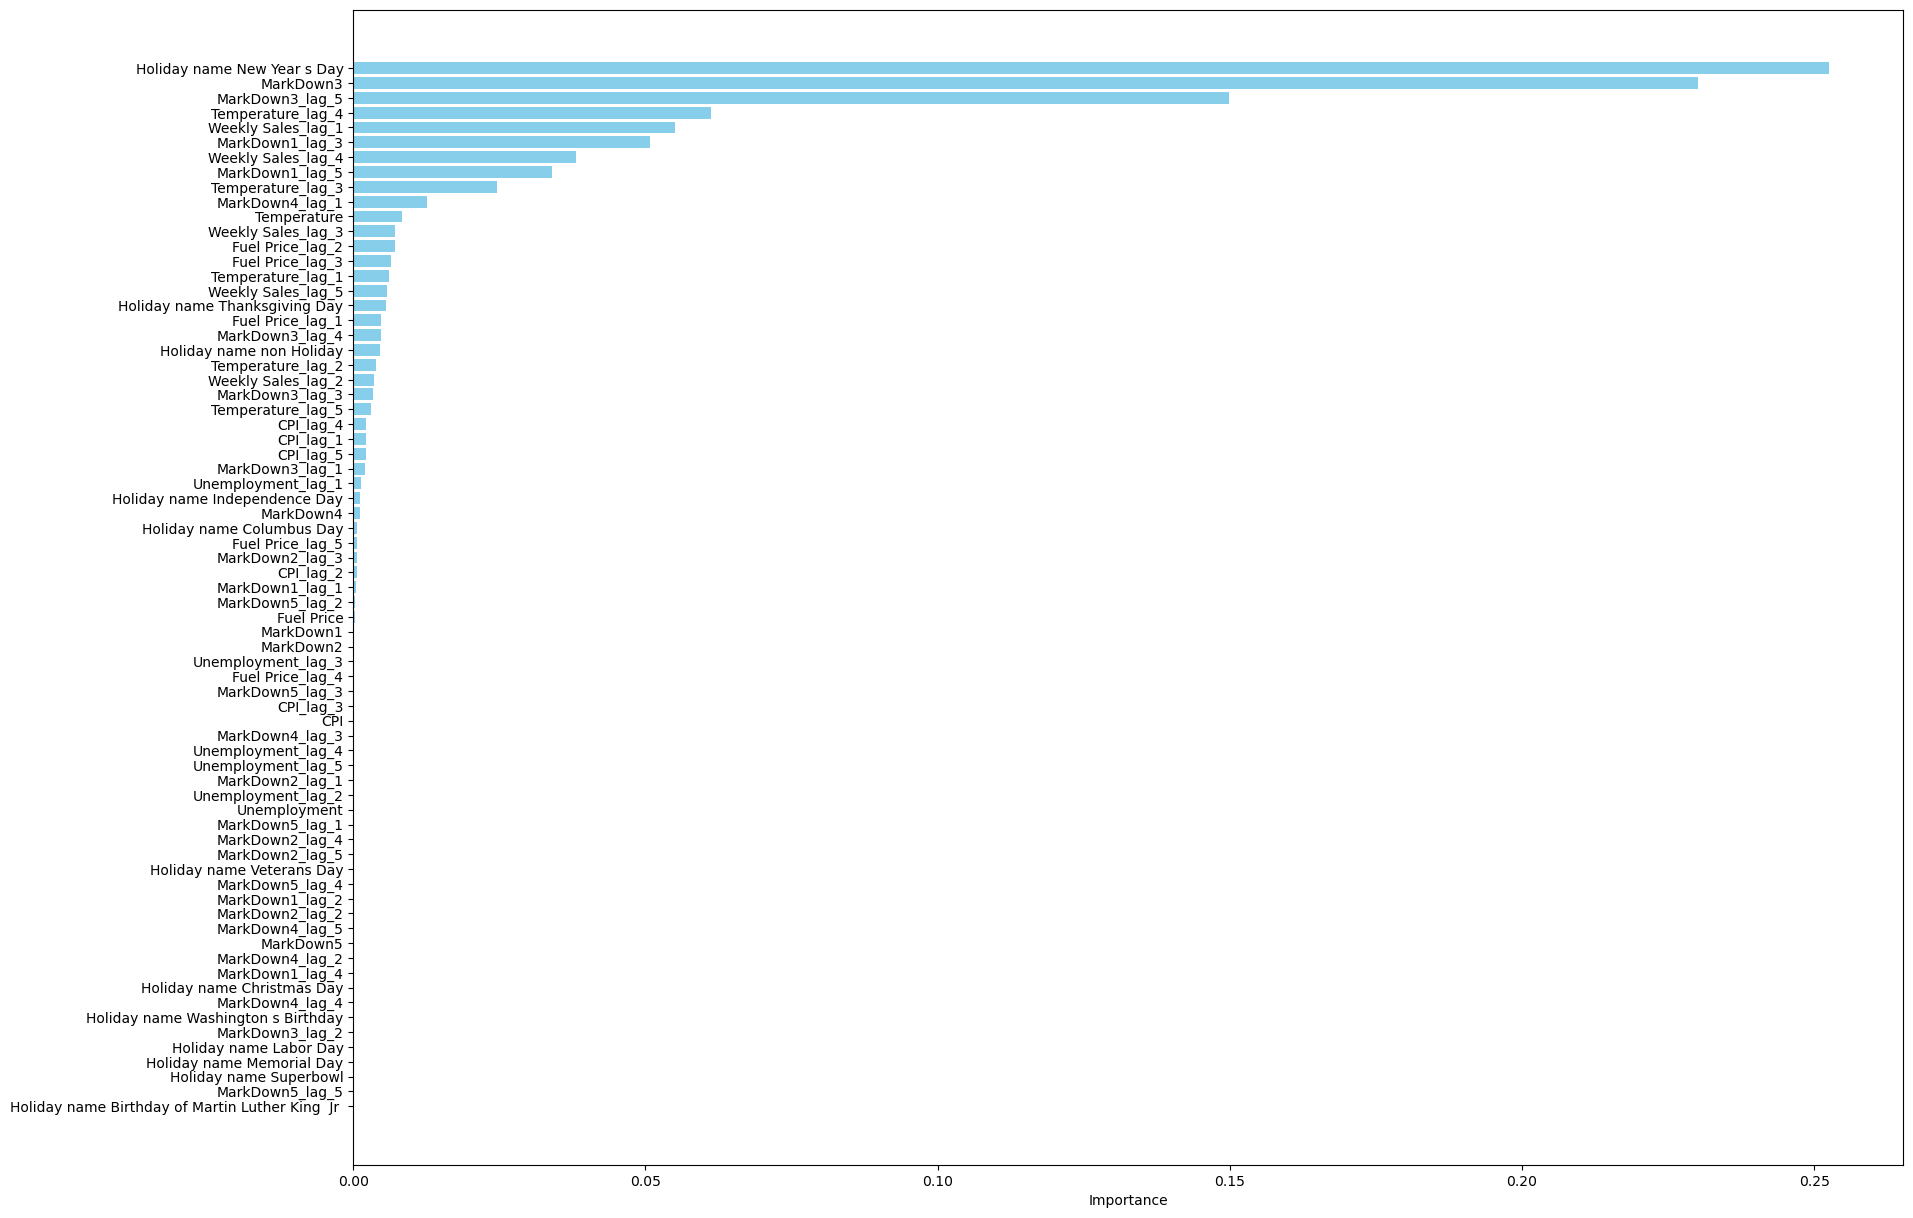

In [360]:
feature_importances=model_fit.feature_importances_
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
sorted_features = feature_importances.sort_values(by='Importance', ascending=True)
# plot feature rank
plt.figure(figsize=(20, 15))

plt.barh(sorted_features['Feature'], sorted_features['Importance'], color='skyblue')
plt.xlabel('Importance')

plt.show()

### 4.8.2 XG_Boost Grid Search <a id='4.8.2_XG_Boost_Grid_Search'></a> 

In [361]:
tscv = TimeSeriesSplit(n_splits=5)
param_grid = {
    'n_estimators': [20, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [1,2,3],
    'colsample_bytree': [0.7, 0.9],
    'subsample': [0.7, 0.9],
    'reg_alpha': [0.1, 1, 10],
    
    
}

model = xgb.XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(model, param_grid, cv=tscv, verbose=1, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Lowest MAPE found: ", (-grid_search.best_score_))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 10, 'subsample': 0.7}
Lowest MAPE found:  0.09417580518859583


### 4.8.3 XG_Boost with Selected Features <a id='4.8.3_XG_Boost_with_Selected_Features'></a> 

In [362]:
feature_selected=['Holiday name New Year s Day','MarkDown3','MarkDown3_lag_5','Temperature_lag_4','Weekly Sales_lag_1']

In [363]:
X_train,y_train,X_test, y_test, model_fit=XGBoost_regression(df_transform,feature_selected,0.8,XG_model)

In [364]:
r2_list,MAE_list,MAPE_list,test_results,results=regression_eval(X_train,y_train, X_test,y_test,model_fit)
print("R² list: ",[f"{i:.4f}" for i in r2_list])
print("MAE list: ",[f"{i:.4f}" for i in MAE_list])
print("MAPE list: ",[f"{i:.4f}" for i in MAPE_list])

R² list:  ['1.0000', '-1.1855']
MAE list:  ['22.6649', '7049.1070']
MAPE list:  ['0.0002', '0.0697']


Based on simple XG Boost, the top 4 features are 'New Year s Day','MarkDown3','MarkDown3_lag_5','Temperature_lag_4','Weekly Sales_lag_1'. For all the XG_boost models, they all show perfect fitting with training dataset, but not for testing dataset. With Grid search, I was not able to find better performed model than basic XG-boost model may due to the fact that the parameters in grid search is limited.